# Exploration Project 04
### My stock went up yesterday, what about tomorrow?

### 4-1. ∼ 4-3. 이론 핵심 요약

### ▶ 시계열 : 시간 순서대로 발생한 데이터의 수열

 - 미래 예측은 불가능함에도 불구하고 미래의 데이터를 예측하려 든다면？<br>
   적어도 다음 두 가지의 전제가 필요

   + 과거의 데이터에 일정한 패턴이 발견된다.

   + 과거의 패턴은 미래에도 동일하게 반복될 것이다.

    > &nbsp;<bR>
    >  &nbsp; 안정적(Stationary) 데이터에 대해서만 미래 예측이 가능하다.
    > &nbsp;<br>
    &nbsp;<br>

### ▶ 안정적(Stationary)이다
 
 &nbsp;&nbsp;&nbsp;&nbsp; → 시계열 데이터의 통계적 특성이 변하지 않는다
  
   > &nbsp;<bR>
   > &nbsp; 시계열 데이터를 만들어내는 시간의 변화에 무관하게 일정한 프로세스가 존재한다
   > &nbsp;<br>
   &nbsp;<br>

이론에 관련하여 핵심적이고 중요한 개념을 요약해놓았지만,

이해하는데 도움이 되는 아래의LMS 내의 링크

- (Stationary) Website：[[시계열(Time-Series) 데이터] 정상성/이동평균/이동표준편차/자기공분산/자기상관계수](https://velog.io/@pkb0126/%EC%8B%9C%EA%B3%84%EC%97%B4Time-Series%EC%A0%95%EC%83%81%EC%84%B1)

,와 함께 상당히 여러 곳에서 인용되고 있는 책의 본문을 웹에서 확인이 가능하다.

파이썬으로 작성된 예제가 아니라, R 언어를 활용해서 작성된 코드 샘플과 함께 설명이 되어있는

Forecasting: Principles and Practice (2nd ed) 도서의 내용에서 찾아 볼 수 있다.

상당히 깔끔한 번역과 시각화를 보여주고 있고 설명이 길다, 길지만 명확하다.

Reference는 아래에 표기했다.

- [8 ARIMA models - 8.1 Stationarity and differencing](https://otexts.com/fpp2/stationarity.html)

도서의 번역본을 링크에 넣으려고 했으나,

레퍼런스의 표기에 대한 규정을 컨텐츠의 시작부분에서 나열하고 있다.

따라서 해당 레퍼런스 표기를 따르도록 하였다.

위의 내용도 좋지만, 대부분은 아래의 내용들을 실습해 보면서 학습해 보는 것이 이해가 빠르다.

### ▶ ARIMA (Auto-regressive Integrated Moving Average)

 - 시계열 예측(Time-Series Prediction)을 다루는 여러 가지 통계적 기법 중에 가장 널리 알려짐

 - 시계열 데이터의 특성과 안정적(Stationary) 시계열의 개념
 
 - AR(Autoregressive) + I(Integrated) + MA(Moving Average) 

 - 시계열 데이터 예측 모델을 자동으로 만들 수 있다

 - ARIMA 모델을 구성하는 AR, MA, Diffencing의 개념

### 4-4. 시계열 예측이란 - 시계열 데이터 사례분석

시계열(Time Series) 생성

<hr>

 ● Daily Minimum Temperatures in Melbourne : 온도변화를 다루는 시계열

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

dataset_filepath = "stock_prediction\\Data\\daily-min-temperatures.csv"
df = pd.read_csv(dataset_filepath) 
print()
print(type(df), " ◀ Pandas를 통해 2개의 컬럼을 가진 DataFrame으로 변환되었으나, 아직 시계열의 데이터 구조는 아님")
print()
df.head()


<class 'pandas.core.frame.DataFrame'>  ◀ Pandas를 통해 2개의 컬럼을 가진 DataFrame으로 변환되었으나, 아직 시계열의 데이터 구조는 아님



Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8

위의 DataFrame에서 Date 컬럼을 index로 삼아 시계열을 생성

In [382]:
# 이번에는 Date를 index_col로 지정
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print()
print(type(df), " ◀ 시간 컬럼이 index가 되었지만 아직도 type은 DataFrame")
print()
df.head()


<class 'pandas.core.frame.DataFrame'>  ◀ 시간 컬럼이 index가 되었지만 아직도 type은 DataFrame



Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8

In [383]:
# 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고
ts1 = df['Temp']
print()
print(type(ts1))
print()
ts1.head()


<class 'pandas.core.series.Series'>



Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

시계열 안정성의 정성적 분석

<hr>

이제 시계열이 준비되었으므로 시각화를 통해 안정성(Stationarity) 여부를 확인해 보자

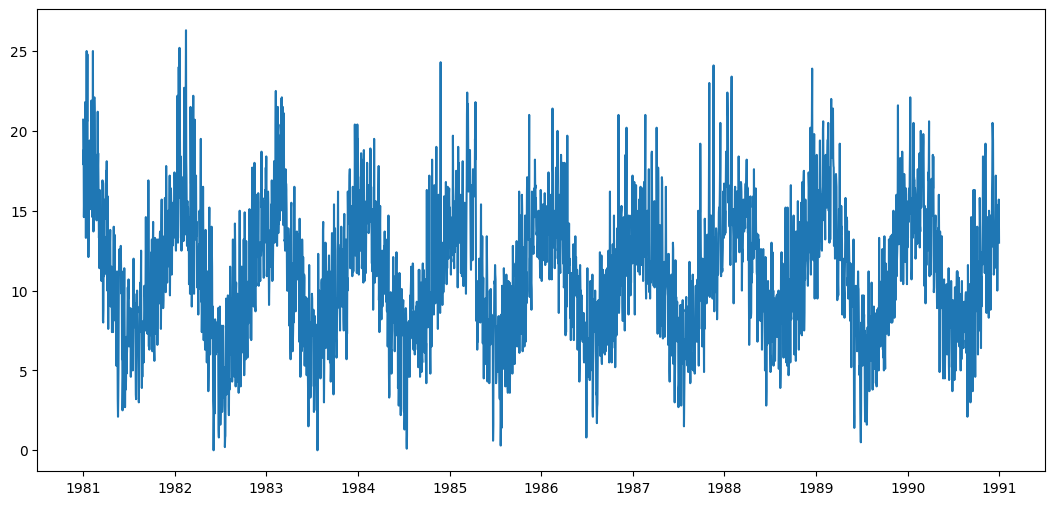

In [384]:
from matplotlib.pylab import rcParams

# matlab 차트의 기본 크기를 13, 6으로 지정
rcParams['figure.figsize'] = 13, 6

# 시계열 데이터 차트
plt.plot(ts1)

In [385]:
## 결측치 확인
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력

Series([], Name: Temp, dtype: float64)

결측치 출력 없음.

만약 결측치가 있다면, 두 가지 방법으로 결측치를 처리해 줄 수 있다.

1. 결측치가 있는 데이터를 모두 삭제(drop).

2. 결측치 양옆의 값들을 이용해서 적절히 보간(interpolate)하여 대입.
ex) 2와 4 사이 데이터가 NaN이라면 이 값을 3으로 채우는 방식.

이번의 경우, 시간을 index로 가지는 시계열 데이터이므로, 삭제하는 것보다는 보간 방법 선택.


~~~
■ 여기서 잠깐 interpolate 에 대해서 알아보자
~~~

- EDA(Exploratory Data Analysis)를 진행하다보면,<br>매우 흔한 확률로 결측치가 존재하는 것을 볼 수 있다.

- 이런 경우에는, 결측치를 버릴건지(drop),<br>혹은 채워주어야 할지 결정을 해야 한다.

- 그러나, 데이터를 함부로 drop하여 머신러닝 예측을 진행한다는 것은 위험부담을 동반한다.<br>물론 결측치가 매우 적은 경우엔 그냥 drop하는 것이 맞을 수 있다.

- 하지만, 결측치가 꽤 많이 존재하는 경우, 혹은<br>
예측해야할 테스트 셋의 feature 데이터에 존재하는 경우에는<br>
결측치를 채워줄 수 밖에 없다.

- 결측치를 채워 줄 때 흔히 사용되는 방법은 0 이나 -1로 단순하게 채워주거나,<br>
조금 더 발전된 방법은 mean이나 median으로 채워주는 방법이다.<br>
조금 더 나아간다면, 분류형 컬럼을 기준으로<br>
groupby하여 mean이나 median으로 채워줄 수 있을 것이다.

하지만, 시계열(Time Series) 데이터나 연속된 수치를 가지는 데이터의 경우에는<br>
일종의 연속성있는 패턴을 발견할 수 있는데, 이런 경우 보간(Interpolation)을 통해<br>
앞,뒤 값을 통하여 유추하여 좀 더 스마트하게 결측치(NaN)를 채워줄 수 있다.

~~~
마침, Pandas에 이런 유용한 기능이 내장되어 있다.

~~~

~~~
interpolate 함수에 대한 자세한 정보는 당연하게도, 

pandas 공식 문서에서도 역시 찾아볼 수 있다
~~~

+ [ __pandas.Series.interpolate__ ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html)<br>

    * (기본값) 'linear'：인덱스를 무시하고 값을 동일하게 간격으로 처리.<br>
MultiIndexes에서 지원되는 유일한 방법.<br>

    + __'time'__： 지정된 간격 길이를 보간하기 위해 일간 및 고해상도 데이터에 대해 작업

    + index, values：인덱스의 실제 숫자 값을 사용

    + pad：기존 값을 사용하여 NaN 채우기

interpolate(method="<메소드지정>") 으로 사용할 수 있다.

여기에서 중요하다고 생각되는 인터폴레이트 방식은 time 이다.

다음 블럭을 보자

In [386]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

interpolate 의 기능을 확인하기 위해, 

정규분포 따르는 샘플을 참고자료로 사용하겠다.

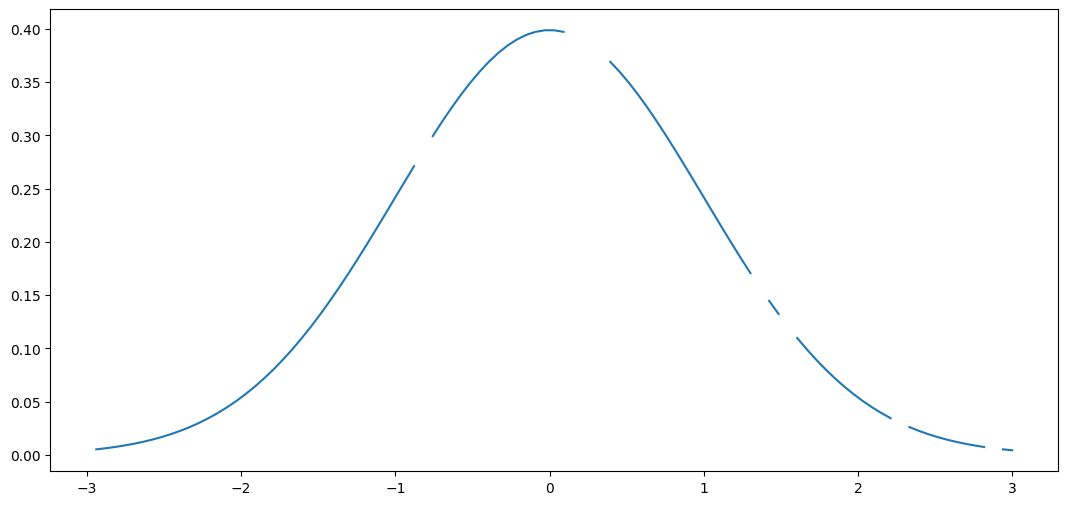

In [387]:
# 평균
mu = 0
# 분산
variance = 1
# sigma (Standard Deviation 계산)
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# 랜덤한 10개의 데이터를 삭제.
idx = np.random.choice(len(x), size=10)
x[idx] = np.nan

# 시각화
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [388]:
pd.Series(x).isnull().sum()

9

In [389]:
pd.Series(x).head(20)

0          NaN
1    -2.939394
2    -2.878788
3    -2.818182
4    -2.757576
5    -2.696970
6    -2.636364
7    -2.575758
8    -2.515152
9    -2.454545
10   -2.393939
11   -2.333333
12   -2.272727
13   -2.212121
14   -2.151515
15   -2.090909
16   -2.030303
17   -1.969697
18   -1.909091
19   -1.848485
dtype: float64

총 10개의 NaN 값을 만들고, NaN값의 분포를 확인할 수 있다.

기본값인 linear 방법을 사용하면

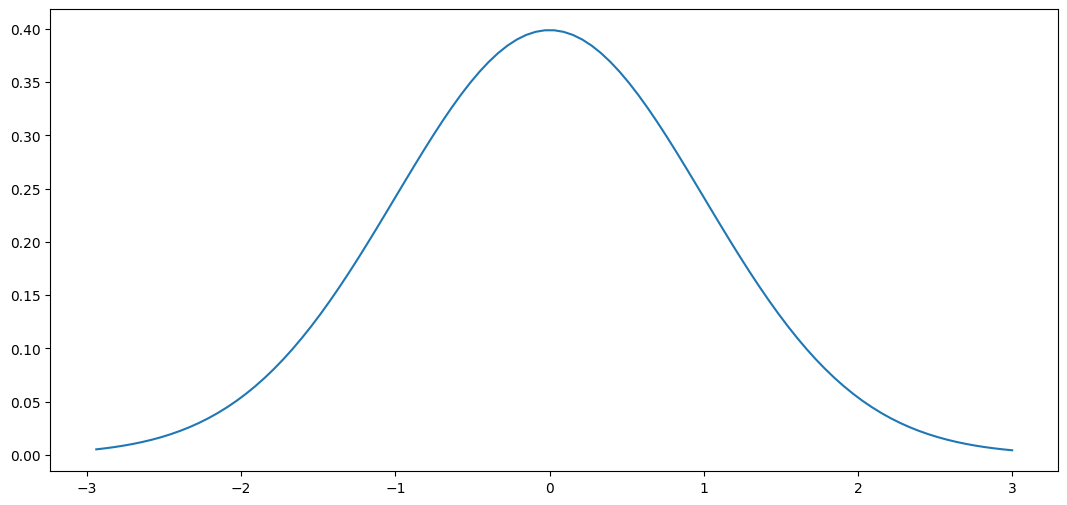

In [390]:
## 이건 시계열에 해당하지 않아서
##  ㅡ 여기서는 default → linear 방식을 사용해 interpolate 한다
x_inter = pd.Series(x).interpolate()

plt.plot(x_inter, stats.norm.pdf(x_inter, mu, sigma))
plt.show()

~~~
상당히 쓸모가 있을 것 같은 함수이다.
~~~

Series([], Name: Temp, dtype: float64)


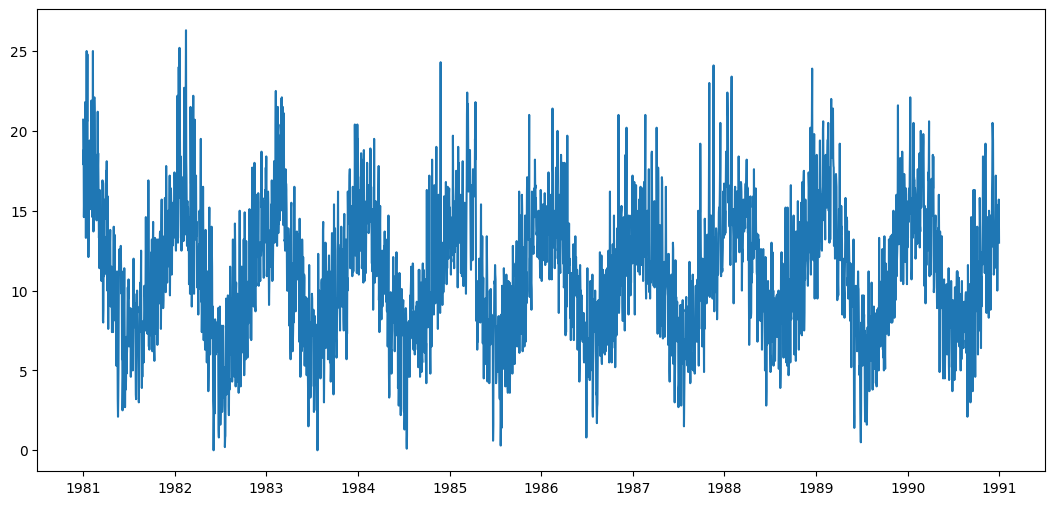

In [391]:
# 결측치가 있다면 이를 보간. 시계열이 있으니 보간 기준으로 time을 선택. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인.
print(ts1[ts1.isna()])

# 다시 그래프를 확인!
plt.plot(ts1)

시계열 데이터의 통계적 특성을 좀 더 명료하게 시각화해 보자.

일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수

현재 타임 스텝 부터 window에 주어진 타임 스텝 이전 사이

- 구간의 평균(rolling mean, 이동평균)

- 표준편차(rolling std, 이동표준편차)

원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있다.

~~~
■ 여기서 잠깐 rolling 에 대해서 알아보자
~~~

 - 데이터분석을 하다보면<br>
  일정 범위에서 규칙적으로 연산(예: 이동평균)을 해야할 일이 많다.
 
 - 예를 들어, 날마다 일주일 간의 주가 평균을 알고 싶을 때,<br>
 매일 일일이 다 계산하는 것은 매우 비효율적이다.<br>
 이 때, 유용하게 쓸 수 있는 함수가 .rolling 이다.


- [__pandas.Series.rolling__](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html)

    + window：몇 개씩 연산할지 연산 단위 지정<br>
    과거 시계열의 갯수가 window 갯수보다 모자르면 NaN 값이 들어간다.
    
    + .mean()：평균법. 연산 단위로 어떤 연산을 할 지 지정.

    + .std()：분산법. (표준편차)

    + min_periods=1：연산 단위에 데이터가 1개라도 존재할때 연산을 하겠다는 파라메터

    + center=True：기본적으로는 순차적으로 window 갯수에 따라 연산하지만,<br>
    이 파라메터를 사용 할 경우에는 가운데에서부터 window 갯수만큼 연산한다.<br>
    따라서 양 끝부분 쪽에 NaN 값이 있을 수 있다.<br>
    가운데 부분을 기준으로 이동평균 하고 싶을 때 지정하면 된다.

~~~
다시 이전의 내용으로 되돌아가서 지금까지 알아본 rolling 을 실제로 사용하면서 살펴보자
~~~

In [392]:
## 이동평균/이동표준편차 statistics 시각화 함수
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

    # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

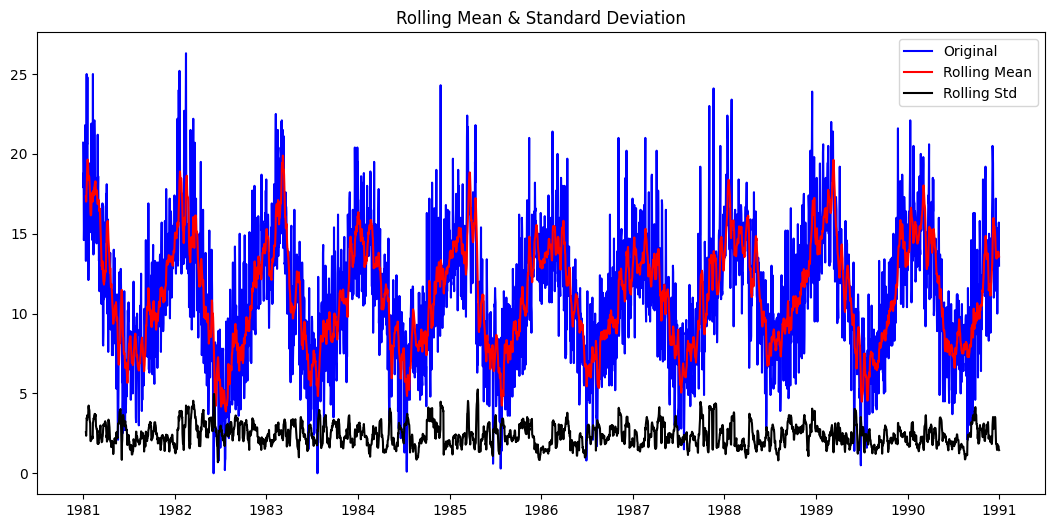

In [393]:
plot_rolling_statistics(ts1, window=12)

▲ 원래의 그래프는 청색, 이동평균은 적색, 이동표준편차는 흑색으로 표기하고 있다.

다른 데이터에 대해서도 비교해 보자.

<hr>

 ● International airline passengers dataset：월별 항공 승객 수(천명 단위)의 시계열 데이터

In [394]:
dataset_filepath = "stock_prediction/data/airline-passengers.csv"
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print()
print(type(df))
print()
df.head()


<class 'pandas.core.frame.DataFrame'>



Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

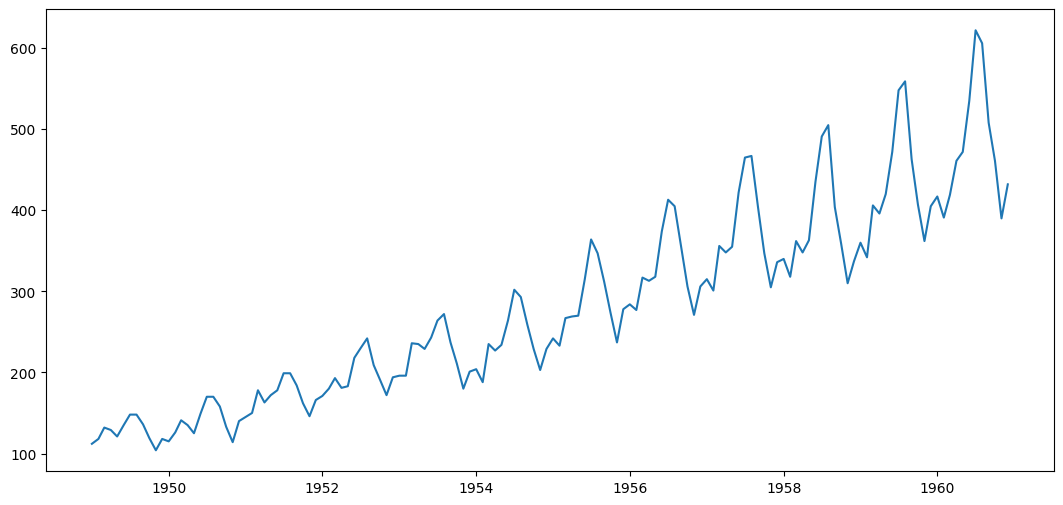

In [395]:
ts2 = df['Passengers']
plt.plot(ts2)

시간의 추이에 따라 시계열의 평균과 분산이 지속적으로 커지는 패턴을 볼 수 있다.

rolling statistics를 추가해서 시각화 해 보자.


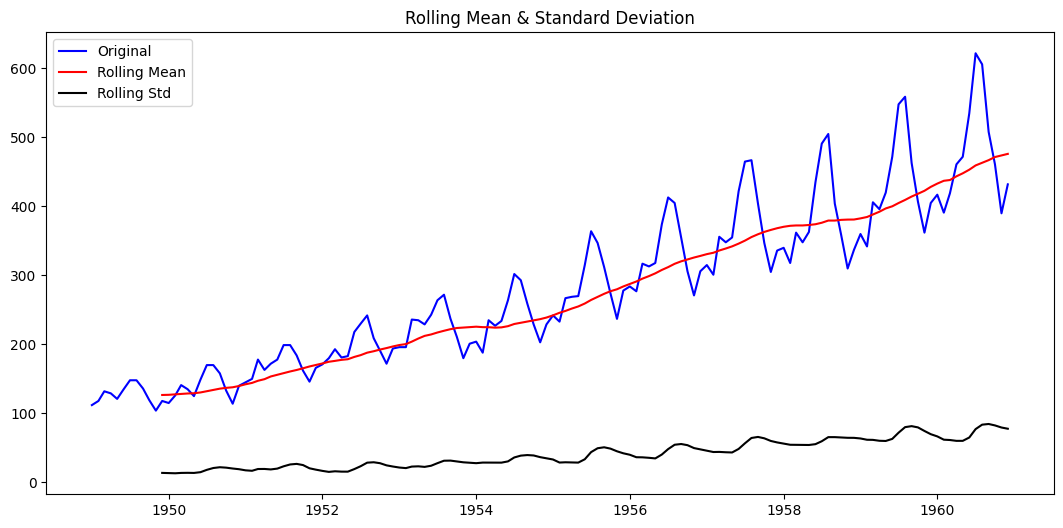

In [396]:
plot_rolling_statistics(ts2, window=12)

이와 같이 시간의 추이에 따라 평균과 분산이 증가하는 패턴을 보인다면

이 시계열 데이터는 적어도 안정적이진 않다고 정성적인 결론을 내려볼 수 있겠다.

### 4-5. 시계열 예측이란 - Stationary 여부를 체크하는 통계적 방법

#### Augmented Dickey-Fuller Test

<hr>

 ● Augmented Dickey-Fuller Test(ADF Test)：시계열 데이터의 안정성(stationary)을 테스트하는 통계적 방법

1. 주어진 시계열 데이터가 안정적이지 않다라는 귀무가설(Null Hypothesis)를 세운 후,

2. 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에

3. 이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택

statsmodels 패키지와 adfuller 메서드

<hr>

 ● statsmodels 패키지：통계검정, 시계열분석 등의 기능을 담은 통계 패키지.

아래는 statsmodels 패키지에서 제공하는 adfuller 메서드를 이용해

주어진 timeseries에 대한 Augmented Dickey-Fuller Test 를 수행하는 코드이다.

~~~
■ 여기서 잠깐 statsmodels.tsa.stattools 의 adfuller 에 대해서 알아보자
~~~

 - AR, MA, ARMA, ARIMA 모델을 적용하기 전, 우선 시계열 데이터를<br>
 정상성 데이터로 바꾼 후에 사용함이 바람직하다.

 - 정상성을 갖기 위해서는, 시계열 데이터의 평균, 분산이 시간에 따라 일정해야 하고<br>
 Lag에 따른 공분산이 일정해야 한다.
 
 - 이를 위해 로그 변환을 하거나 n차 차분을 적용할 수 있다.

 - 정상성에 대한 검증은, 시각화를 하거나 상황에 대해 직관적인 판단을 통해 알 수도 있다.

 - 그렇지만 통계적인 정량적 방법으로 검증 가능한<br>방법을 사용하는 것이 데이터를 분석할 때 더 타당하다.

 - 이를 위해 사용하는 방법중 하나가 Augmented Dickey-Fuller Test 이다.

 - ADF Test 는 Dickey-Fuller Test 를 확장하여 $p(Lag)$ 의 차분만큼을 추가해<br>
 기존 test의 검정능력을 더 강화한 것이다.


 python의 statsmodels 라이브러리에서 제공하고 있는 adfuller 를 사용하면 편리하다.

 ~~~
 자세한 내용은 다시 아래의 실습을 통해 알아보자.
 ~~~

In [397]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출.
    dftest = adfuller(timeseries, autolag="AIC")  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력.
    print("Results of Dickey-Fuller Test :")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic","p-value","#Lags Used","Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

그럼 이전 스텝에서 정성적으로 분석해 보았던 두 시계열(Time Series)에 대한 Augmented Dickey-Fuller Test 를 수행해 보면

In [398]:
print()
augmented_dickey_fuller_test(ts1)
print("─" * 64)
augmented_dickey_fuller_test(ts2)
print()



Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64
────────────────────────────────────────────────────────────────
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64



>ts1(Daily Minimum Temperatures in Melbourne)의 경우
>
>시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 0 에 가깝다.
>
>따라서 이 귀무가설은 기각되고, 이 시계열은 안정적 시계열이라는 대립가설을 채택.

>ts2(International airline passengers) 의 경우
>
>시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 1 에 가깝다.
>
>p-value가 1에 가깝다는 것이 이 귀무가설(주어진 시계열 데이터가 안정적이지 않다.) 이 옳다는 직접적인 증거는 아니지만,
>
>이 귀무가설을 기각할 수는 없게 되었으므로, 이 시계열이 안정적인 시계열이라고 말할 수는 없다.

### 4-6. 시계열 예측의 기본 아이디어 : Stationary 하게 만들 방법은 없을까

위에서 안정적이라고 말할 수 없게 된, International airline passengers 시계열을 조금 더 분석해 보자.

안정적이지 않은 시계열을 분석하려면 이것을 안정적인 시계열로 바꾸어야 한다.

여기, 2가지 방법이 있다.

> &nbsp; <br>
>
> 1. 정성적인 분석을 통해 보다 안정적(starionary)인 특성을 가지도록 기존의 시계열 데이터를 가공/변형하는 시도
>
> 2. 시계열 분해(Time series decomposition) 기법을 적용
>
> &nbsp; <br>

#### 4-6.1. 보다 Stationary한 시계열로 가공

<hr>

##### ● 로그함수 변환

- 시계열이 시간 추이에 따라 분산이 점점 커지고 있다는 특성을 보일 경우, 로그함수로 변환을 해주면 도움이 된다.

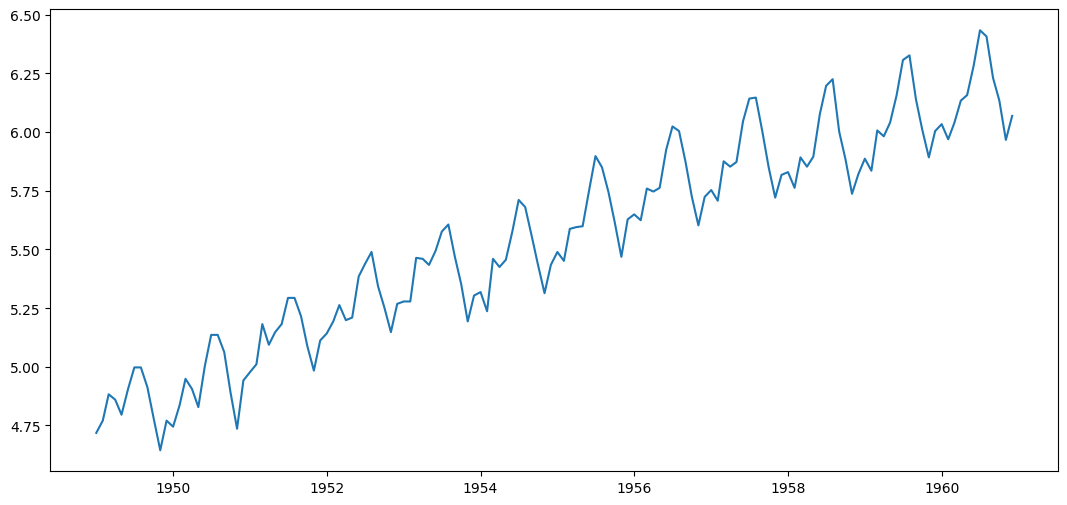

In [399]:
## 로그함수 변환
ts_log = np.log(ts2)
plt.plot(ts_log)

로그 변환의 효과를 확인하기 위해 Augmented Dickey-Fuller Test 를 수행해 보자.

In [400]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-value가 0.42 로 절반 이상 줄어들었다. 

정성적으로도 시간 추이에 따른 분산이 일정해진 것을 확인할 수 있다.

하지만 아직 두드러지는 문제점 － 시간 추이에 따라 평균이 계속 증가한다.

##### ● Moving average 제거 - 추세(Trend) 상쇄하기

- 추세(trend)：시계열 분석에서 시간 추이에 따라 나타나는 평균값 변화

- 이 변화량을 제거해 주려면, 거꾸로 Moving Average, 즉 rolling mean을 구해서 ts_log에서 빼준다

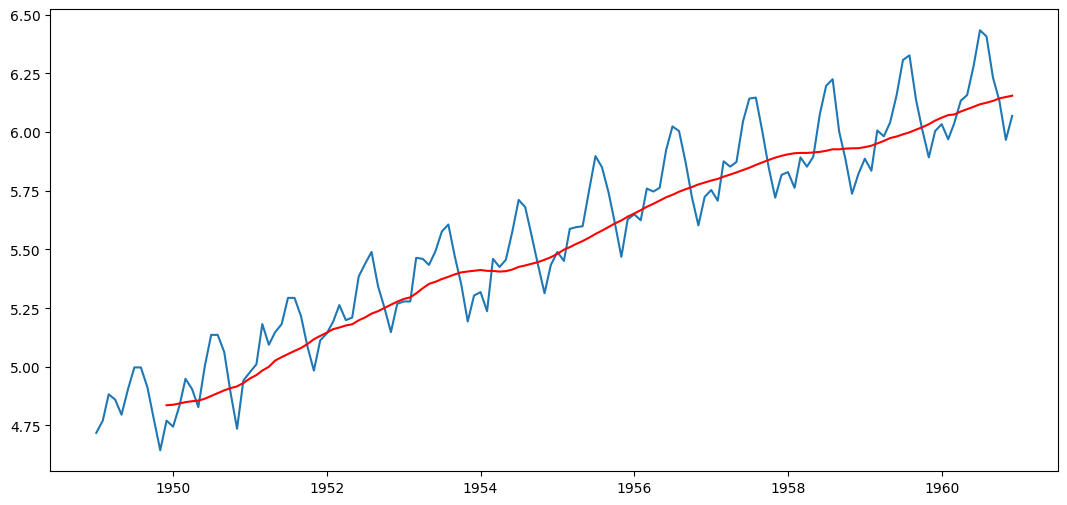

In [401]:
# moving average 구하기 
moving_avg = ts_log.rolling(window=12).mean()  

plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [402]:
# 변화량 제거
ts_log_moving_avg = ts_log - moving_avg 

ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

Moving Average 계산 시 windows size=12인 경우

앞의 11개의 데이터는 Moving Average가 계산되지 않으므로 ts_log_moving_avg에 결측치(NaN)가 발생

이 결측치들은 향후 Dicky-Fuller Test 시에 에러를 발생시킬 것이므로 이를 데이터셋에서 제거

In [403]:
## 변화량 제거로 인해 생성된 결측치 제거
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

이전에 정의했던 메서드들을 활용하여 ts_log_moving_avg 를 정성, 정량적으로 분석

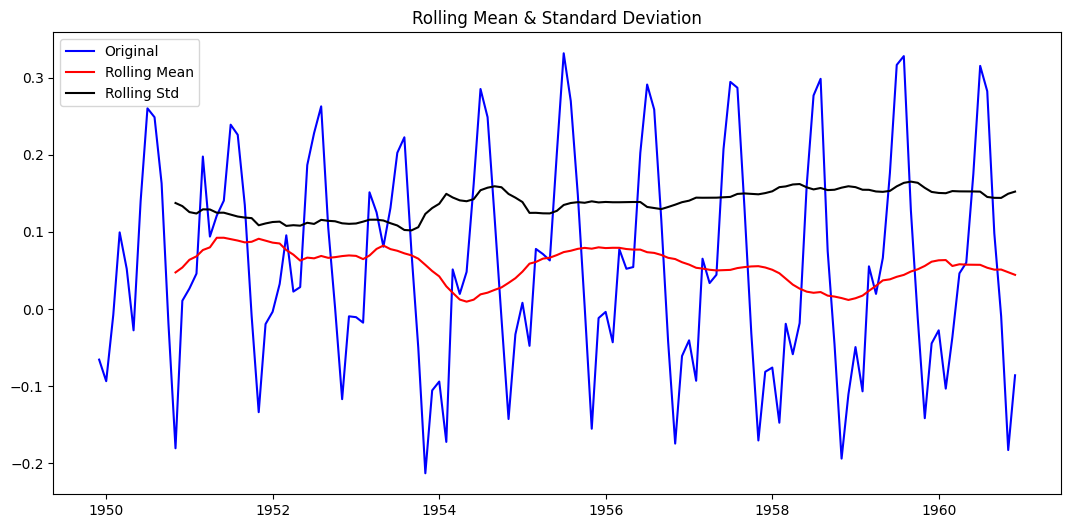

In [404]:
plot_rolling_statistics(ts_log_moving_avg)

In [405]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


p-value 가 0.02 수준이 되었다. 이 time series 는 stationary 하다고 할 수 있다.

그러나 지금까지의 접근에서 한 가지 문제점이 있는데,

바로 Moving Average 를 계산시 window=12 로 정확하게 지정해 주어야 한다는 점이다.

만약 위 코드에서 window=6을 적용했다면？

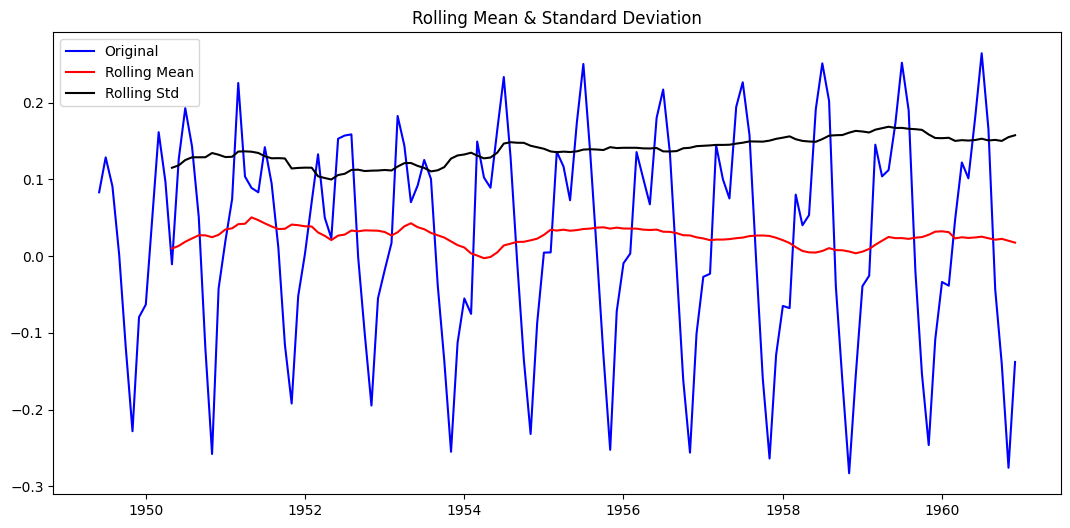

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


In [406]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

plot_rolling_statistics(ts_log_moving_avg_6)
augmented_dickey_fuller_test(ts_log_moving_avg_6)

그래프를 정성적으로 분석해서는 window=12일 때와 별 차이를 느낄 수 없지만

ugmented Dickey-Fuller Test의 결과 p-value는 0.18 수준이어서

아직도 안정적 시계열이라고 말할 수 없게 되었다.

이 데이터셋은 월 단위로 발생하는 시계열이므로

12개월 단위로 주기성이 있기 때문에 window=12 가 적당하다는 것을 추측할 수도 있겠지만, 

moving average 를 고려할 때는 rolling mean 을 구하기 위한

window 크기를 결정하는 것이 매우 중요하다는 것을 기억해 두자.

이렇게 시간의 추이에 따라 평균이 증가하는 trend를 제거하였다.

그러나 여전히 안정적인 시계열이라고 하기에는 마음에 걸리는 부분이 있다.

##### ● 차분(Differencing) - 계절성(Seasonality) 상쇄하기

- 계절성(Seasonality)：일정한 빈도로 반복되는 패턴. 

- 주기(Cycle)：일정하지 않은 빈도로 발생하는 패턴(계절성).

Trend에는 잡히지 않지만, 시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화는 예측에 방해가 되는 불안정성 요소이다.

이것은 Moving Average 제거로는 상쇄되지 않는다. 이런 계절적, 주기적 패턴을 계절성이라 한다.

- 차분(Differencing)：계절성을 상쇄하기 위한 효과적인 방법. <br><br>
시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼 주는 방법.

이렇게 되면 남은 것은 현재 스텝 값 - 직전 스텝 값이 되어

정확히 이번 스텝에서 발생한 변화량을 의미하게 된다.

시프트한 시계열과 원본 시계열에 대한 그래프를 그려보자.

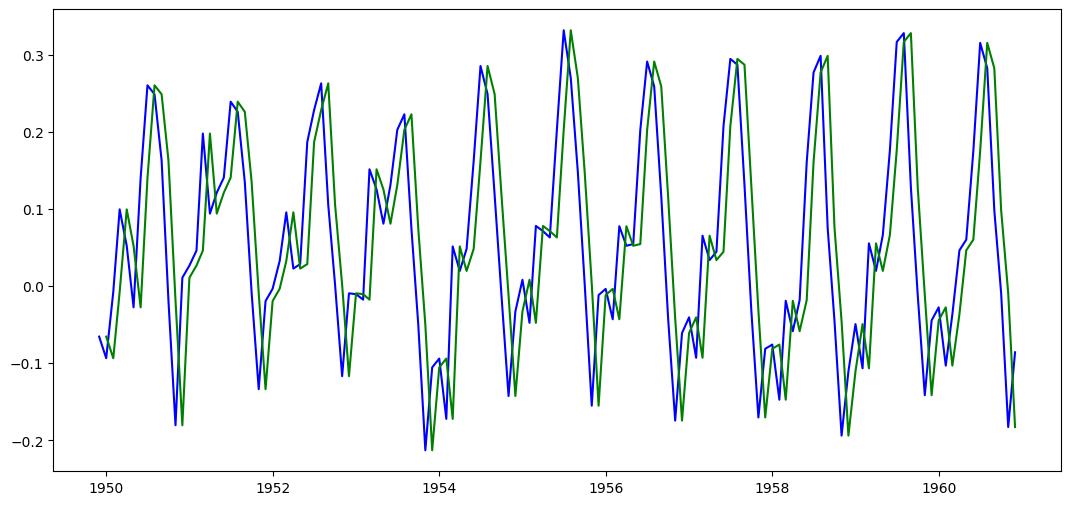

In [407]:
## 시프트한 시계열과 원본 시계열에 대한 그래프를 그린다.
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

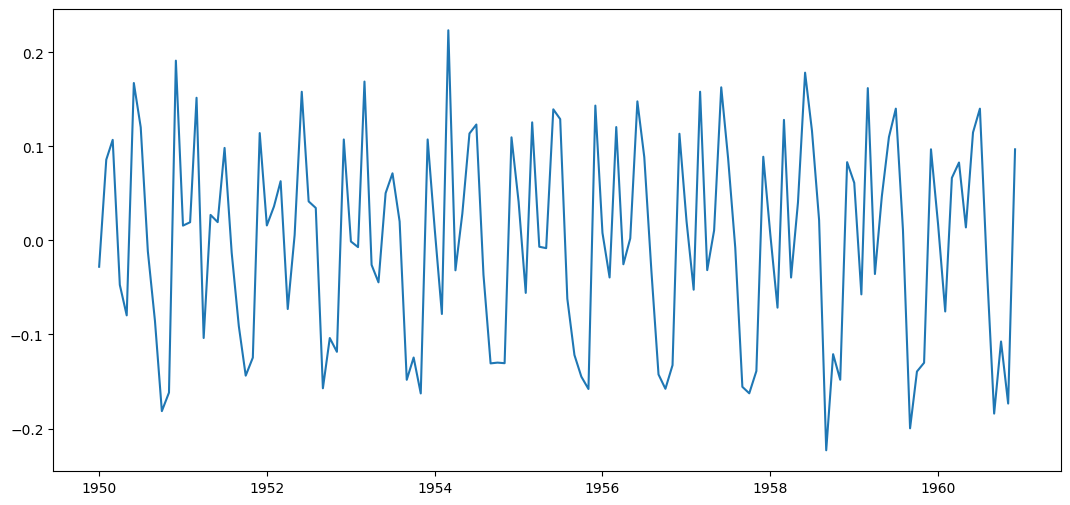

In [408]:
## 원본 시계열에서 시프트한 시계열을 뺀 값을 그래프로 출력한다.
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

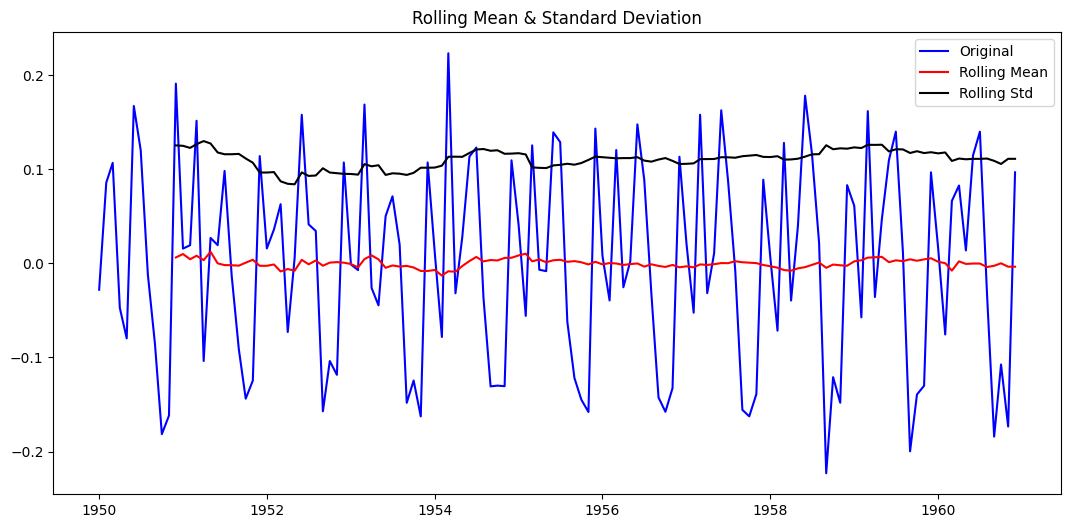

In [409]:
## 이동평균과, 이동표준편차를 그래프에 나타내어 정성적으로 안정성(stationary) 여부를 파악해보자.
plot_rolling_statistics(ts_log_moving_avg_diff)

In [410]:
## 차분의 효과가 어떠했는지 알아보기 위해 Augmented Dickey-Fuller Test 수행
augmented_dickey_fuller_test(ts_log_moving_avg_diff)


Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


이동평균을 빼 주어 추세(Trend)를 제거하고 난 시계열에다

1차 차분(1st order differencing)을 적용하여 Seasonality 효과를 다소 상쇄한 결과,

p-value가 약 0.022 에서 0.0019로 1/10 정도로 줄었다.

데이터에 따라서는 2차 차분(2nd order differencing, 차분의 차분), 

3차 차분(3rd order differencing, 2차 차분의 차분)을 적용하면 더욱 p-value를 낮출 수 있을지도

#### 4-6.2. 시계열 분해(Time series decomposition)

<hr>

● seasonal_decompose：시계열 안에 존재하는 trend, seasonality 를 직접 분리해 낼 수 있는 statsmodels 라이브러리의 메서드<br>

 - __moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있다.__

~~~
■ 여기서 잠깐 seasonal_decompose 에 대해서 알아보자
~~~

우선 중요한 용어의 개념을 정리하면 다음과 같다.

- 시계열 정보는 일반적으로 추세(trend), 계절(seasonal) 의 불규칙성들이 나타난다.

- __추세(trend)__：시계열 분석에서 시간 추이에 따라 나타나는 평균값 변화

- 이 변화량을 제거해 주려면, 거꾸로 Moving Average, 즉 rolling mean을 구해서 ts_log에서 빼준다

- __계절성(seasonality)__：일정한 빈도로 반복되는 패턴. 

- __주기(cycle)__：일정하지 않은 빈도로 발생하는 패턴(계절성).

- __차분(Differencing)__：계절성을 상쇄하기 위한 효과적인 방법. <br><br>
시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼 주는 방법.

- __잔차(residual)__：원 데이터에서 앞서 도출한 추세와 계절성의 값을 제거한 나머지 값.

~~~
▣ 하지만
~~~

><br>
> &nbsp; &nbsp; 바로 윗 블럭에서 서술했듯, 이러한 과정은<br>
>
> &nbsp; &nbsp; statsmodels 라이브러리의 seasonal_decompose 메서드를 통해<br>
>
> &nbsp; &nbsp; 지금까지의 과정을 거치지 않고도 훨씬 안정적인 시계열 분리가 가능하다.
> <br>
>&nbsp;


좀 더 자세한 내용은 statsmodels 공식 문서를 통해서 알 수 있다.

- [statsmodels.tsa.seasonal.seasonal_decompose](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)


~~~
다시 아래의 실습을 통해 알아보자.
~~~

바로 확인해보자

위에서 구했던 로그 변환 단계(ts_log)에서부터

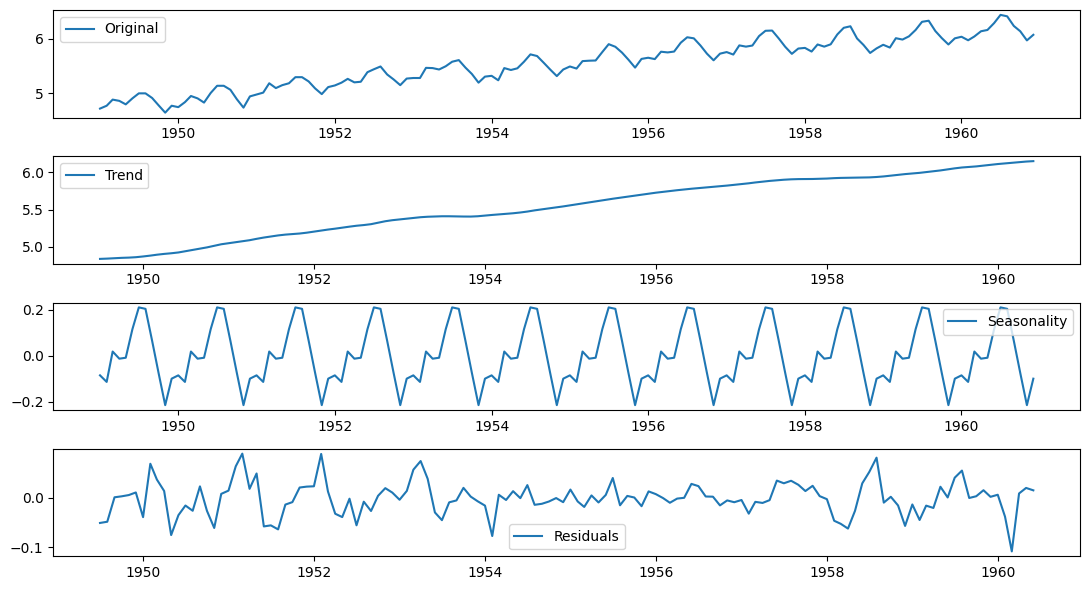

In [411]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend         # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal   # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid      # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')          ## 원본
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')              ## 추세
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')      ## 계절성
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')       ## 잔차
plt.legend(loc='best')
plt.tight_layout()

Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지가 Residual 

Trend + Seasonality + Residual = Original 이 성립.

이러한 Decomposing은 시계열 데이터를 이해하는 중요한 관점을 제시해 준다.

Residual 에 대해 안정성 여부를 확인해 보자.

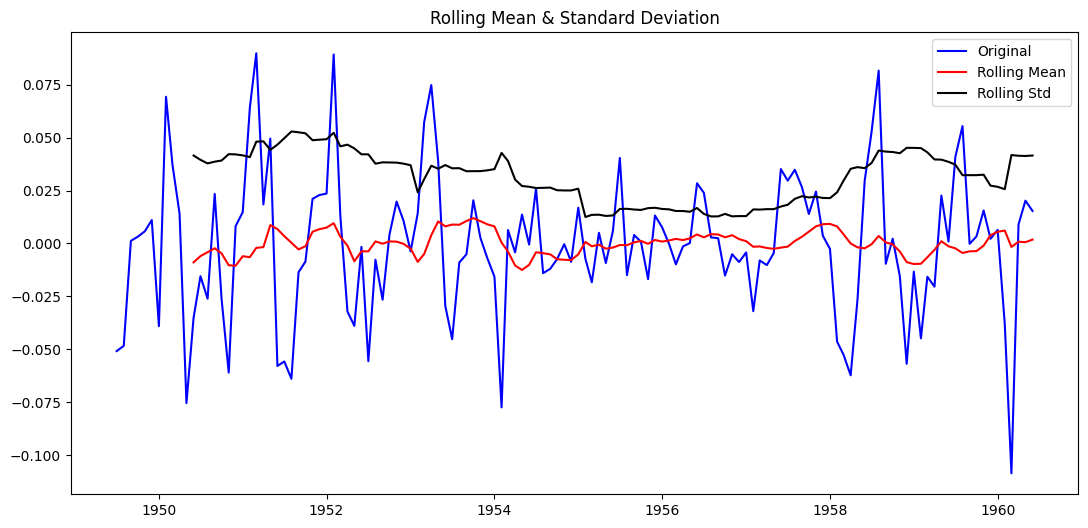

In [412]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [413]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


__Decomposing을 통해 얻어진 Residual은 압도적으로 낮은 p-value를 보여준다.__

__이 정도면 확실히 예측 가능한 수준의 안정적인 시계열이 얻어졌다고 볼 수 있겠다.__

### 4-7. ARIMA 모델의 개념


#### 1. ARIMA 모델의 정의

<hr>

앞에서 시계열 데이터가 Trend와 Seasonality, Residual로 분해되는 것을 확인했다.

또, Trend와 Seasonality를 잘 분리해 낸 경우,

Residual이 예측력 있는 안정적인 시계열 데이터가 되는 것을 확인하였다.

> &nbsp;<br>
>  ●  ARIMA(Autoregressive Integrated Moving Average)를 사용하면<br>
> <br>
> &nbsp;&nbsp;&nbsp;이 원리를 이용해 시계열 데이터 예측 모델을 자동으로 만들 수 있다. <br>&nbsp;
>

ARIMA는 AR(Autoregressive) + I(Integrated) + MA(Moving Average) 라고 할 수 있다.

각각의 개념을 살펴보면 지금까지 배운 개념과 닮아 있음을 알게 된다.

##### 1) AR (자기회귀, Auto Regressive ← AR) 

 - $Y_{t}$ 가 이전 p개의 데이터 $Y_{t-1}, Y_{t-2}, ..., Y_{t-p}$ 의 가중합으로 수렴한다고 보는 모델

 - __AR 은 시계열의 Residual 에 해당하는 부분을 모델링__

 - 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이, 주식 시계열을 AR로 모델링하는 관점

&nbsp;&nbsp;&nbsp;&nbsp; 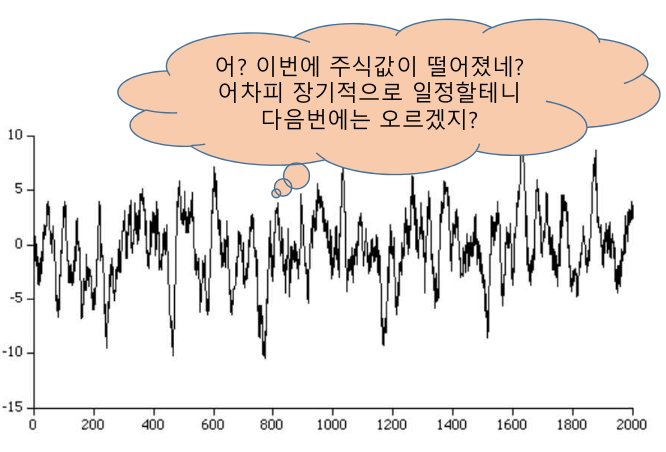

2. MA (이동평균, Moving Average ← MA)

- MA는 $Y_{t}$ 가 이전 q개의 예측오차값 $e_{t-1}, e_{t-2}, ..., e_{t-q}$  의 가중합으로 수렴한다고 보는 모델.

- __MA는 시계열의 Trend에 해당하는 부분을 모델링__

- 주식값이 최근의 증감 패턴을 지속할 것이라고 보는 관점이 MA로 모델링하는 관점

&nbsp;&nbsp;&nbsp;&nbsp; 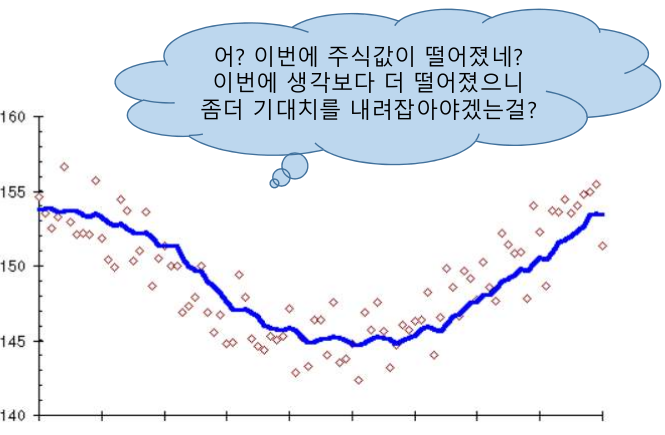

3. I (차분 누적, Integration)

 - I는 $Y_{t}$ 이 이전 데이터와 $d$차 차분의 누적(integration) 합이라고 보는 모델

 - __I는 시계열의 Seasonality에 해당하는 부분을 모델링__

ARIMA는 위 3가지 모델을 모두 한꺼번에 고려.

위 그림에서 보듯 어제 주식값이 떨어졌다는 것을 알게 되었을 때,

- '오늘은 주식이 올라서 균형을 맞추겠지?'라는 AR 형태의 기대와

- '어제 떨어졌으니 추세적으로 계속 떨어지지 않을까?'라는 MA 형태의 우려가 동시에 떠오름

ARIMA는 두 모델 사이에서 적정 수준을 찾아간다.

#### 2. ARIMA 모델의 모수 p, q, d


<hr>

ARIMA를 효과적으로 활용하기 위해서는 ARIMA의 모수(parameter)를 잘 설정해야 한다.

핵심적인 숫자들을 잘 정해야 올바른 예측식을 구할 수 있다는 의미이다.

ARIMA의 모수는 아래의 3가지가 있다.

- __p__ : 자기회귀 모형(AR)의 시차

- __d__ : 차분 누적(I) 횟수

- __q__ : 이동평균 모형(MA)의 시차


이들 중 p 와 q 는 __일반적으로__ p + q < 2, p * q = 0 인 값을 사용하는데,

이는 p 나 q 중 하나는 0 이라는 의미이다.

이렇게 하는 이유는 많은 시계열 데이터가 AR이나 MA 중 하나의 경향만 가지기 때문

ARIMA의 적절한 모수 p, d, q를 선택하는 방법으로 많은 통계학적인 시도들이 있지만

대표적인 것만 이야기하면 

- ACF(Autocorrelation Function) 와

- PACF(Partial Autocorrelation Function) 가 있다.

이 AutoCorrelation 은 자기상관계수와 같은 개념이다.

##### __ACF__

- 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수

- 주어진 시계열의 현재 값이 과거 $(y_{t-1}, y_{t-2}, ...., y_{t-n})$ 값과 어떻게 상관되는지 설명함.

- ACF plot에서 X 축은 상관 계수를 나타냄, y축은 시차 수를 나타냄

##### __PACF__

 - <b>다른 관측치의 영향력을 배제</b>하고 두 시차의 관측치 간 관련성을 측정하는 함수
 
 - k 이외의 모든 시차를 갖는 관측치 $(y_{t-1}, y_{t-2}, ...., y_{t-k+1})$ 의 영향력을 배제한 가운데 특정 두 관측치, $y_{t}$ 와 $y_{t-k}$ 가 얼마나 관련이 있는지 나타내는 척도.

## - 여기까지 무슨 말인지… <br>혼란스럽고 뭐가 뭔지 이해가 잘 안된다.
 
~~~
■ 여기서 잠깐, statsmodels 의 공식문서를 통해
  ARIMA 모델 생성에 대해서 더 자세히 알아보자.
~~~

- [statsmodels.tsa.arima.model.ARIMA](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html)

선언부는 아래와 같은 구성으로 이루어져있다.

 __class statsmodels.tsa.arima.model.ARIMA(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)__

-----

번역기의 힘을 빌리자면

__이 모델은 외인성 회귀가 있는 모델과 계절적 구성 요소가 있는 모델을 포함하는, ARIMA 유형 모델의 기본 인터페이스입니다.__

모델의 가장 일반적인 형태는 SARIMAX (p, d, q) x (P, D, Q, s)입니다. 

또한 다음을 포함한 모든 특수 케이스를 허용합니다.

  - autorefressive models : AR(p)

  - moving average models: MA(q)

  - mixed autoregressive moving average models: ARMA(p, q)

  - integration models: ARIMA(p, d, q)

  - seasonal models: SARIMA(P, D, Q, s)

  - regression with errors that follow one of the above ARIMA-type models

-------

여기서 확인 할 수 있는 사실은, 아래와 같다.

조금만 위로 올라가서, 이전 블록을 보다보면

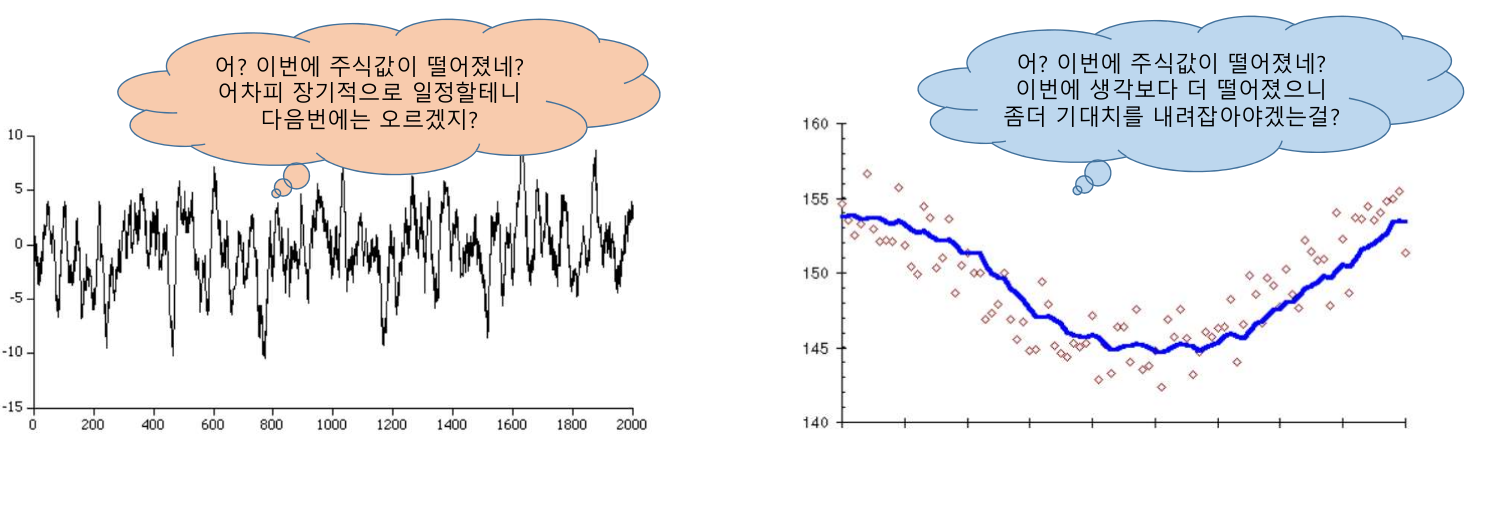

▲ 위의 부분을 발견 할 수 있다.

짤막하게 한번 정리를 해 보자면 아래와 같다.

- 왼쪽의 그림은 AR (시계열의 Residual 에 해당하는 부분을 모델링) 에 대한 자료로 사용되었다.

- 오른쪽의 그림은 MA (시계열의 Trend 에 해당하는 부분을 모델링) 에 대한 자료로 사용되었다.

- 참고로, 그림은 사용되지 않았지만 I 는 시계열의 Seasonality에 해당하는 부분을 모델링 한다.

여기서 __【중요한 사실 1】__ 을 다시 한번 확인 해야 한다.

  ### ※ 1. ARIMA 모델은 이 AR, MR, I 까지도 고려하여 포함하고 있는 모델이다.

~~~

 따라서 일단은, AR, MA 모델에 대한 설명을 위한 저 그림들이
 
 어떤 의미를 가지는지 정도만 확실히 이해하면 되고,

 우리는 ARIMA 모델을 잘 사용하기만 하면 된다. 
 
 ARIMA 가 알아서 해 준다는 이유 때문이다.

 그런데, 그러면… ARIMA 모델을 잘 사용하려면 어떻게 해야 하는걸까？

~~~

### ▼ 일단 다음 Markdown 블럭을 보자


International airline passengers 시계열을 그려서 statsmodels에서 제공하는 ACF와 PACF 를 알아보자.

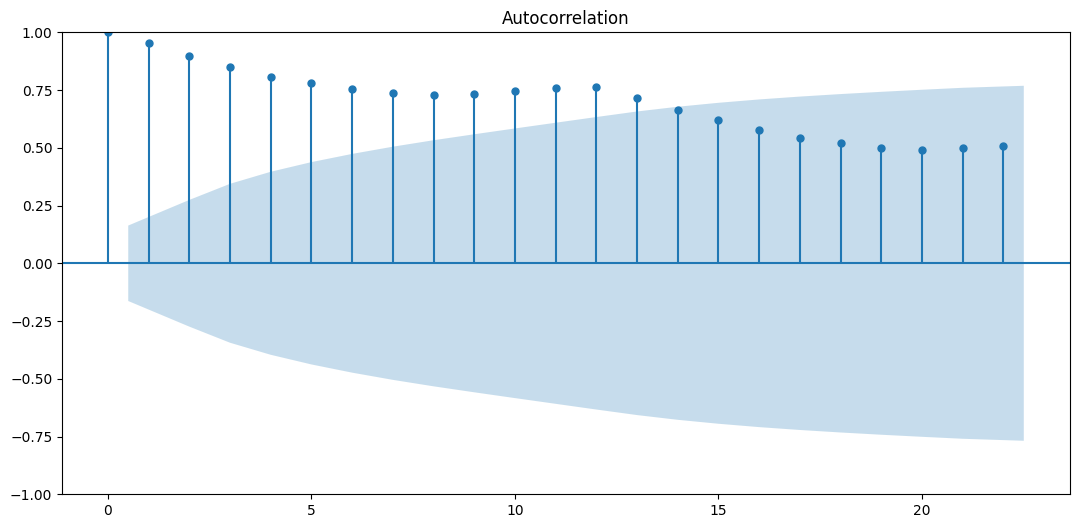

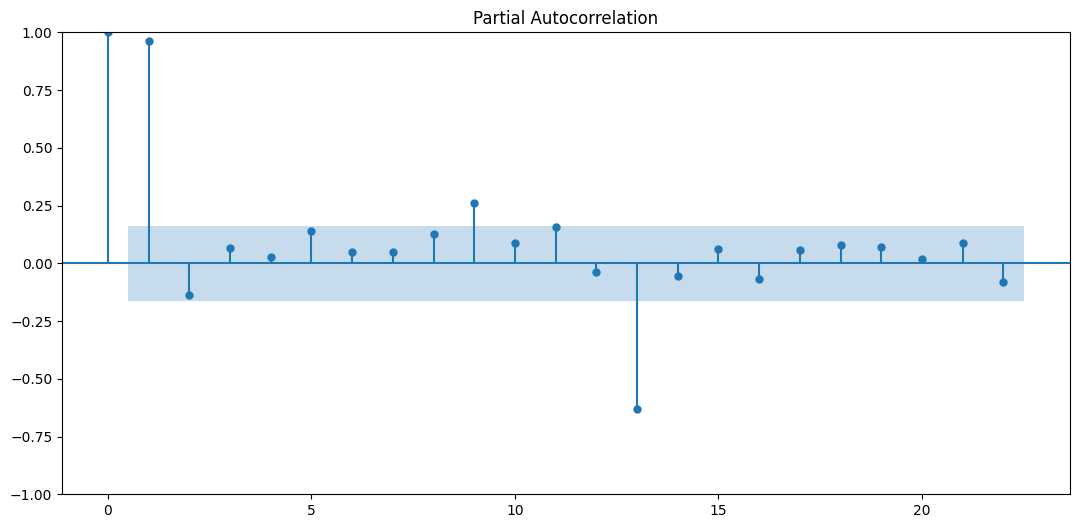

In [414]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

<hr>

아래 그림은 ACF를 통해 MA 모델의 시차 q를 결정하고, 

PACF를 통해 AR 모델의 시차 p를 결정할 수 있음을 통계학적으로 설명하는 아티클의 요약 결론 부분

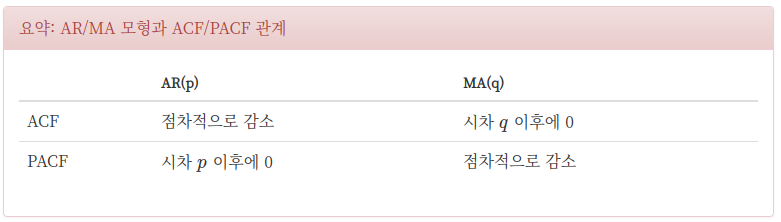

이 요약 결론 부분을 참고하여 아래의 그림을 보자

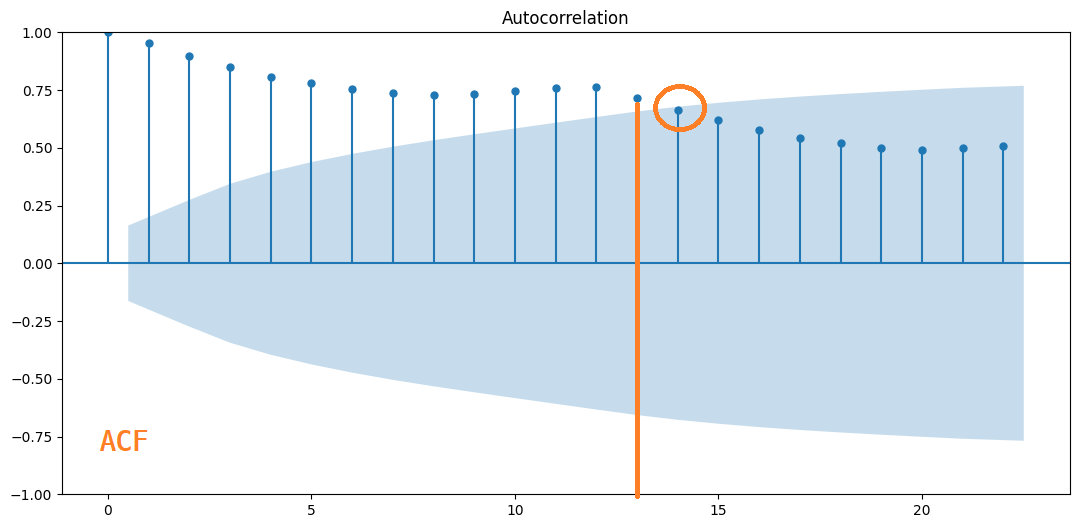

PACF를 먼저 확인하는게 좋지만, 

여기서는 일단 요약 결론 부분의 표 순서에 따라 ACF를 먼저 확인해보자.

이 그래프를 통해 알 수 있는 사실은 다음과 같다.

- 이 그래프의 가로축(x축)은 시계열에서의 시차를 나타내고 있다.

- 세로축(y축)은 ACF 값을 나타내고 있다.

- __ACF 값은 조금씩 감소하고 있다.__

- q 값은 마땅한 값이 없다고 보인다. <br>굳이 값을 정해야 한다면 13 정도의 값이 되겠지만,<br>

- 위의 요약 결론 부분에 따르면 : __ACF 점차적으로 감소__ 해당.

자 그러면, 이번엔 PACF 그래프를 보자

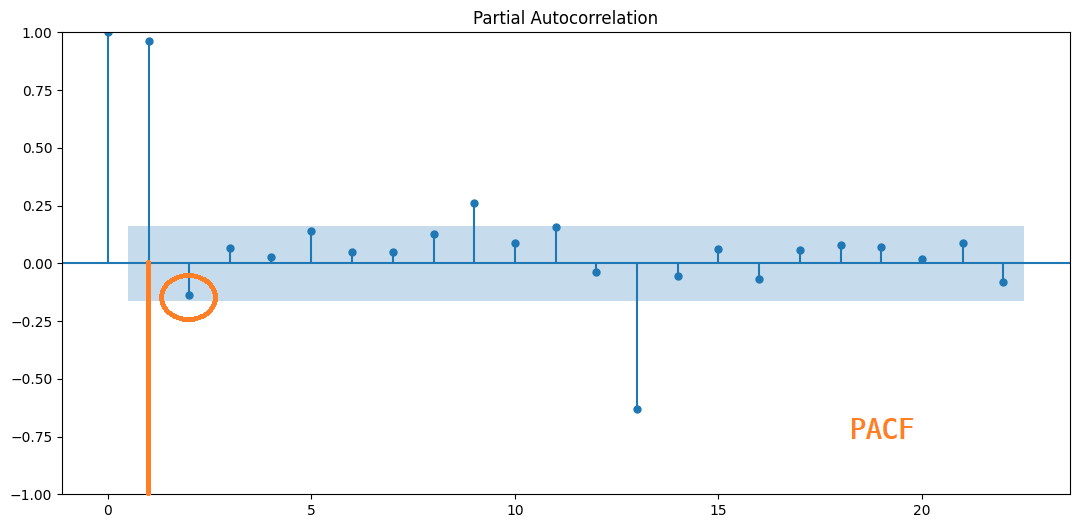

이 그래프를 통해 알 수 있는 사실은 다음과 같다.

- 이 그래프의 가로축(x축)은 시계열에서의 시차를 나타내고 있다.

- 세로축(y축)은 PACF 값을 나타내고 있다.

- __PACF 값은 시차 1 이후에 0 에 가깝다.__

- 위의 요약 결론 부분에 따르면 : __시차 p 이후에 0 에 가까워 진다. p = 1__ 해당.

  + 전형적인 AR(p) 의 자기회귀 모형의 특성을 찾아볼 수 있다.


ARIMA 모델에 대해서 statsmodel 공식 문서를 참고하는 과정에서

  - autorefressive models : AR(p)

  - moving average models: MA(q)

  - mixed autoregressive moving average models: ARMA(p, q)

  - integration models: ARIMA(p, d, q)

  - seasonal models: SARIMA(P, D, Q, s)

  - regression with errors that follow one of the above ARIMA-type models

이상의 모델들도 포함하는 인터페이스라 했다.


사실 이상의 내용을 보아서는 AR(p) 모델을 사용하면 충분할 것 같아보인다.

그렇지만 계절성을 고려한 I 부분도 확인을 해 봐야 한다.

그러므로 __【ARIMA(p, d, q)】__ 사용하여 d 에 대한 값도 찾고,

적합한 ARIMA 모수 지정을 하면 ARIMA 가 적절하게 모델링을 수행 할 것이다！

~~~
ARIMA 를 잘 사용하려면, 이러한 개념들을 이해 하고,

다음 블럭의 설명에서 볼 수 있는 ARIMA 모수를

   (공식 문서에 따르면 
~~~ 

>    <b>order=(p, d, q)</b> 

~~~
   … 에 유의.) 알맞게 사용하는 것이다.
~~~
<hr>

다시 본문으로 복귀하자.

이 내용과 함께 확인해 보자

```
ARIMA의 모수는 아래의 3가지가 있다.

- p : 자기회귀 모형(AR)의 시차

- d : 차분 누적(I) 횟수

- q : 이동평균 모형(MA)의 시차


이들 중 p 와 q 는 일반적으로 p + q < 2, p * q = 0 인 값을 사용하는데,

이는 p 나 q 중 하나는 0 이라는 의미이다.

이렇게 하는 이유는 많은 시계열 데이터가 AR이나 MA 중 하나의 경향만 가지기 때문
```

이 결론에 따라 보자면,

- PACF 그래프를 볼 때 p=1 이 매우 적합：p가 2 이상인 구간에서 PACF는 거의 0에 가까워지고 있기 때문

- PACF가 0이라는 의미는 현재 데이터와 p 시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다는 의미.

- 반면 ACF는 점차적으로 감소하고 있어서 AR(1) 모델에 유사한 형태를 보이고 있다. 

- q에 대해서는 적합한 값이 없어 보인다.

- MA를 고려할 필요가 없다면 q=0으로 둘 수 있다. 하지만 q를 바꿔 가면서 확인해 보는 것도 좋겠다.


d를 구하기 위해서는 좀 다른 접근이 필요하다.

- d차 차분을 구해 보고 이때 시계열이 안정된 상태인지를 확인해 봐야 한다.

In [415]:
## 기본 ADF Test
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


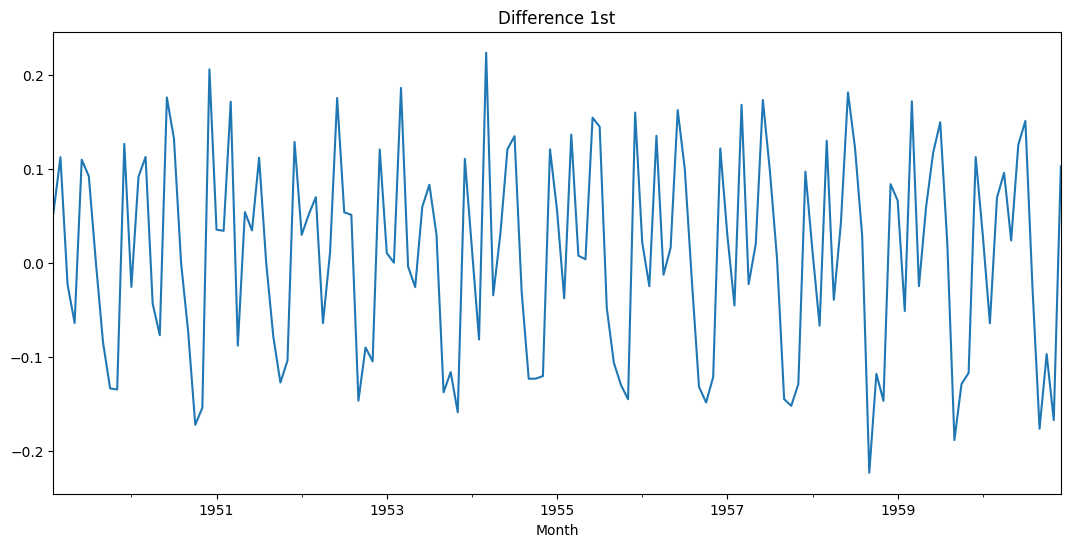

In [416]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


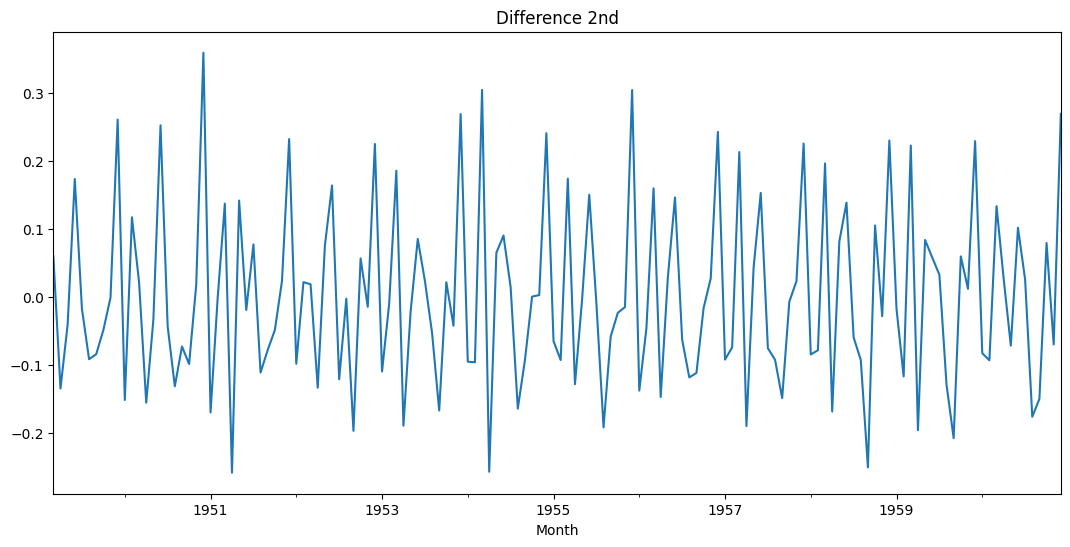

In [417]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

이번 경우에는 1차 차분을 구했을 때 약간 애매한 수준의 안정화 상태를 보였는데,

2차 차분을 구했을 때는 확실히 안정화 상태였지만 이번 경우에는 d = 1 로 먼저 시도해 보겠다.

d 값을 바꿔 가면서 최적의 값을 찾아보는게 좋다고 한다.

#### 3. 학습 데이터 분리

<hr>

시계열 데이터에서 학습 데이터와 테스트 데이터를 분리하는 코드가 아래에 있다.

분리 비율인 학습：테스트 는 9:1로,

시계열 예측이니만큼 가장 나중 데이터를 테스트용으로 사용하는 것이 타당할 것이다.

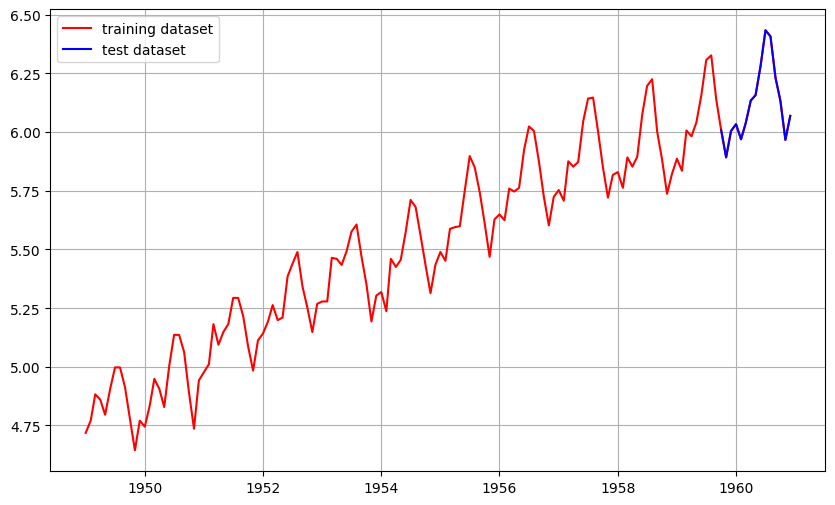

In [418]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]    ## 9 까지, 9 부터
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

데이터셋의 형태는 다음과 같이 확인

In [419]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


### 4-8. ARIMA 모델 훈련과 추론

ARIMA 모델을 훈련하는 것은 아래와 같다

In [420]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA

# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(14, 1, 0)   Log Likelihood                 219.932
Date:                Thu, 29 Sep 2022   AIC                           -409.863
Time:                        23:43:01   BIC                           -367.083
Sample:                    01-01-1949   HQIC                          -392.481
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2757      0.081     -3.398      0.001      -0.435      -0.117
ar.L2         -0.0109      0.109     -0.101      0.920      -0.224       0.202
ar.L3          0.0028      0.046      0.061      0.9

ARIMA 모델의 훈련 결과를 시각적으로 확인하자

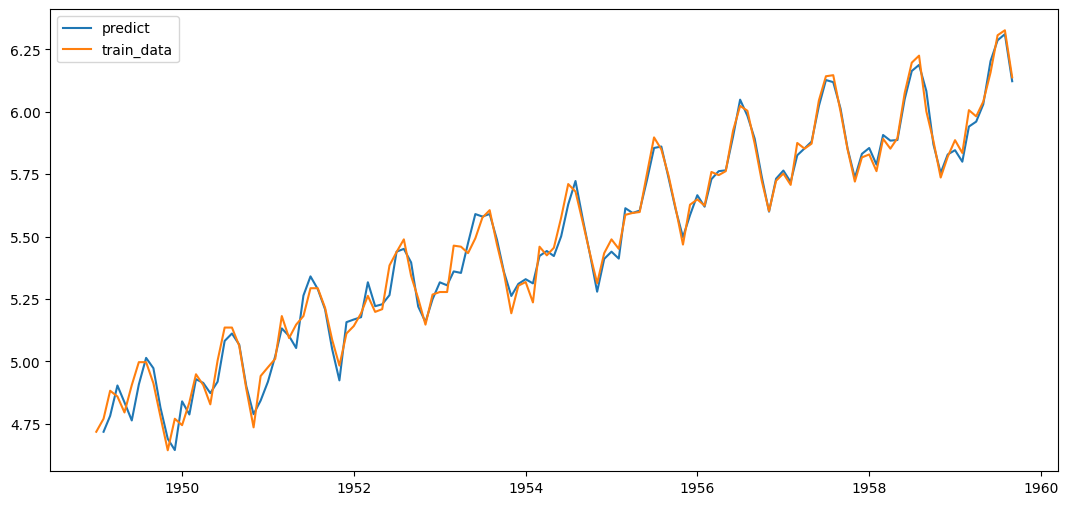

In [421]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측해보자

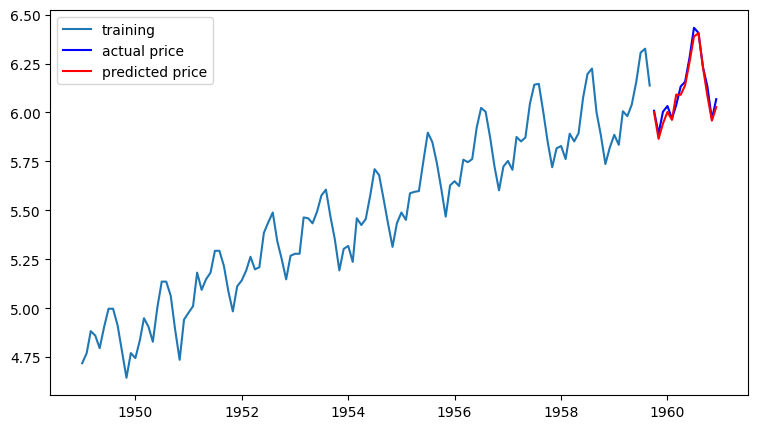

In [422]:
model = ARIMA(train_data, order=(14, 1, 0))         # p값을 14으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)   # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)    # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

시계열 데이터를 로그 변환하여 사용했으므로 다시 지수 변환해야 정확한 오차를 계산할 수 있다.

np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산해보자.

In [423]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  228.81053161303848
MAE:  12.247915618916826
RMSE:  15.126484443288152
MAPE: 2.70%


최종적으로 예측 모델의 메트릭으로 활용하기에 적당한 MAPE 기준으로 10% 정도의 오차율을 나타낸다.

썩 만족스럽지 않은데, 더 적당한 모수를 찾을 수 있다면 개선의 여지가 있을지도…

p=14 를 줄 경우 MAPE가 2% 정도로 내려간다.

조금더 다양한 테스트를 거쳐 최적화된 모델을 만들보자.

### 4-9. 프로젝트 : 주식 예측에 도전해 보자

#### STEP 1 : 시계열 데이터 준비

<hr>

- 칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume

- 날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)이 저장되어 있다.

- 우리는 종가(Close)만 사용. (주식 시장은 정해진 시간 동안만 거래가 가능. 종가란 하루의 장이 마감하였을 때의 가격.)



In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


from pandasql import sqldf
psqldf = lambda q: sqldf(q, globals())


dataset_filepath = "stock_prediction/data/005930.KS.csv"

# Time Series 생성
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True).fillna(0)  

# df = pd.read_csv(dataset_filepath).fillna(0)
# df = psqldf("select * from df where Date > '2021-02-01'")
# df = df.set_index("Date")

print(type(df))

ts = df["Close"]

print(type(ts))
ts.head()


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

#### STEP 2 : 각종 전처리 수행

<hr>

- 결측치 처리

- 로그 변환

Series([], Name: Close, dtype: float64)


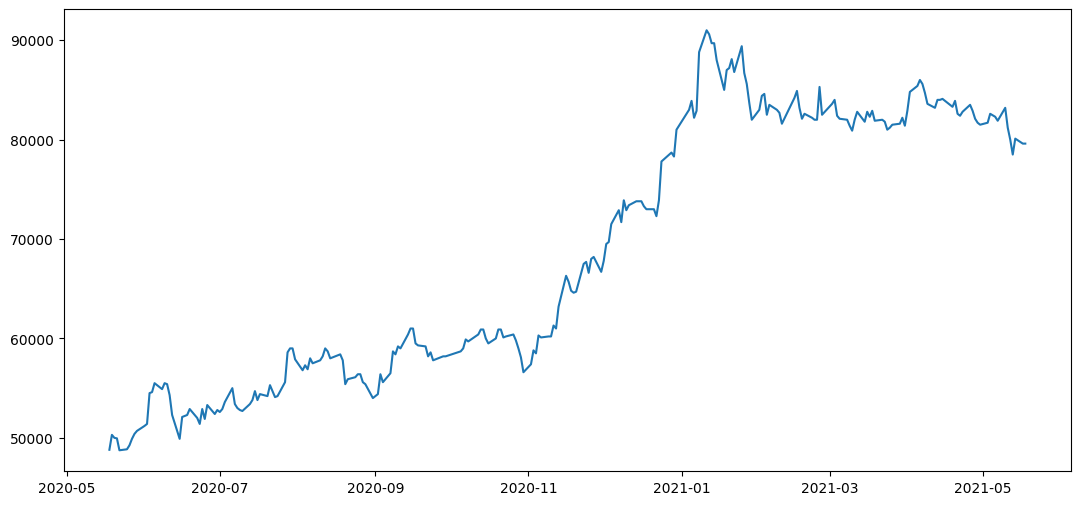

In [425]:
# 결측치가 있다면 이를 보간. 보간 기준은 time을 선택. 
#ts = ts.interpolate(method="time")     ## 이거 Nan 있을 경우에

# 보간 이후 결측치(NaN) 유무를 다시 확인.
print(ts[ts.isna()])

# 다시 그래프를 확인!
plt.plot(ts)

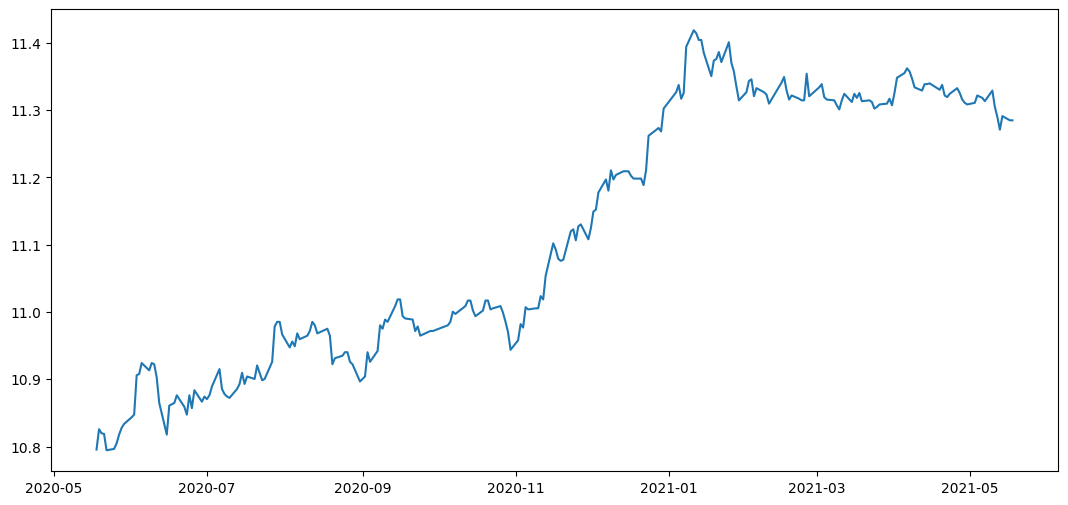

In [426]:
## 로그함수 변환
ts_log = np.log(ts)

plt.plot(ts_log)

#### STEP 3 : 시계열 안정성 분석

<hr>

- 정성적 그래프 분석

- 정량적 Augmented Dicky-Fuller Test

- 시계열 분해(Time Series Decomposition)

- Residual 안정성 확인

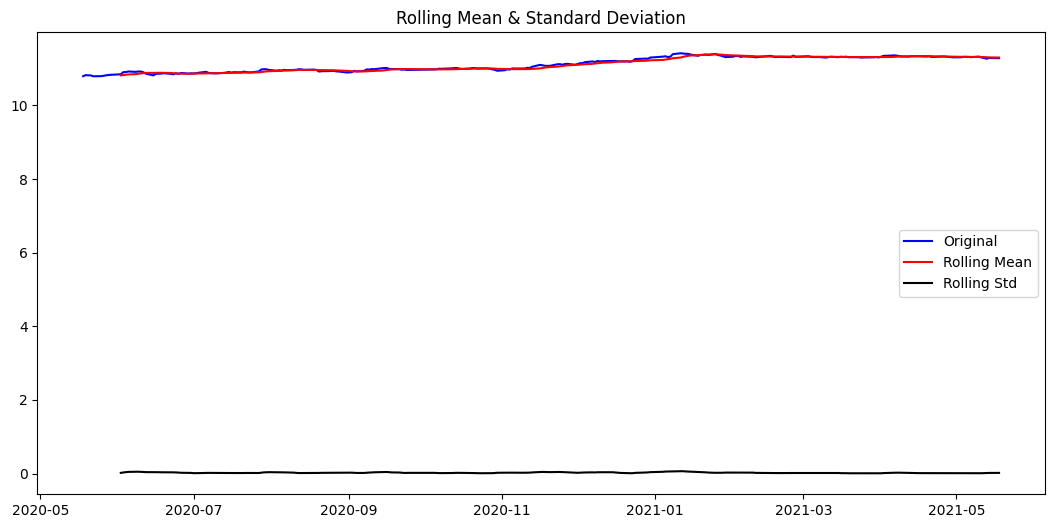

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


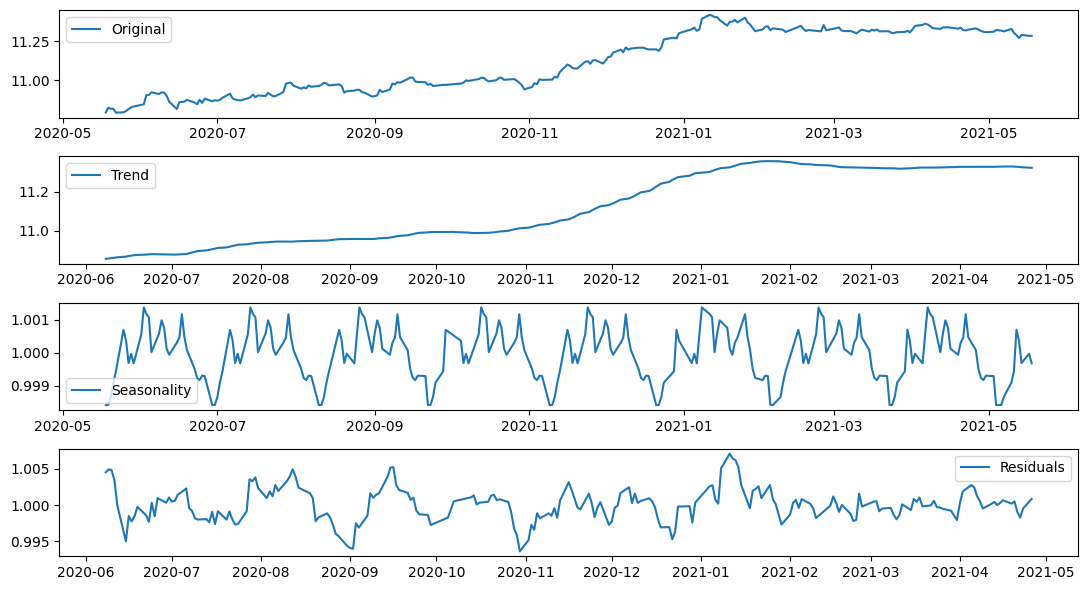

In [427]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period=30) 

# [[YOUR CODE]]
trend = decomposition.trend         # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal   # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid      # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



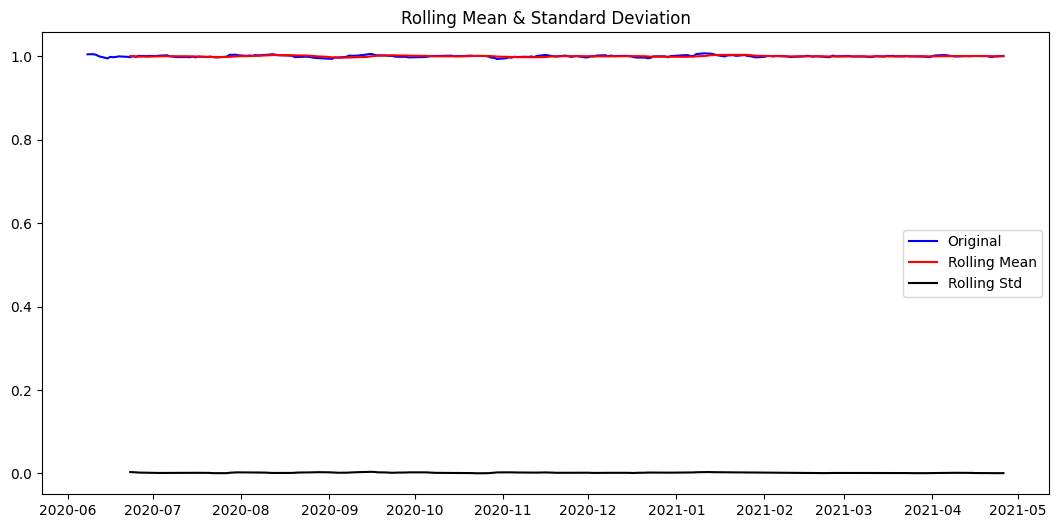

In [428]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [429]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


#### STEP 4 : 학습, 테스트 데이터셋 생성

<hr>

- 학습, 테스트 데이터셋 분리

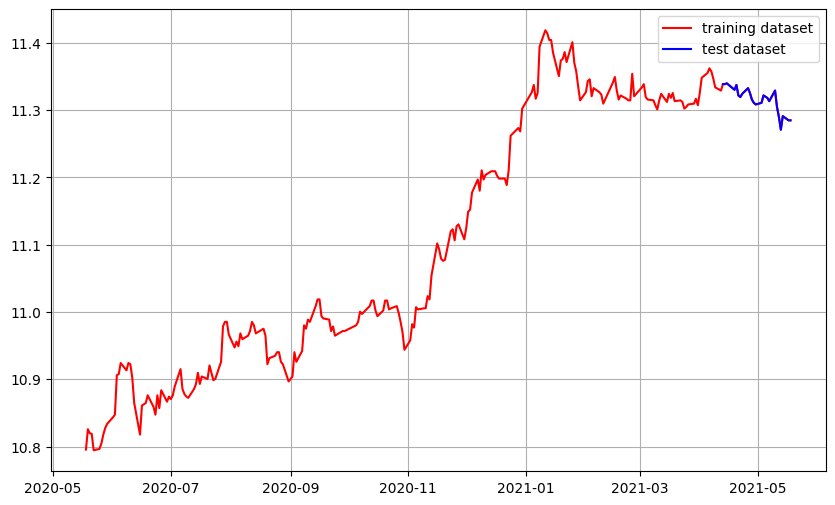

In [430]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]    ## 9 까지, 9 부터
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

#### STEP 5 : 적정 ARIMA 모수 찾기

<hr>

- ACF, PACF 그려보기 -> p,q 구하기

- 차분 안정성 확인 -> d 구하기

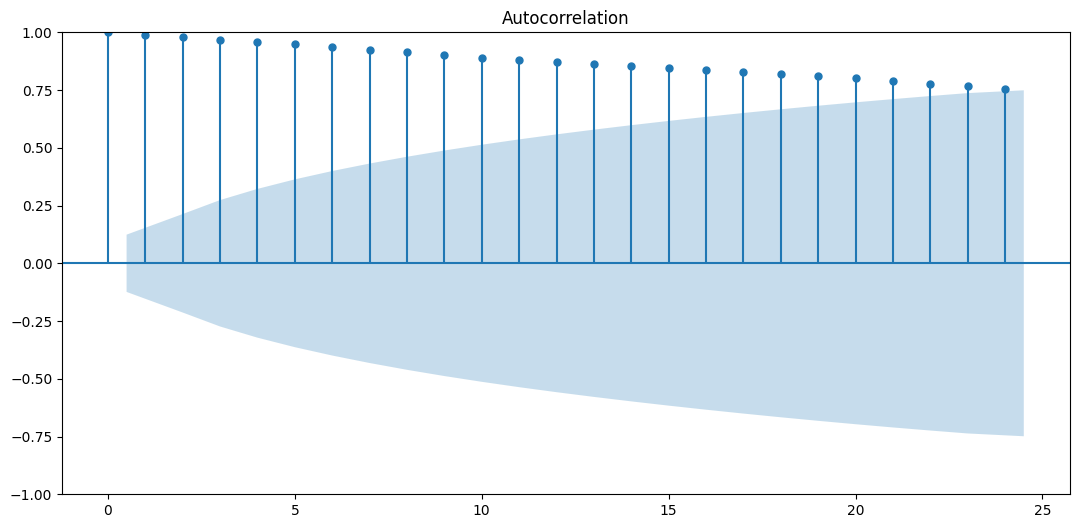

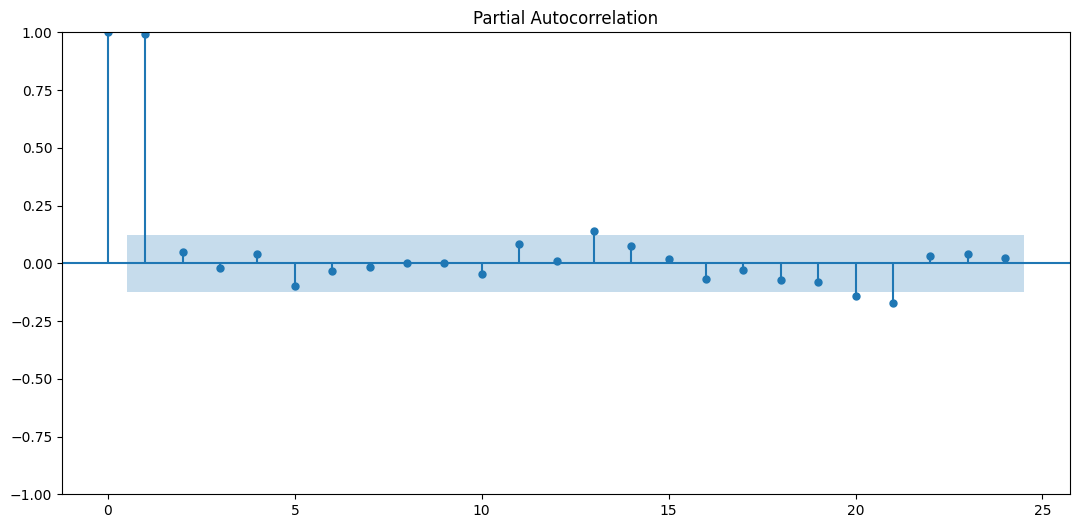

In [431]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# [[YOUR CODE]]
plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


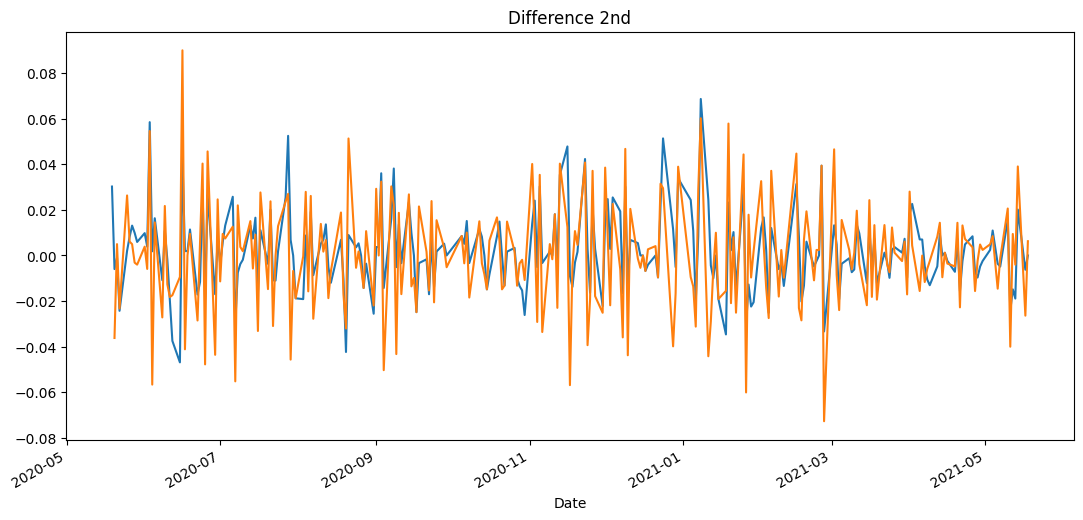

In [432]:
# 차분 안정성 확인 -> d 구하기
# [[YOUR CODE]]
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

#### STEP 6 : ARIMA 모델 훈련과 테스트

<hr>

- ARIMA 모델 빌드와 훈련

- 모델 테스트 및 플로팅

- 최종 예측 모델 정확도 측정(MAPE)


In [433]:
from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
# [[YOUR CODE]]

model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 583.361
Date:                Thu, 29 Sep 2022   AIC                          -1156.722
Time:                        23:43:27   BIC                          -1139.642
Sample:                             0   HQIC                         -1149.828
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.129     86.277      0.000      10.838      11.342
ar.L1          0.7739      1.821      0.425      0.671      -2.796       4.344
ar.L2          0.2191      1.811      0.121      0.9

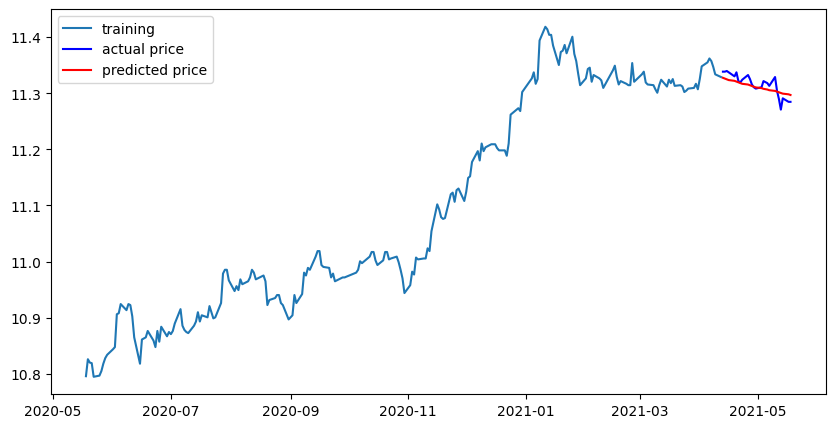

In [434]:
# Forecast : 결과 fc에 할당
# [[YOUR CODE]]
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
# [[YOUR CODE]]
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
# [[YOUR CODE]]
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [435]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = mean_squared_error(np.exp(test_data), np.exp(fc), squared=False)
print('RMSE: ', rmse)

##mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
mape = mean_absolute_percentage_error(np.exp(test_data), np.exp(fc))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1048973.6014239227
MAE:  843.757953150685
RMSE:  1024.1941229200268
MAPE: 1.03%


<hr>

#### STEP 7 : 다른 주식 종목 예측해 보기

 - 관심 종목을 골라 위 STEP 1~6의 과정을 반복해 보기

~~~
■ 여기서 잠깐, 지금까지의 과정을 정리하면 다음과 같다.
~~~

1. 시계열 데이터 준비：데이터 가져오고, 시계열을 생성한다

2. 각종 전처리 수행：결측치 처리, 로그변환 등을 수행한다.

3. 시계열 안정성 분석：정성적／정량적 그래프 분석 → ADF Test → 시계열 분해 → Residual 안정성 확인

4. 학습, 테스트 데이터셋 생성：학습, 테스트 데이터셋 분리

5. 적정 ARIMA 모수 찾기：ACF, PACF 시각화 → p, q 구하기. 차분 안정성 확인 → d 구하기

6. ARIMA 모델 훈련과 테스트：ARIMA 모델 빌드와 훈련, 모델 테스트 및 플로팅, 최종 예측 정확도 측정(MAPE)

~~~
이번에도 다루어야 할 분량이 제법 많을 것으로 생각되므로

아래에서 함수, 변수 등의 내용정리를 하고 진행을 해보도록 하겠다.
~~~~


<hr>

▼ 필요한 구성요소들의 정의

In [436]:
## 0. import 및 전역 변수들 정의
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')   ## 경고 메시지 무시

from statsmodels.tsa.stattools import adfuller                  ## ADF Test
from statsmodels.tsa.seasonal import seasonal_decompose         ## 시계열 분해

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf   ## ACF, PACF 플로팅
from statsmodels.tsa.arima.model import ARIMA                   ## ARIMA 모델

## scikit-Learn 
from sklearn.metrics import mean_squared_error                  ## MSE
from sklearn.metrics import mean_absolute_error                 ## MAE
from sklearn.metrics import mean_absolute_percentage_error      ## MAPE

import math
from matplotlib.pylab import rcParams

In [437]:
## 이동평균/이동표준편차 statistics 시각화 함수
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

    # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color="blue",label="Original")    
    mean = plt.plot(rolmean, color="red", label="Rolling Mean")
    std = plt.plot(rolstd, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)

In [438]:
def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출.
    dftest = adfuller(timeseries, autolag="AIC")  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력.
    print("Results of Dickey-Fuller Test :")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic","p-value","#Lags Used","Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [439]:
## ---------------------------------------------------------
##  ◆ 사용자 정의 함수 01 load_stock_data
## ---------------------------------------------------------

## 주식 종목 데이터 파일을 불러와서 시계열 데이터로 바꾸고
## 결측치 처리 및 보간, 시각화와 함께, 시계열 데이터를 반환하는 함수
## 이하의 함수 호출을 통해 6개의 과정중 2개의 과정을 진행 마친 셈이다.
## 반환값은 전처리와 로그변환을 마친 시계열 데이터.
def load_stock_data(fullpath, index_col="Date", time_series_col="Close"):
      
    ## CSV 파일 불러오기／시계열 생성
    print("─" * 64)
    dataframe = pd.read_csv(fullpath, index_col=index_col, parse_dates=True).fillna(0)
    print(fullpath, "불러오기.")
    print("─" * 64)
    print(" → CSV 파일 → 데이터프레임")
    print(type(dataframe))
    print("─" * 64)
    time_series = dataframe[time_series_col]
    print(" 데이터프레임 → 시계열생성")
    print(type(time_series))
    print("─" * 64)
    ## 시계열 그래프 출력
    ## ------------------------------------------------
    ## matlab 차트의 기본 크기를 13, 6으로 지정
    rcParams["figure.figsize"] = 13, 6
    ## 시계열 데이터 차트
    plt.plot(time_series)
    plt.show()
    print("─" * 64)
    ## 결측치 확인／로그 변환
    print(" → 결측치 확인：")
    print("    ", time_series[time_series.isna()])
    print("─" * 64)
    print(" → 결측치 보간 - interpolate(method=\"time\") ")
    time_series = time_series.interpolate(method="time")
    print("─" * 64)
    print(" → 결측치 확인：")
    print("    ", time_series[time_series.isna()])
    print("─" * 64)
    print(" → 로그 변환：")
    time_series_log = np.log(time_series)   ## 로그 변환
    ## 로그 변환 마친 그래프
    plt.plot(time_series_log)
    plt.show()
    print("─" * 64)

    return time_series_log


In [440]:
## ---------------------------------------------------------
##  ◆ 사용자 정의 함수 02 time_series_analysis
## ---------------------------------------------------------
## 시계열 안정성 분석：
# 정성적／정량적 그래프 분석 → 
# ADF Test 까지 수행. 분석을 위한 출력 함수이다.

def time_series_analysis(time_series, window=12):

    print("─" * 64)
    ## 정성적 그래프 분석
    print(" → 정성적 그래프 분석：")
    plot_rolling_statistics(time_series, window=window)
    
    print("─" * 64)

    ## 정량적 Augmented Dicky-Fuller Test
    print(" → 정량적 Augmented Dicky-Fuller Test：")
    augmented_dickey_fuller_test(time_series)
    
    print("─" * 64)


In [441]:
## ---------------------------------------------------------
##  ◆ 사용자 정의 함수 03 decompose_time_series
## ---------------------------------------------------------
## → 시계열 분해 → 

def decompose_time_series(time_series, period=30):
    
    print("─" * 64)
    print(" → Time Series Decomposition：")

    ## 시계열 분해 (Time Series Decomposition)
    ts_decom = seasonal_decompose(time_series, model="multiplicative", period=period)

    trend = ts_decom.trend         ## 추세(시간 추이에 따라 나타나는 평균값 변화 )
    seasonal = ts_decom.seasonal   ## 계절성(패턴이 파악되지 않은 주기적 변화)
    residual = ts_decom.resid      ## 원본(로그변환한) - 추세 - 계절성
    
    plt.rcParams["figure.figsize"] = (11,6)
    plt.subplot(411)
    plt.plot(time_series, label="Original")
    plt.legend(loc="best")
    plt.subplot(412)
    plt.plot(trend, label="Trend")
    plt.legend(loc="best")
    plt.subplot(413)
    plt.plot(seasonal,label="Seasonality")
    plt.legend(loc="best")
    plt.subplot(414)
    plt.plot(residual, label="Residuals")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    print("─" * 64)

    ## Residual NaN 값 제거
    print(" ↓ Residual")
    plt.plot(residual)
    plt.show()
    print("─" * 64)
    print(" → Residual Nan 값 제거 ")
    residual.dropna(inplace=True)
    print("─" * 64)
    print(" ↓ Residual")
    plt.plot(residual)
    plt.show()
    print("─" * 64)

    ## 안정성 확인
    print(" → ADF Test 통해 Residual Stationary 확인：")
    augmented_dickey_fuller_test(residual)
    print("─" * 64)
    
    print(" → return residual：")
    
    return residual
   

In [442]:
## ---------------------------------------------------------
##  ◆ 사용자 정의 함수 04 ts_train_test_split
## ---------------------------------------------------------
## → 학습, 테스트 데이터셋 분리
def ts_train_test_split(time_series_log, split_ratio=0.9):
    print("─" * 64)
    print(" → train, test 데이터셋 분리")
    train_data, test_data = \
        time_series_log[:int(len(time_series_log) * split_ratio)], \
        time_series_log[int(len(time_series_log) * split_ratio):]
    
    print("─" * 64)
    print(" → train, test 데이터셋 분리 확인：")
    plt.figure(figsize=(15,5))
    plt.grid(True)
    ## train_data 를 적용하면 그래프가 끊어져 보이므로
    ## ts_log 를 선택
    plt.plot(time_series_log, c="r", label="Training dataset")
    plt.plot(test_data, c="b", label="Test dataset")
    plt.legend()
    plt.show()
    print("─" * 64)
    print(" → return train_data, test_data")

    return train_data, test_data


In [443]:
## ---------------------------------------------------------
##  ◆ 사용자 정의 함수 05 arima_search
## ---------------------------------------------------------
## → 적정 ARIMA 모수 찾기
##      → ACF, PACF 그리기（p, q 값 찾기）
##      → 차분 안정성 확인（d 값 찾기）

def arima_search(time_series_log):
    print("─" * 64)
    print(" → ACF, PACF 출력（ARIMA ─ PACF:p, ACF:q）")
    plot_pacf(time_series_log)  ## PACF 그래프
    plot_acf(time_series_log)   ## ACF  그래프
    plt.show()

    print("─" * 64)
    print(" → 차분 안정성 확인（ARIMA ─ d）")
    print("─" * 64)
    print("◆ Original：")
    augmented_dickey_fuller_test(time_series_log)
    print("─" * 64)
    print("◆ １차：")
    diff_1 = time_series_log.diff(periods=1).iloc[1:]
    diff_1.plot(title="DIfference 1st")

    augmented_dickey_fuller_test(diff_1)

    print("─" * 64)
    print("◆ ２차：")
    diff_2 = diff_1.diff(periods=1).iloc[1:]
    diff_2.plot(title="DIfference 2nd")

    augmented_dickey_fuller_test(diff_2)

In [444]:
## ---------------------------------------------------------
##  ◆ 사용자 정의 함수 06 arima_apply
## ---------------------------------------------------------
## → ARIMA 모델 훈련과 테스트
##      → ARIMA 모델 빌드와 학습
##      → 모델 학습 결과 출력

def arima_apply(train_data, test_data, order_pack):
    print("─" * 64)
    print(" → Build and Train ARIMA Model")
    
    ## ARIMA Model Build
    model = ARIMA(endog=train_data, order=order_pack)

    ## ARIMA Model Learn
    fitted_m = model.fit()

    print("─" * 64)
    ## Result
    print(fitted_m.summary())

    return fitted_m 


In [445]:
## ---------------------------------------------------------
##  ◆ 사용자 정의 함수 07 
## ---------------------------------------------------------
## → ARIMA 모델 정확도 측정과 출력 수행
def fc_exp_result(test_data, fc):
    
    mse = mean_squared_error(np.exp(test_data), np.exp(fc))
    print('MSE: ', mse)

    mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
    print('MAE: ', mae)

    rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
    print('RMSE: ', rmse)

    ## mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
    ## sci-kit learn에서 제공하는 내장 함수 사용. 결과 동일함 확인.
    mape = mean_absolute_percentage_error(np.exp(test_data), np.exp(fc))
    print('MAPE: {:.2f}%'.format(mape*100))

In [446]:
## ---------------------------------------------------------
##  ◆ 사용자 정의 함수 07 arima_result
## ---------------------------------------------------------
##      → 모델 테스트 및 플로팅
##      → 최종 예측 모델 정확도 측정 (MAPE)

def arima_result(train_data, test_data, fitted_model):
    
    ## Forecast
    fc = fitted_model.forecast(len(test_data), alpha = 0.05)    ## 95％ conf
    fc = np.array(fc)

    ## Make as pandas series
    fc_series = pd.Series(fc, index=test_data.index)        ## 예측결과 시계열

    ## Plot
    plt.figure(figsize=(15,5), dpi=100)
    plt.plot(train_data, label='Training')
    plt.plot(test_data, c='b', label='Actual price')
    plt.plot(fc_series, c='r',label='Predicted price')
    plt.legend()
    plt.show()
    
    ##시계열 로그데이터 → 지수 변환하여 오차 계산
    fc_exp_result(test_data, fc)

<hr>

```
    ▣ 앞서 정리한 내용들을 전반적으로 재검증을 해보자.
       바로 이전에 수행했던 삼성전자 데이터를 활용 해 보겠다.
       LMS 상의 내용과 동일하게 나온다면 코드 구현이 제대로 이루어졌다고 볼 수 있다.
```

<hr>

────────────────────────────────────────────────────────────────
./stock_prediction/data/005930.KS.csv 불러오기.
────────────────────────────────────────────────────────────────
 → CSV 파일 → 데이터프레임
<class 'pandas.core.frame.DataFrame'>
────────────────────────────────────────────────────────────────
 데이터프레임 → 시계열생성
<class 'pandas.core.series.Series'>
────────────────────────────────────────────────────────────────


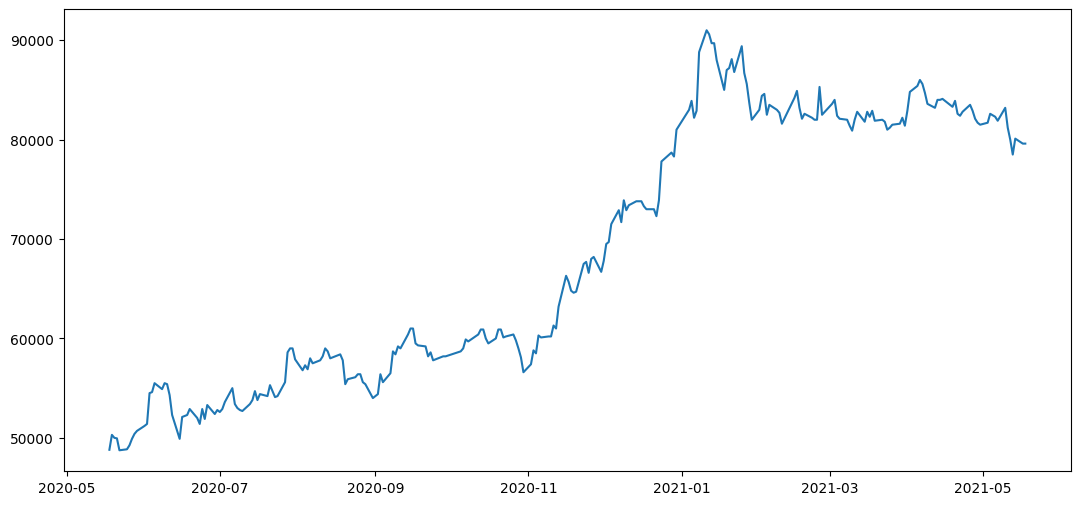

────────────────────────────────────────────────────────────────
 → 결측치 확인：
     Series([], Name: Close, dtype: float64)
────────────────────────────────────────────────────────────────
 → 결측치 보간 - interpolate(method="time") 
────────────────────────────────────────────────────────────────
 → 결측치 확인：
     Series([], Name: Close, dtype: float64)
────────────────────────────────────────────────────────────────
 → 로그 변환：


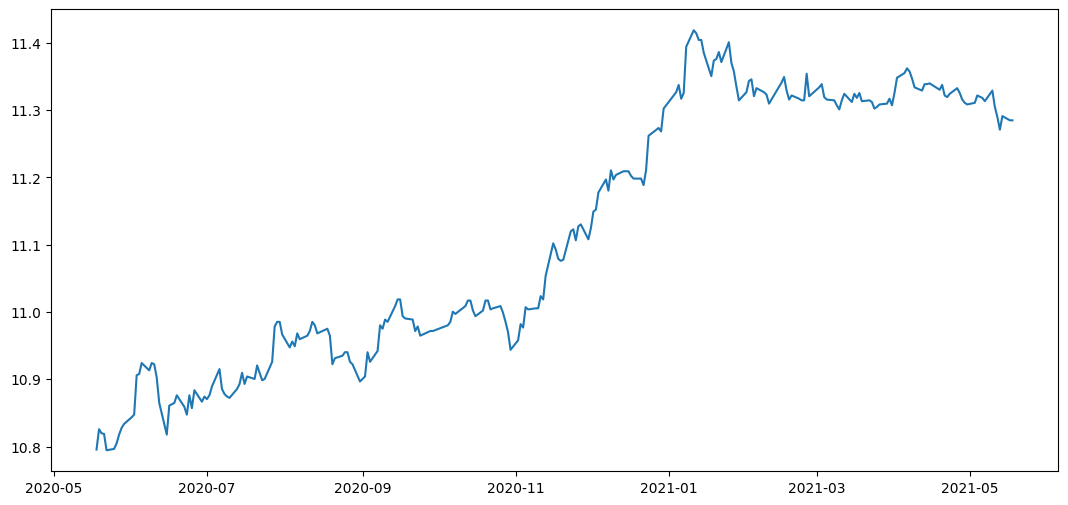

────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────
 → 정성적 그래프 분석：


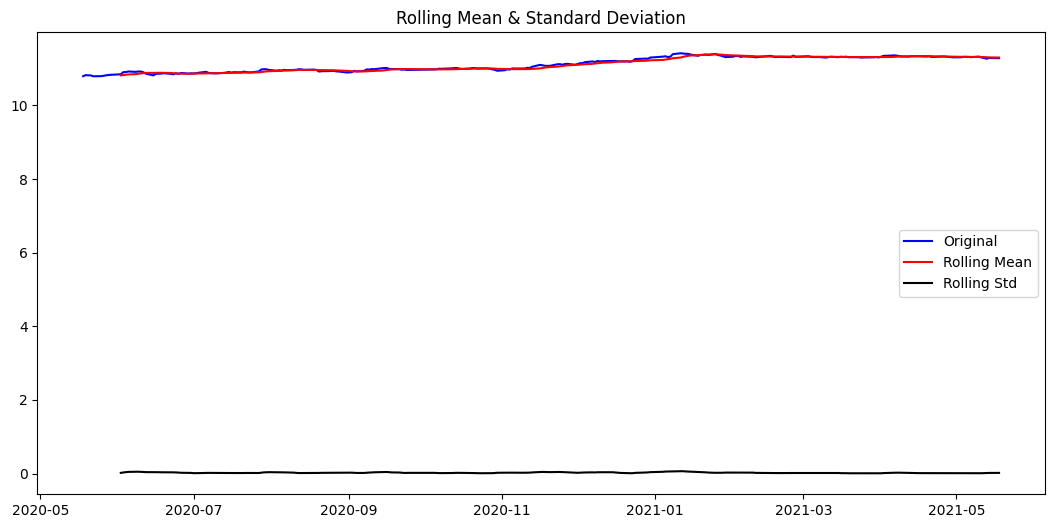

────────────────────────────────────────────────────────────────
 → 정량적 Augmented Dicky-Fuller Test：
Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────
 → Time Series Decomposition：


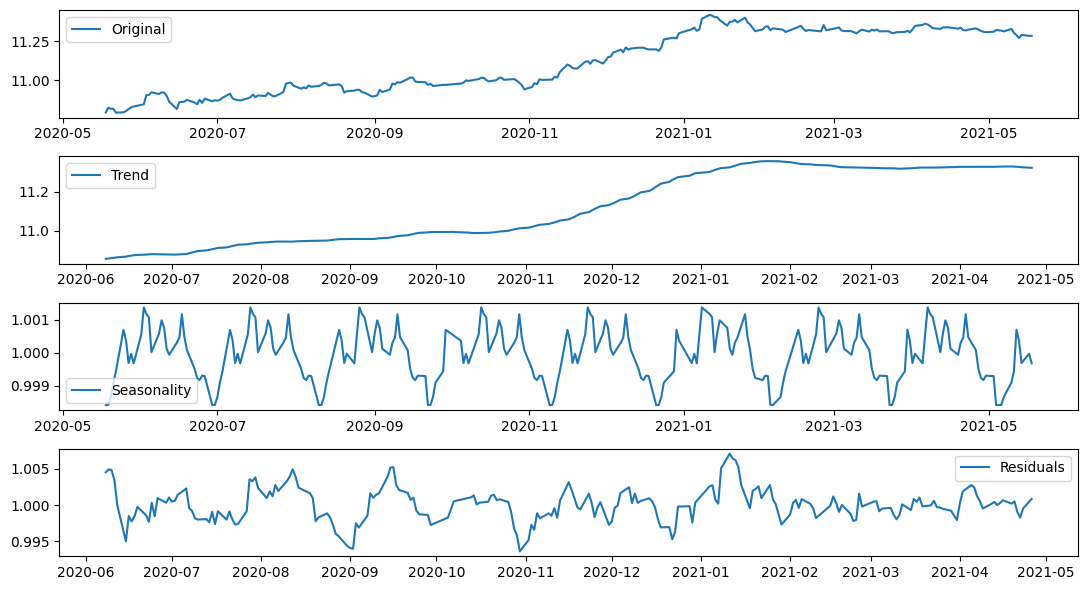

────────────────────────────────────────────────────────────────
 ↓ Residual


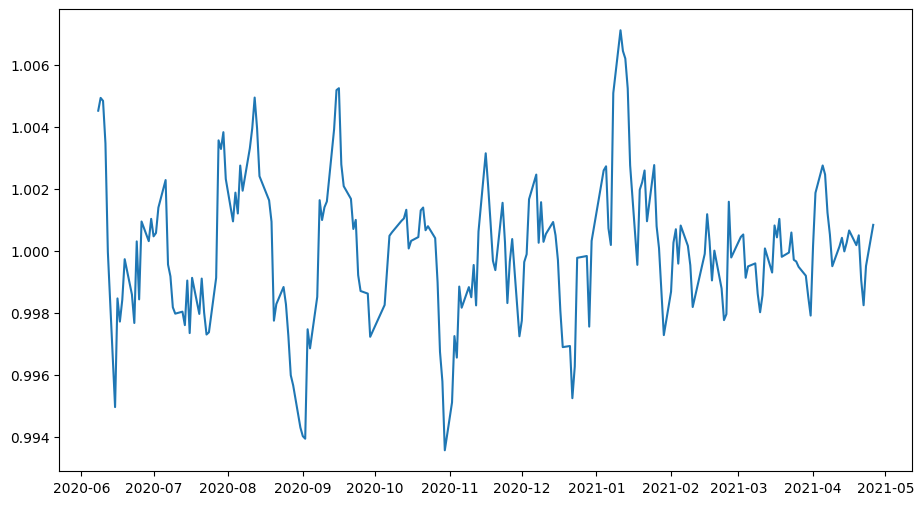

────────────────────────────────────────────────────────────────
 → Residual Nan 값 제거 
────────────────────────────────────────────────────────────────
 ↓ Residual


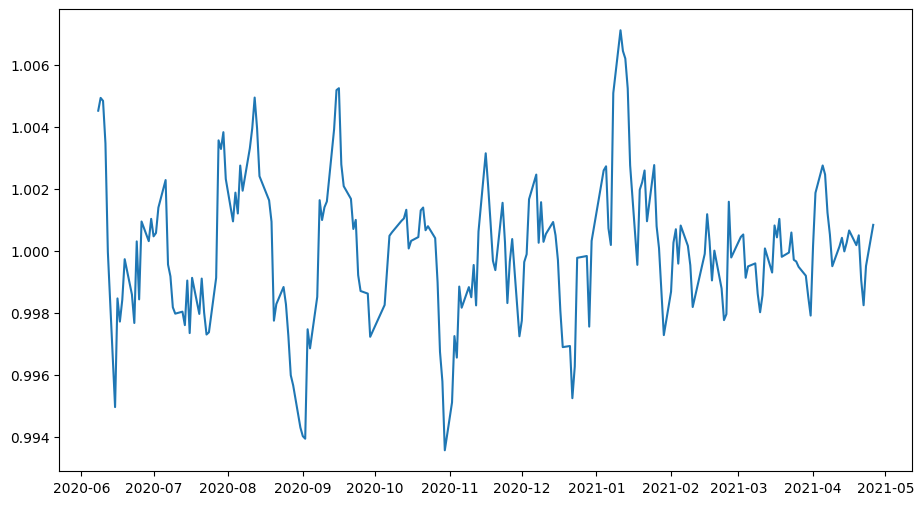

────────────────────────────────────────────────────────────────
 → ADF Test 통해 Residual Stationary 확인：
Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64
────────────────────────────────────────────────────────────────
 → return residual：
────────────────────────────────────────────────────────────────
 → train, test 데이터셋 분리
────────────────────────────────────────────────────────────────
 → train, test 데이터셋 분리 확인：


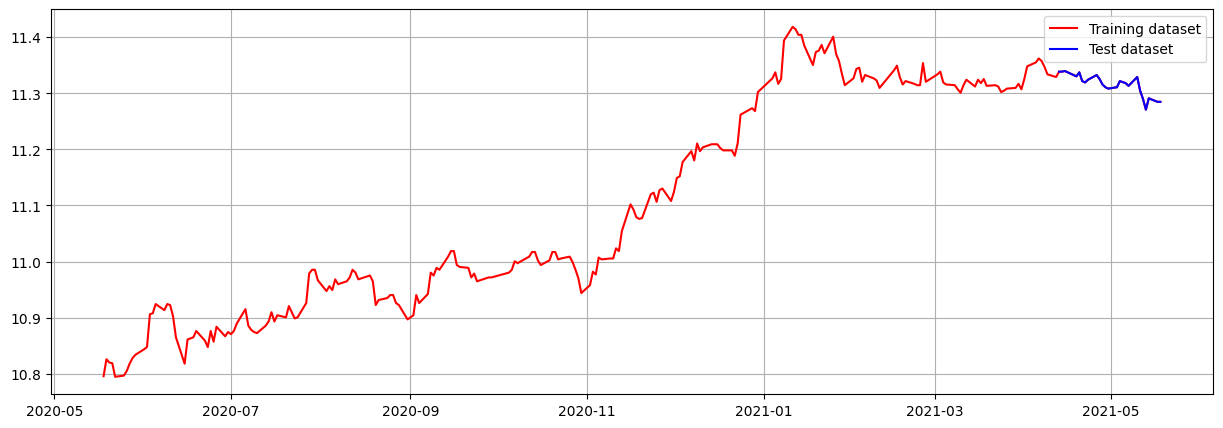

────────────────────────────────────────────────────────────────
 → return train_data, test_data
────────────────────────────────────────────────────────────────
 → ACF, PACF 출력（ARIMA ─ PACF:p, ACF:q）


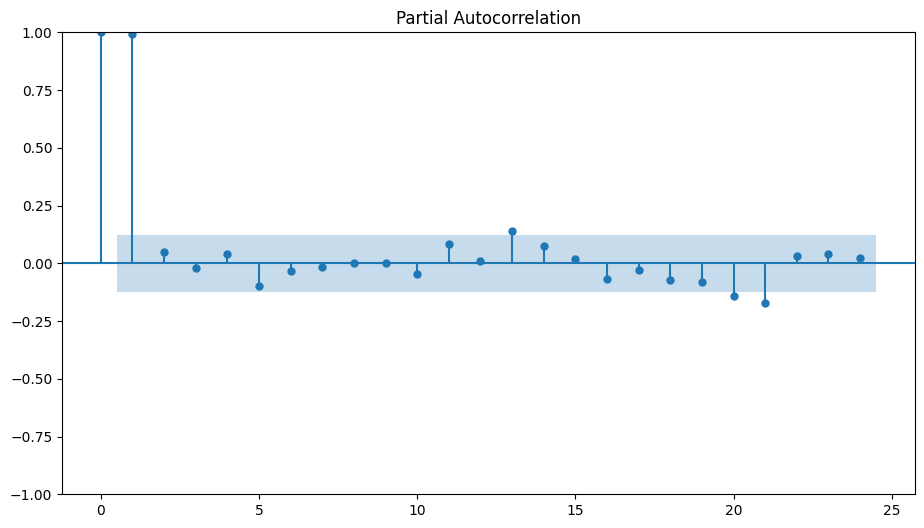

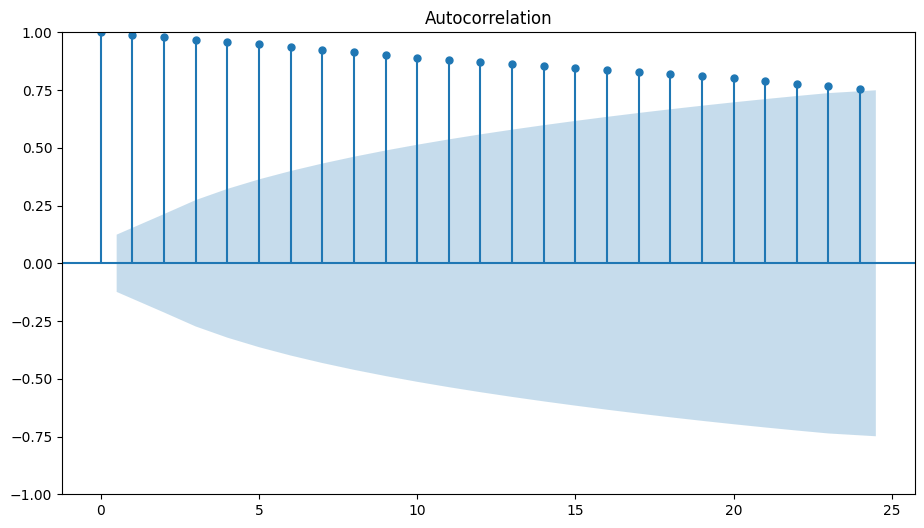

────────────────────────────────────────────────────────────────
 → 차분 안정성 확인（ARIMA ─ d）
────────────────────────────────────────────────────────────────
◆ Original：
Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
────────────────────────────────────────────────────────────────
◆ １차：
Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
────────────────────────────────────────────────────────────────
◆ ２차

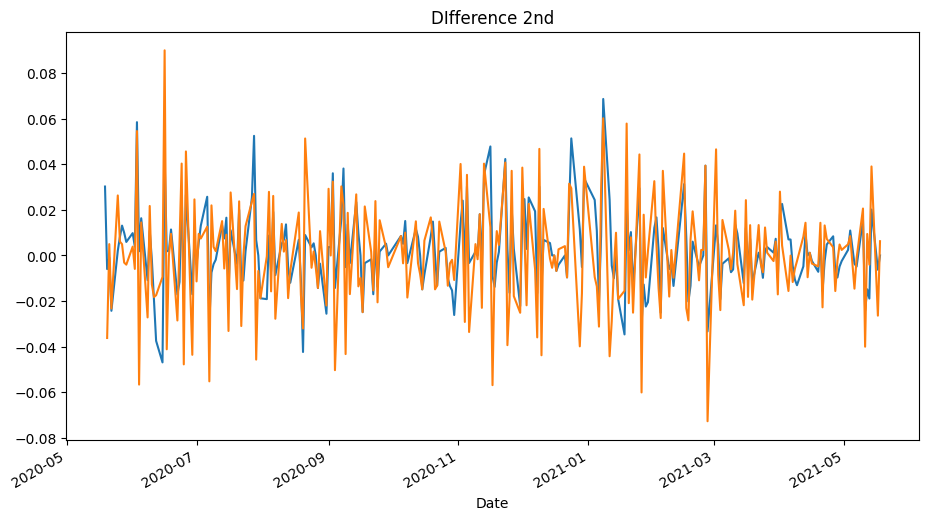

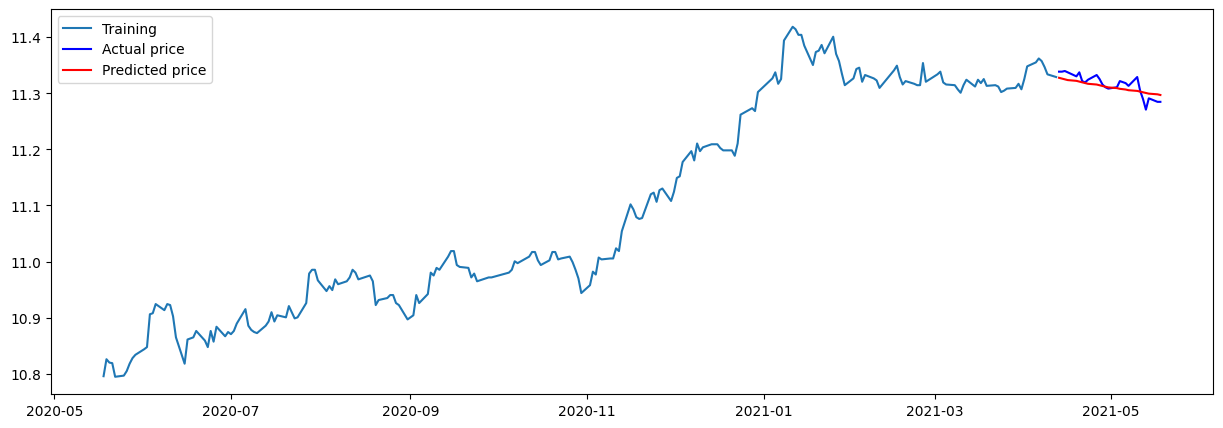

MSE:  1048973.6014239227
MAE:  843.757953150685
RMSE:  1024.1941229200268
MAPE: 1.03%


In [447]:
## ▶ 검증을 해서는 이전에 했던 삼성전자의 데이터를 가져와서 돌려보면 된다.
dataset_filepath = "./stock_prediction/data/005930.KS.csv"

## → 잘 돌아감. 출력 값이나 플로팅 전부 확인.

## ---------------------------------------------------------

## 1> 주식 종목 데이터를 불러와서 시계열 데이터 준비
ts_log = load_stock_data(dataset_filepath)

## ---------------------------------------------------------

## 2> 시계열 안정성 분석 - 시각화 확인
time_series_analysis (ts_log)

## ---------------------------------------------------------

## 3> 시계열 분해 / Residual 안정성 확인
ts_residual = decompose_time_series(ts_log)

## ---------------------------------------------------------

## 4> 학습, 테스트 데이터셋 생성
train_data, test_data = \
    ts_train_test_split(ts_log)

## ---------------------------------------------------------

## 5> 적정 ARIMA 모수 찾기
arima_search(ts_log)

## ---------------------------------------------------------

## 6> ARIMA 모델 적용
fitted_model = arima_apply(train_data, test_data, (2,0,1))
##  ▲ LMS 에서는 p d q 값을 이렇게 설정 하였다

## ---------------------------------------------------------

## 7> ARIMA 모델 결과 확인
arima_result(train_data, test_data, fitted_model)




<hr>



### 【프로젝트】 관심종목 주가예측

이하의 과정에 맞추어 진행을 해 보겠다.

<hr>

1. 시계열 데이터 준비：데이터 가져오고, 시계열을 생성한다

2. 각종 전처리 수행：결측치 처리, 로그변환 등을 수행한다.

3. 시계열 안정성 분석：정성적／정량적 그래프 분석 → ADF Test → 시계열 분해 → Residual 안정성 확인

4. 학습, 테스트 데이터셋 생성：학습, 테스트 데이터셋 분리

5. 적정 ARIMA 모수 찾기：ACF, PACF 시각화 → p, q 구하기. 차분 안정성 확인 → d 구하기

6. ARIMA 모델 훈련과 테스트：ARIMA 모델 빌드와 훈련, 모델 테스트 및 플로팅, 최종 예측 정확도 측정(MAPE)

<hr>

##### 1) Naver

네이버(NAVER)는 대한민국 최대 포털 사이트다.

검색 엔진 등 포털 서비스를 중심으로

블로그, 카페, 포스트 등의 커뮤니티 서비스를 비롯하여

뉴스, 스포츠, 연예, 쇼핑 등 다양한 콘텐츠 주제판을 제공하고 있다.

라인이라는 자체적 메신저, 지식백과 서비스를 통해

검색 결과에서도 믿을 만한 정보를 쉽게 찾아볼 수 있도록 하고 있으며,

국어, 영어, 중국어, 일본어를 비롯한 33개의 어학사전을 제공하여 전문 DB를 구축하고 있다.

세계 대부분 국가의 검색 시장을 정복한 구글이 정복하지 못하고

여전히 토종 포털이 1위인 얼마 안 되는 나라 중 하나가 대한민국이다.

그 외엔 야후! 재팬(네이버-소프트뱅크 합작)이 버티는 일본,

중국의 바이두, 러시아의 얀덱스 정도가 예외이다.

그만큼 네이버가 대한민국 시장에 미치는 영향은 크다.

첫번째 주식 종목은 네이버를 선택하여 예측을 시도 해 보겠다.

────────────────────────────────────────────────────────────────
./stock_prediction/data/035420.KS.Naver.csv 불러오기.
────────────────────────────────────────────────────────────────
 → CSV 파일 → 데이터프레임
<class 'pandas.core.frame.DataFrame'>
────────────────────────────────────────────────────────────────
 데이터프레임 → 시계열생성
<class 'pandas.core.series.Series'>
────────────────────────────────────────────────────────────────


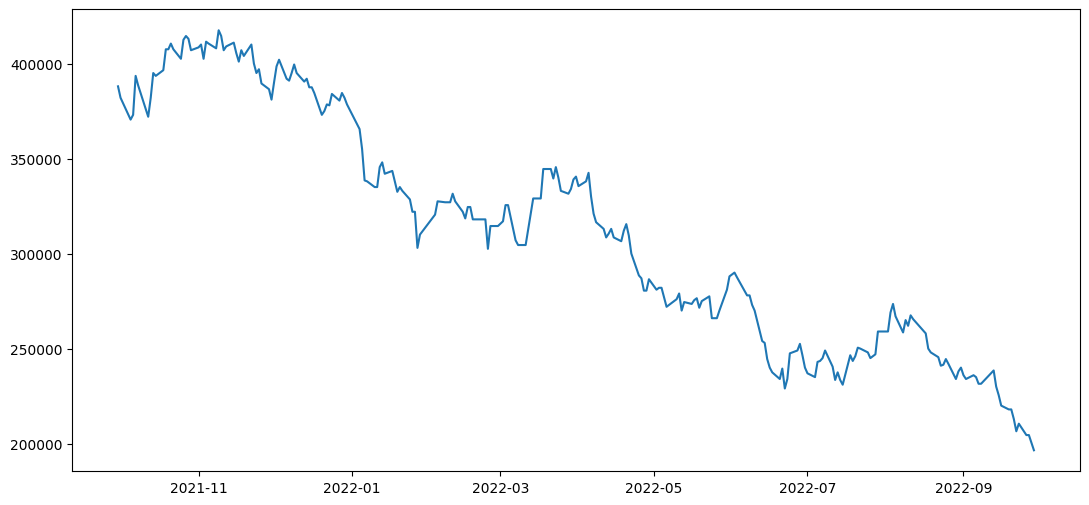

────────────────────────────────────────────────────────────────
 → 결측치 확인：
     Series([], Name: Close, dtype: float64)
────────────────────────────────────────────────────────────────
 → 결측치 보간 - interpolate(method="time") 
────────────────────────────────────────────────────────────────
 → 결측치 확인：
     Series([], Name: Close, dtype: float64)
────────────────────────────────────────────────────────────────
 → 로그 변환：


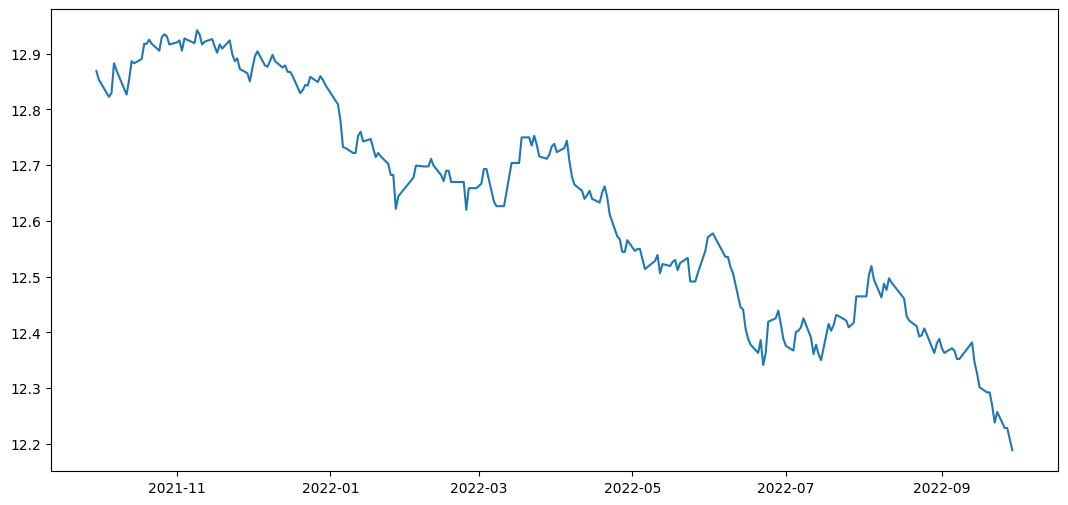

────────────────────────────────────────────────────────────────


In [564]:

## ▶ 데이터 경로 설정
dataset_filepath = "./stock_prediction/data/035420.KS.Naver.csv"

## ---------------------------------------------------------

## 1> 주식 종목 데이터를 불러와서 시계열 데이터 준비
ts_log = load_stock_data(dataset_filepath)

────────────────────────────────────────────────────────────────
 → 정성적 그래프 분석：


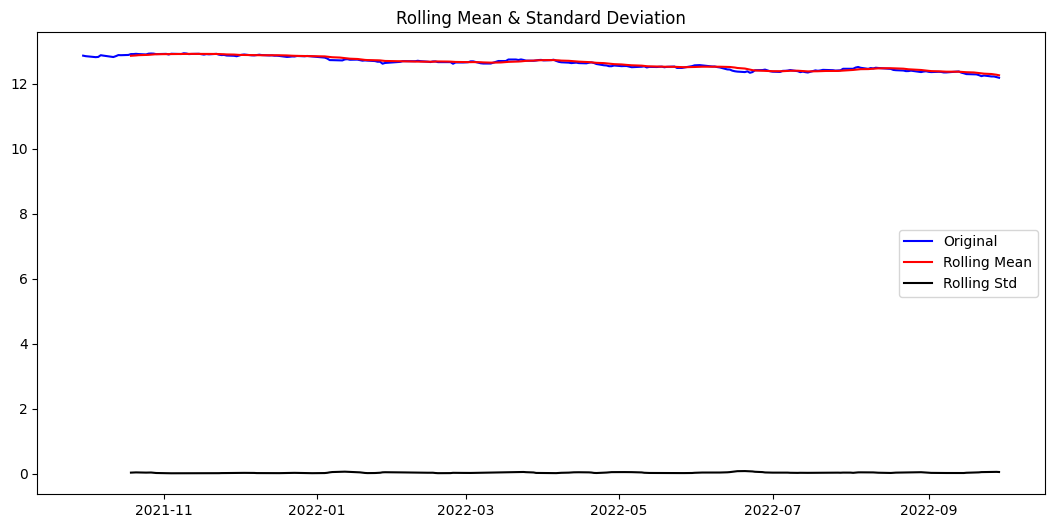

────────────────────────────────────────────────────────────────
 → 정량적 Augmented Dicky-Fuller Test：
Results of Dickey-Fuller Test:
Test Statistic                   0.238507
p-value                          0.974340
#Lags Used                       0.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64
────────────────────────────────────────────────────────────────


In [565]:
## 2> 시계열 안정성 분석 - 시각화 확인
time_series_analysis (ts_log)

────────────────────────────────────────────────────────────────
 → Time Series Decomposition：


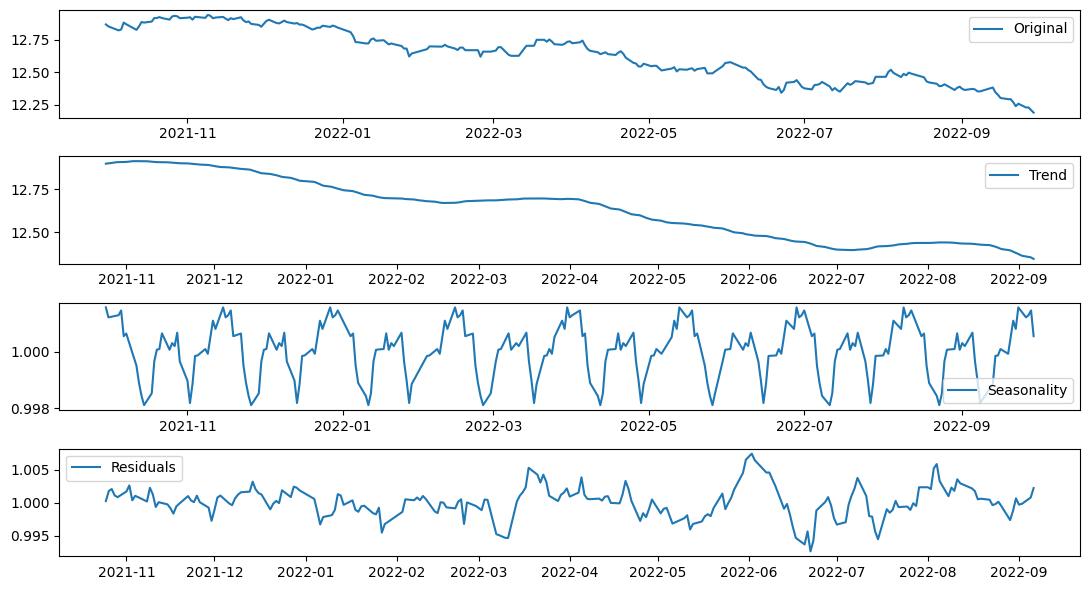

────────────────────────────────────────────────────────────────
 ↓ Residual


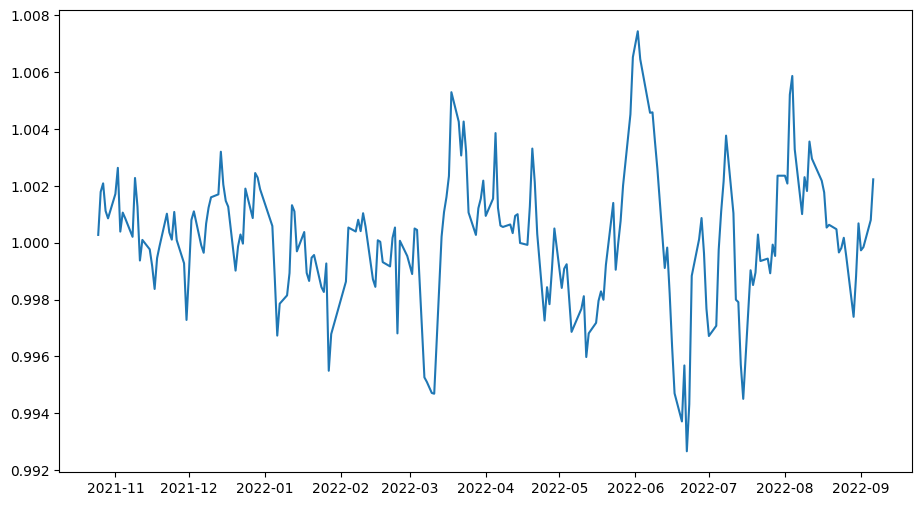

────────────────────────────────────────────────────────────────
 → Residual Nan 값 제거 
────────────────────────────────────────────────────────────────
 ↓ Residual


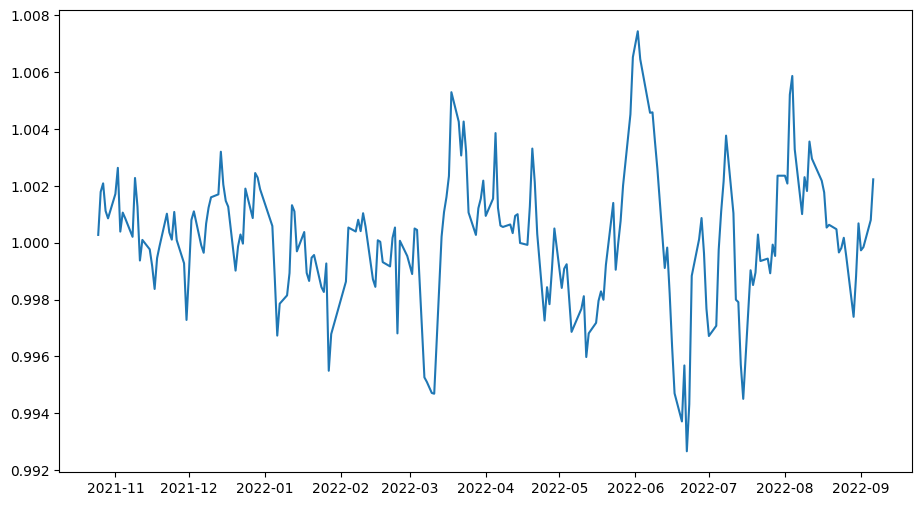

────────────────────────────────────────────────────────────────
 → ADF Test 통해 Residual Stationary 확인：
Results of Dickey-Fuller Test:
Test Statistic                  -5.631080
p-value                          0.000001
#Lags Used                       3.000000
Number of Observations Used    211.000000
Critical Value (1%)             -3.461727
Critical Value (5%)             -2.875337
Critical Value (10%)            -2.574124
dtype: float64
────────────────────────────────────────────────────────────────
 → return residual：


In [566]:
## 3> 시계열 분해 / Residual 안정성 확인
ts_residual = decompose_time_series(ts_log)

────────────────────────────────────────────────────────────────
 → train, test 데이터셋 분리
────────────────────────────────────────────────────────────────
 → train, test 데이터셋 분리 확인：


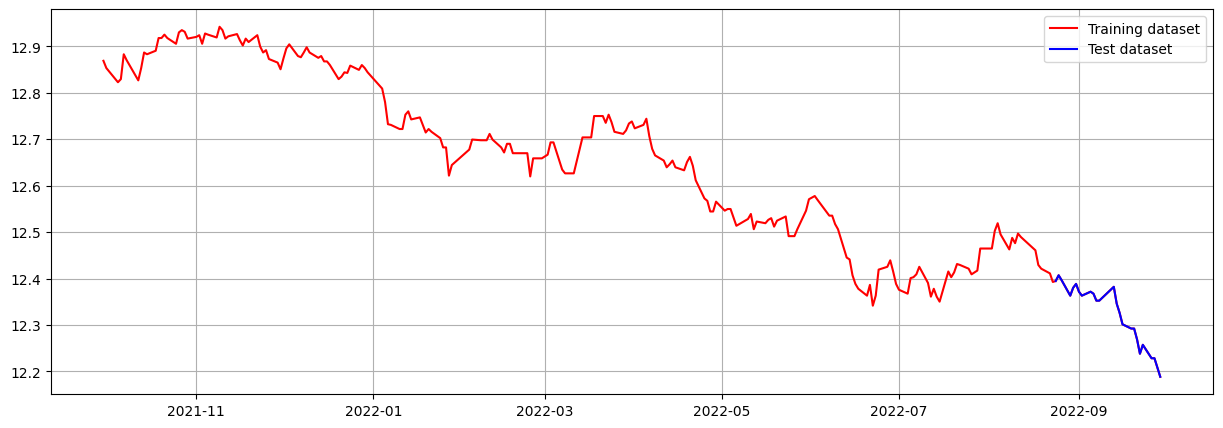

────────────────────────────────────────────────────────────────
 → return train_data, test_data


In [567]:
## 4> 학습, 테스트 데이터셋 생성
train_data, test_data = \
    ts_train_test_split(ts_log)

────────────────────────────────────────────────────────────────
 → ACF, PACF 출력（ARIMA ─ PACF:p, ACF:q）


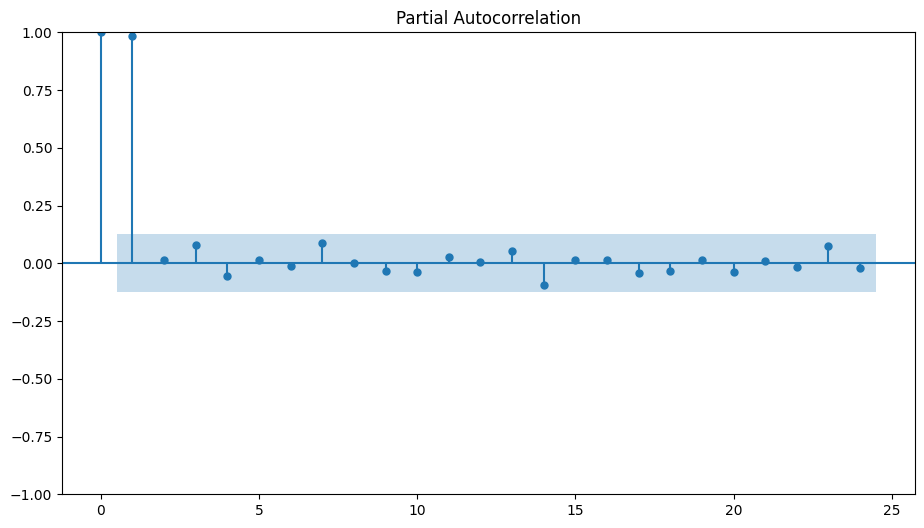

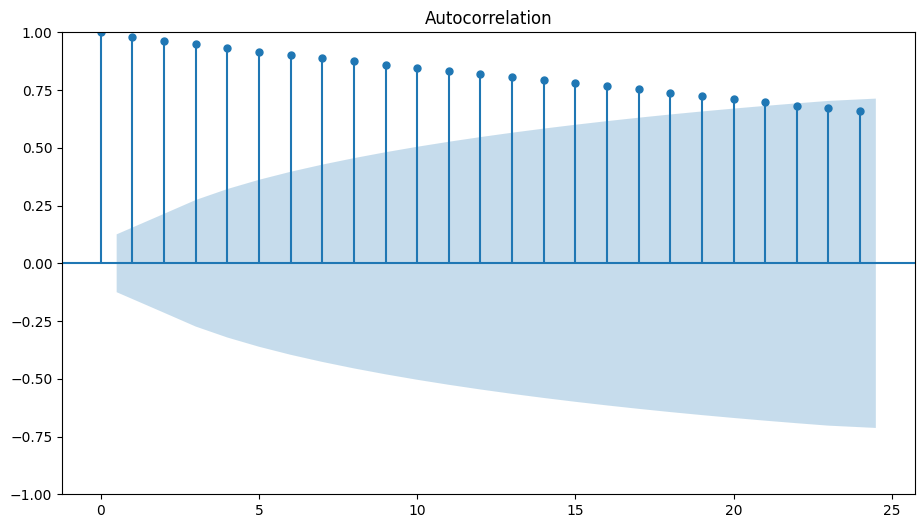

────────────────────────────────────────────────────────────────
 → 차분 안정성 확인（ARIMA ─ d）
────────────────────────────────────────────────────────────────
◆ Original：
Results of Dickey-Fuller Test:
Test Statistic                   0.238507
p-value                          0.974340
#Lags Used                       0.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64
────────────────────────────────────────────────────────────────
◆ １차：
Results of Dickey-Fuller Test:
Test Statistic                -7.997358e+00
p-value                        2.384397e-12
#Lags Used                     3.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64
────────────────────────────────────────────────────────────────
◆ ２차

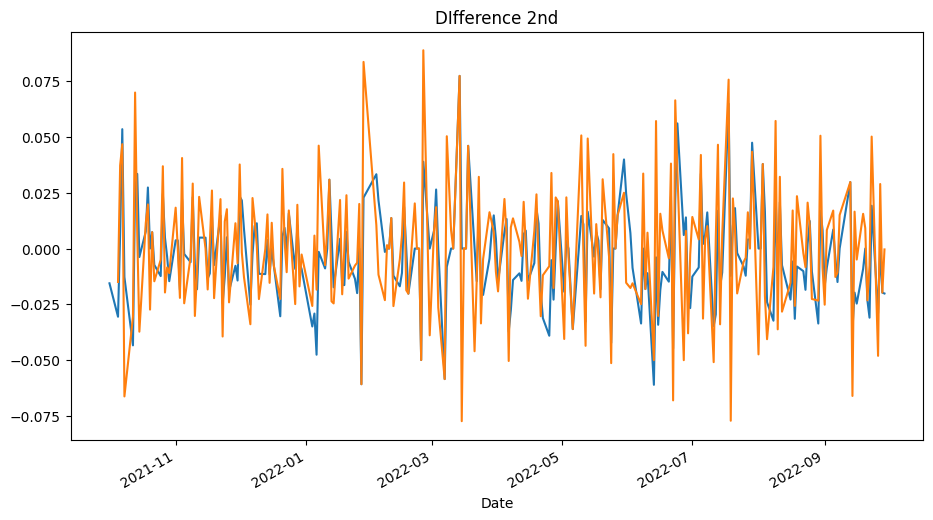

In [568]:
## 5> 적정 ARIMA 모수 찾기
arima_search(ts_log)

▼ ARIMA 모수 설정의 근거

  1. PACF, ACF 순서 출력（ARIMA ─ PACF:p, ACF:q） 
  
  2. 차분안정성 확인 d 를 위한 ADF Test 과정 출력

  3. 위의 내용에 더해, ARIMA 모델의 개념 단락에서, 좀 더 깊게 조사해서 정리한 결론.

부분에 따라, 아래와 같이 ARIMA 모수 적용을 했다.

- PACF  ： p = 1 이 적합
  + p 가 2 이상인 구간부터 PACF 값이 0 에 가까워짐.
  + PACF 에서는 전형적인 AR(p)의 자기회귀 모형의 특성을 보인다.
<br>&nbsp;<br>

- ACF   ： q = 0 마땅한 값이 없다. 
  + 위에서 전형적인 AR(p) 특성이 나타나므로, MA 고려하지 않는다면 q = 0 둘 수 있다.
  + q 를 굳이 설정하자면 21 정도로 설정 할 수 있겠지만,
  + 일반적으로 p + q < 2, p * q = 0 인 값을 사용하므로 여기서는 q 를 0 으로 두겠다.
<br>&nbsp;<br>

- ADF   ： d = 1 이 적합.
  + 최초  p-value = 0.974340
  + １차  p-value = 2.384397e-12
  + 1차 차분 결과로 충분. 1 로 두겠다.
<br>&nbsp;<br>

order = (p, d, q) 이므로.

모수로는 (1, 1, 0) 을 사용하도록 하겠다.

이 모수를 따라 ARIMA 모델 적용부터 다음 부분을 진행해보자.

In [571]:
## 6> ARIMA 모델 적용 (1,1,0)
fitted_model = arima_apply(train_data, test_data, (1,1,0))


────────────────────────────────────────────────────────────────
 → Build and Train ARIMA Model
────────────────────────────────────────────────────────────────
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  220
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 532.319
Date:                Fri, 30 Sep 2022   AIC                          -1060.638
Time:                        08:55:20   BIC                          -1053.860
Sample:                             0   HQIC                         -1057.900
                                - 220                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0537      0.079      0.683      

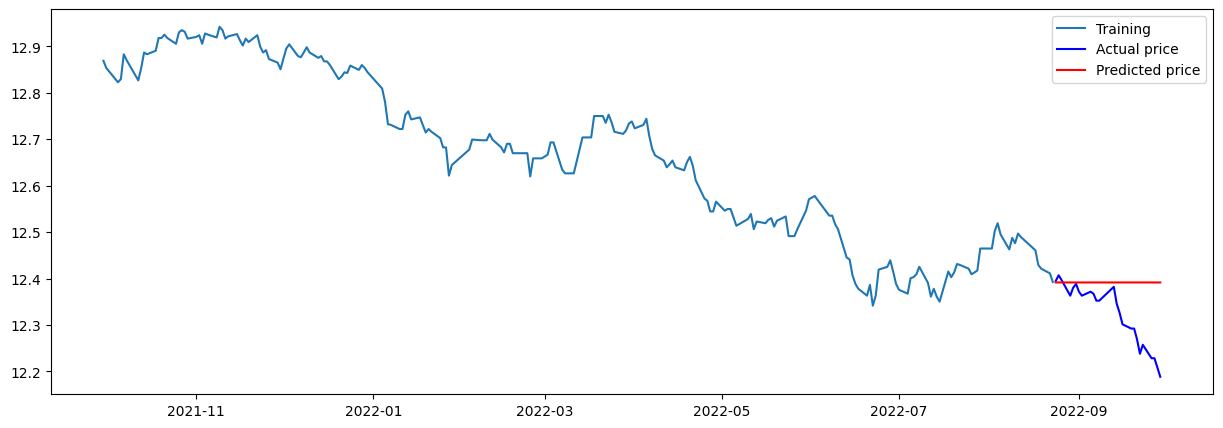

MSE:  449839469.36215734
MAE:  16007.423483616258
RMSE:  21209.419354667807
MAPE: 7.55%


In [572]:
## 7> ARIMA 모델 결과 확인
arima_result(train_data, test_data, fitted_model)

근데 그래프가 오른쪽으로 너무 일직선 인 것 같다.

일반적으로 하는 방법을 따르면 q 값에는 0 이라고 생각했는데,

q 값으로 적당하다고 생각했던 21 로 모델을 다시 돌려보겠다.

In [577]:
## 6> ARIMA 모델 적용 (1,1,21)
fitted_model = arima_apply(train_data, test_data, (1,1,21))

────────────────────────────────────────────────────────────────
 → Build and Train ARIMA Model
────────────────────────────────────────────────────────────────
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  220
Model:                ARIMA(1, 1, 21)   Log Likelihood                 545.256
Date:                Fri, 30 Sep 2022   AIC                          -1044.512
Time:                        08:59:05   BIC                           -966.563
Sample:                             0   HQIC                         -1013.031
                                - 220                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1644      0.575     -0.286      

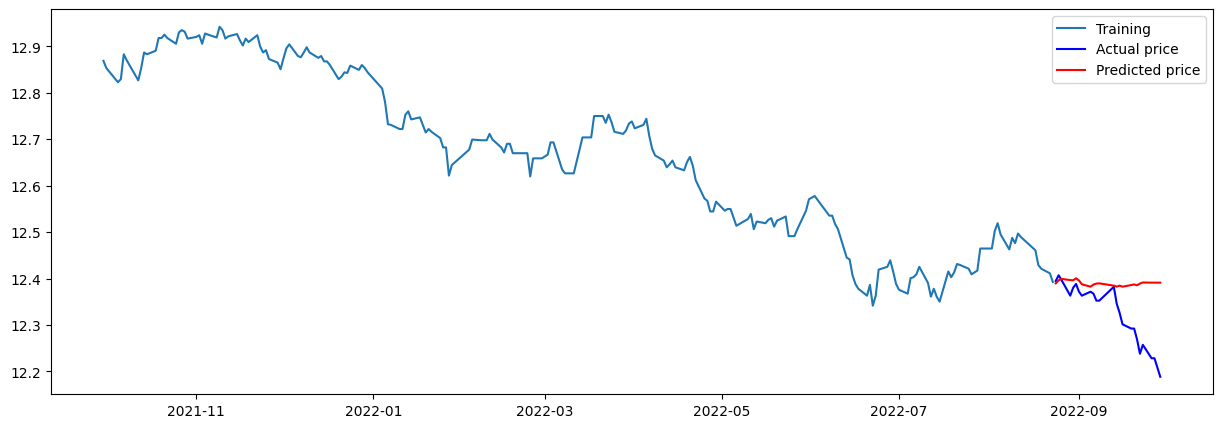

MSE:  431568062.4808639
MAE:  15468.58235166168
RMSE:  20774.216290413075
MAPE: 7.31%


In [578]:
## 7> ARIMA 모델 결과 확인
arima_result(train_data, test_data, fitted_model)

예측이 퍽 정확하다고 할 수 있진 않지만, 큰 기대는 안했었고

일단 그래프는 우측으로 직선은 아닌 모양이다.

로직상으로는 아무 문제가 없다는것은 충분히 확인했는데,

어째서 모수 설정을 일반적으로 하는 방법으로는 적당하지 않은 것인지,

원인을 찾고자 한다면 PACF 에서는 AR 특성을 쉽게 찾아 볼 수 있었으나

ACF 에서는 그렇지 못했기 때문일까？

예측이 잘 들어맞을 거라는건 당연히 기대도 안했지만,

일반적으로 사람이 그래프를 바라봤을때 그려지는 그래프와는

다소 차이를 보인다고 생각했다.

<hr>

##### 2) 하이트진로

하이트진로그룹 계열 주류업체로, 한국 최초로 소맥통합을 이루어내기도 했다.

하이트맥주가 진로를 인수했음에도 정작 합병할 때는 진로를 존속법인으로,

하이트맥주를 소멸법인으로 해서 하이트맥주가 역사 속으로 사라지게 되었다.

따라서 주식시장에서도 하이트맥주가 퇴출되고 진로가 하이트진로로 이름을 바꿔달게 되었다. 

그래서 일단은 진로의 연혁을 그대로 따라가나,

회사 홈페이지에서는 1924년 설립한 진천양조상회(진로)와

1933년 설립한 조선맥주(이후 크라운맥주-하이트)의 역사를 모두 기록하고 있다.

요즘같이 시장 상황이 안 좋은 시기에는 역으로 이 종목이 유리할까？

주식으로 힘들고 지치신 분들을 생각하다보니 떠올랐다.

────────────────────────────────────────────────────────────────
./stock_prediction/data/000087.KS_HITEJINRO.csv 불러오기.
────────────────────────────────────────────────────────────────
 → CSV 파일 → 데이터프레임
<class 'pandas.core.frame.DataFrame'>
────────────────────────────────────────────────────────────────
 데이터프레임 → 시계열생성
<class 'pandas.core.series.Series'>
────────────────────────────────────────────────────────────────


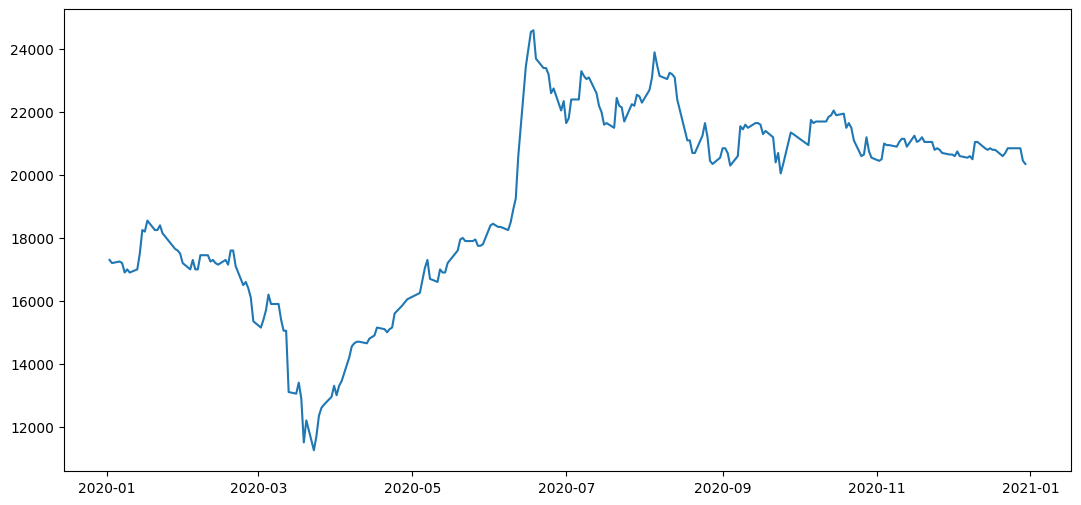

────────────────────────────────────────────────────────────────
 → 결측치 확인：
     Series([], Name: Close, dtype: float64)
────────────────────────────────────────────────────────────────
 → 결측치 보간 - interpolate(method="time") 
────────────────────────────────────────────────────────────────
 → 결측치 확인：
     Series([], Name: Close, dtype: float64)
────────────────────────────────────────────────────────────────
 → 로그 변환：


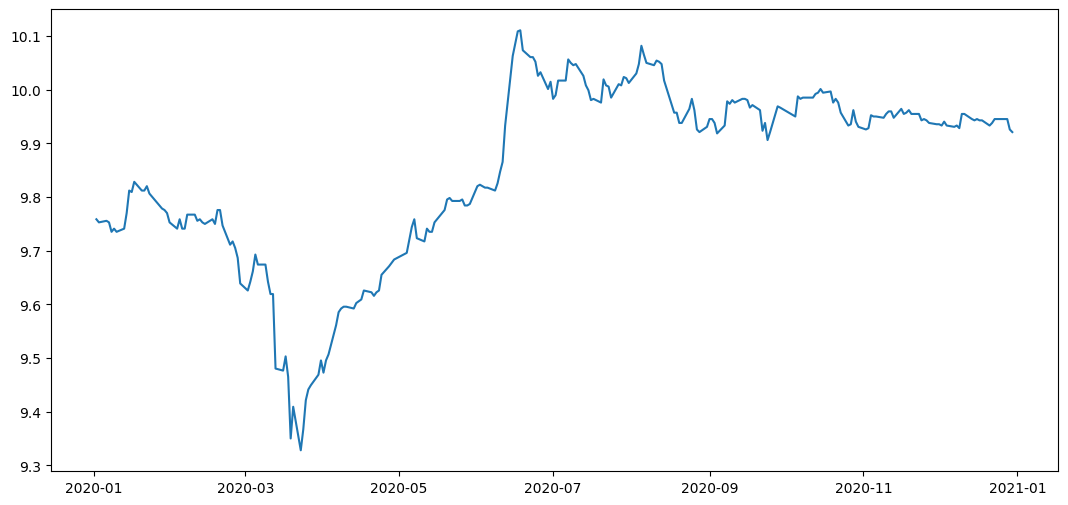

────────────────────────────────────────────────────────────────


In [579]:
dataset_filepath = "./stock_prediction/data/000087.KS_HITEJINRO.csv"

## 1> 주식 종목 데이터를 불러와서 시계열 데이터 준비
ts_log = load_stock_data(dataset_filepath)

────────────────────────────────────────────────────────────────
 → 정성적 그래프 분석：


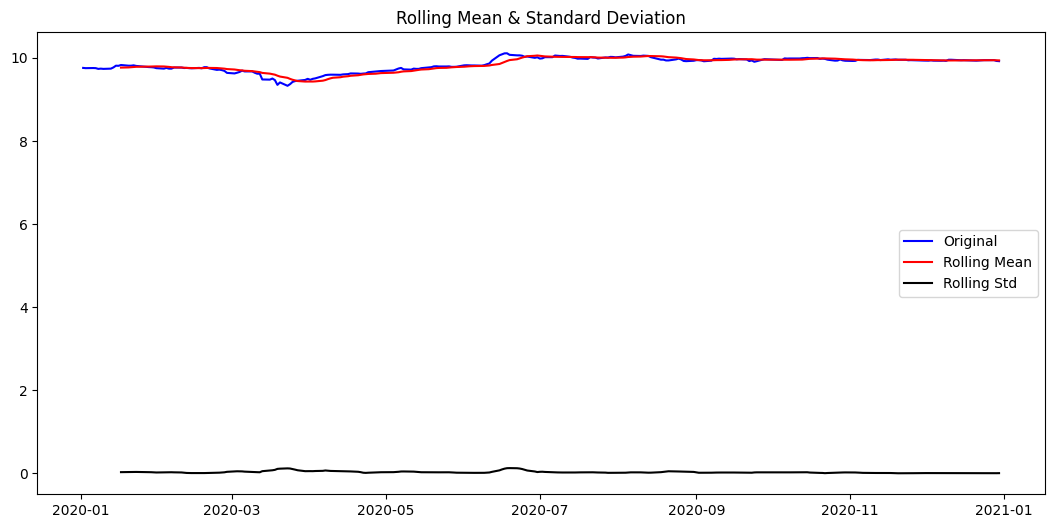

────────────────────────────────────────────────────────────────
 → 정량적 Augmented Dicky-Fuller Test：
Results of Dickey-Fuller Test:
Test Statistic                  -1.355846
p-value                          0.603252
#Lags Used                      14.000000
Number of Observations Used    233.000000
Critical Value (1%)             -3.458731
Critical Value (5%)             -2.874026
Critical Value (10%)            -2.573424
dtype: float64
────────────────────────────────────────────────────────────────


In [580]:
## 2> 시계열 안정성 분석 - 시각화 확인
time_series_analysis (ts_log)

────────────────────────────────────────────────────────────────
 → Time Series Decomposition：


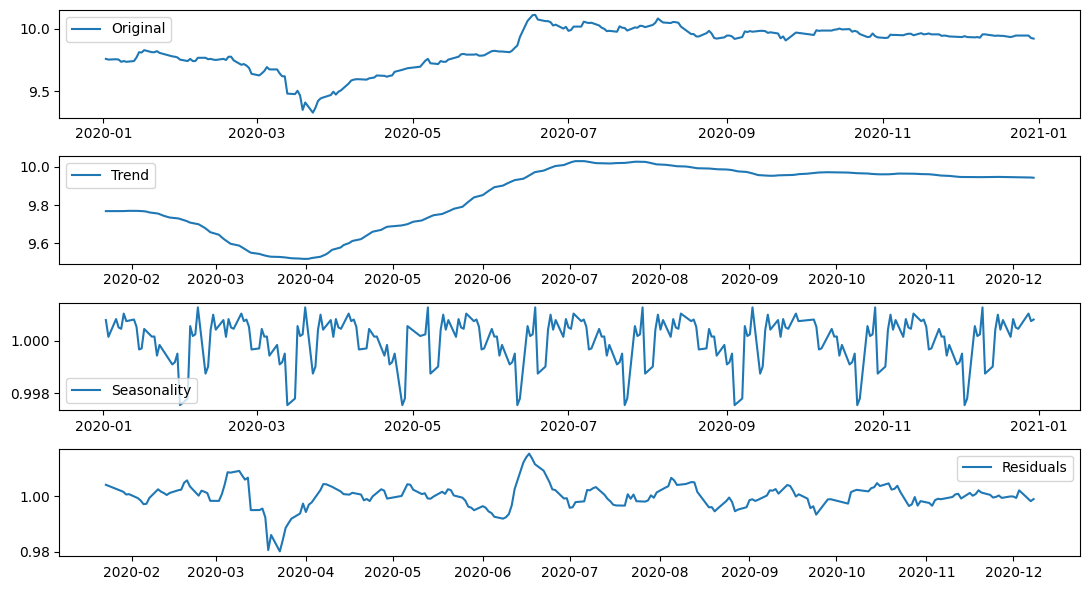

────────────────────────────────────────────────────────────────
 ↓ Residual


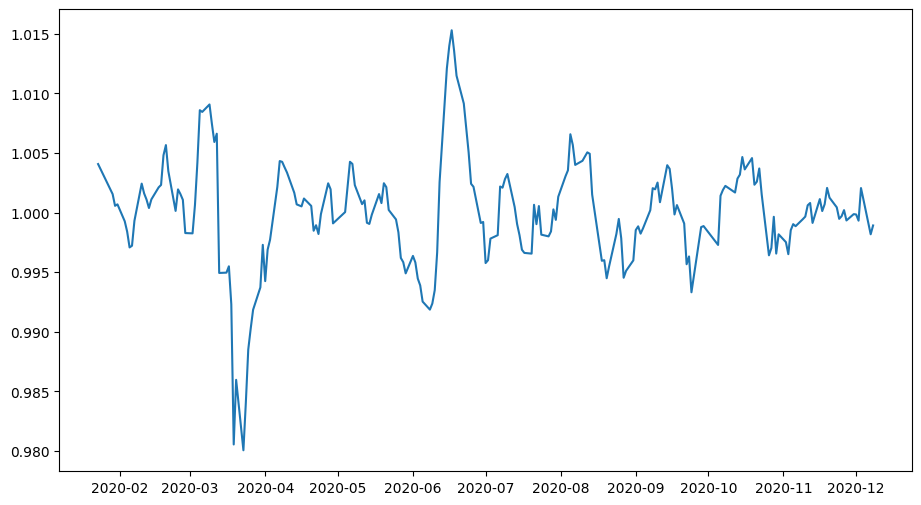

────────────────────────────────────────────────────────────────
 → Residual Nan 값 제거 
────────────────────────────────────────────────────────────────
 ↓ Residual


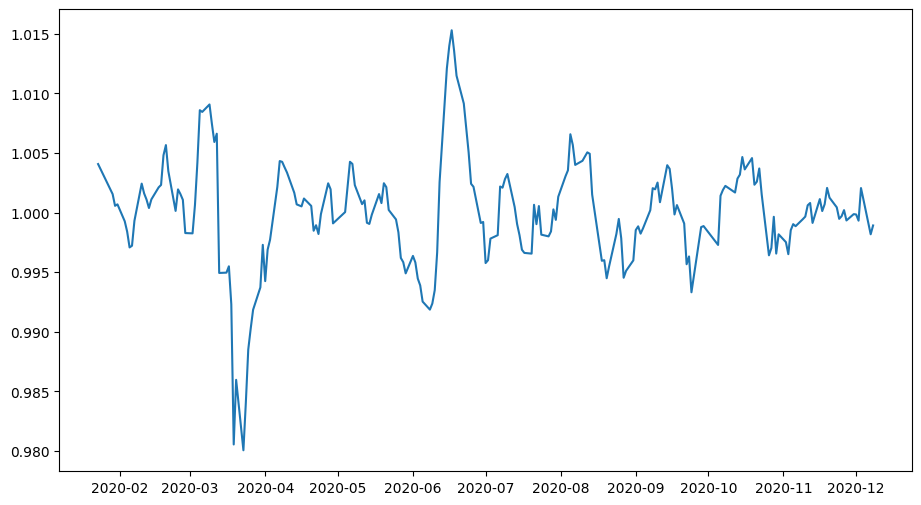

────────────────────────────────────────────────────────────────
 → ADF Test 통해 Residual Stationary 확인：
Results of Dickey-Fuller Test:
Test Statistic                  -5.211977
p-value                          0.000008
#Lags Used                       9.000000
Number of Observations Used    208.000000
Critical Value (1%)             -3.462186
Critical Value (5%)             -2.875538
Critical Value (10%)            -2.574231
dtype: float64
────────────────────────────────────────────────────────────────
 → return residual：


In [581]:
## 3> 시계열 분해 / Residual 안정성 확인
ts_residual = decompose_time_series(ts_log)

────────────────────────────────────────────────────────────────
 → train, test 데이터셋 분리
────────────────────────────────────────────────────────────────
 → train, test 데이터셋 분리 확인：


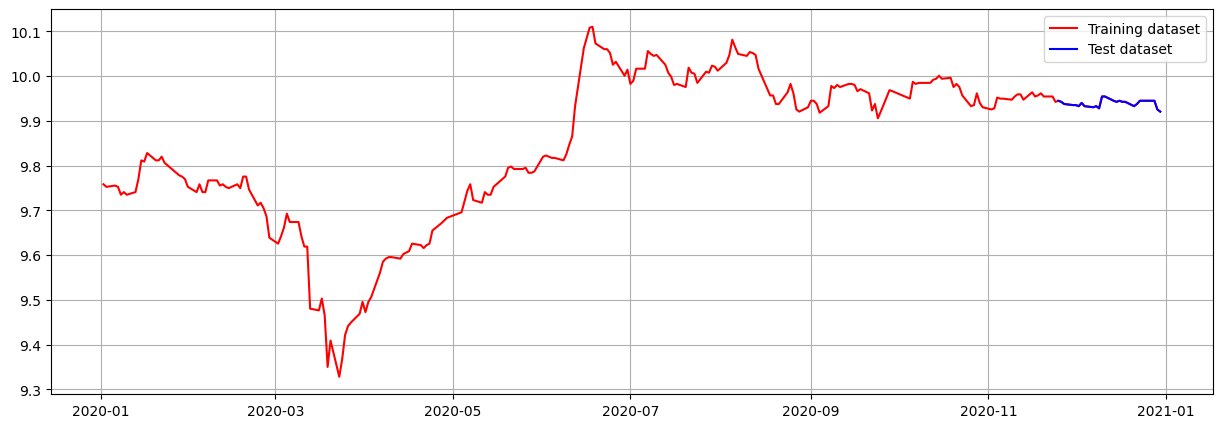

────────────────────────────────────────────────────────────────
 → return train_data, test_data


In [582]:
## 4> 학습, 테스트 데이터셋 생성
train_data, test_data = \
    ts_train_test_split(ts_log)

────────────────────────────────────────────────────────────────
 → ACF, PACF 출력（ARIMA ─ PACF:p, ACF:q）


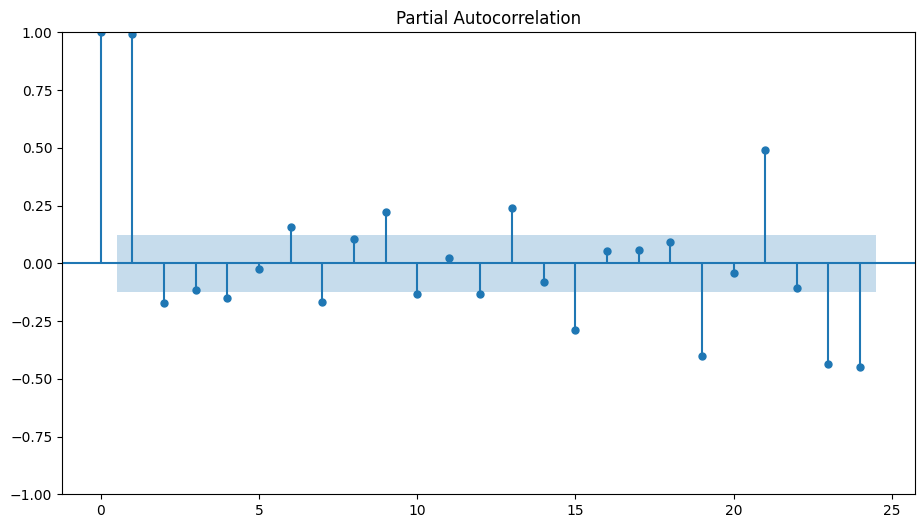

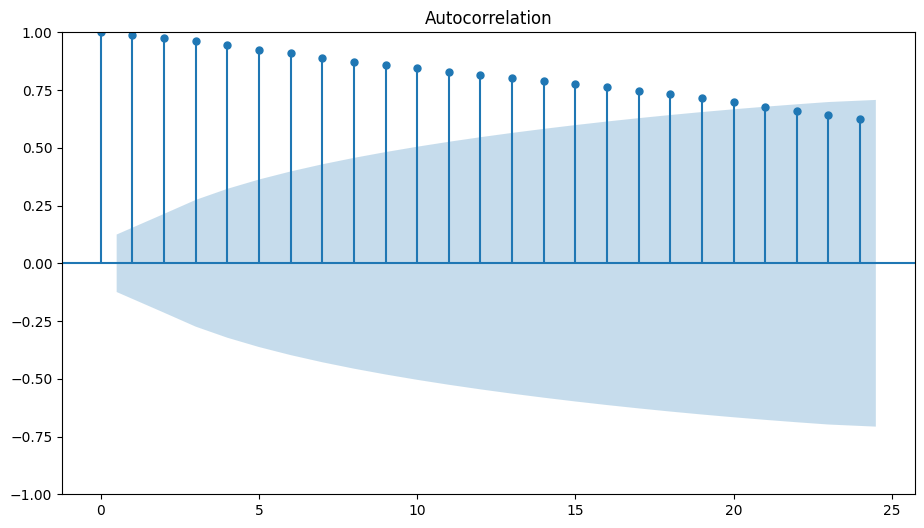

────────────────────────────────────────────────────────────────
 → 차분 안정성 확인（ARIMA ─ d）
────────────────────────────────────────────────────────────────
◆ Original：
Results of Dickey-Fuller Test:
Test Statistic                  -1.355846
p-value                          0.603252
#Lags Used                      14.000000
Number of Observations Used    233.000000
Critical Value (1%)             -3.458731
Critical Value (5%)             -2.874026
Critical Value (10%)            -2.573424
dtype: float64
────────────────────────────────────────────────────────────────
◆ １차：
Results of Dickey-Fuller Test:
Test Statistic                -1.405839e+01
p-value                        3.087776e-26
#Lags Used                     0.000000e+00
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64
────────────────────────────────────────────────────────────────
◆ ２차

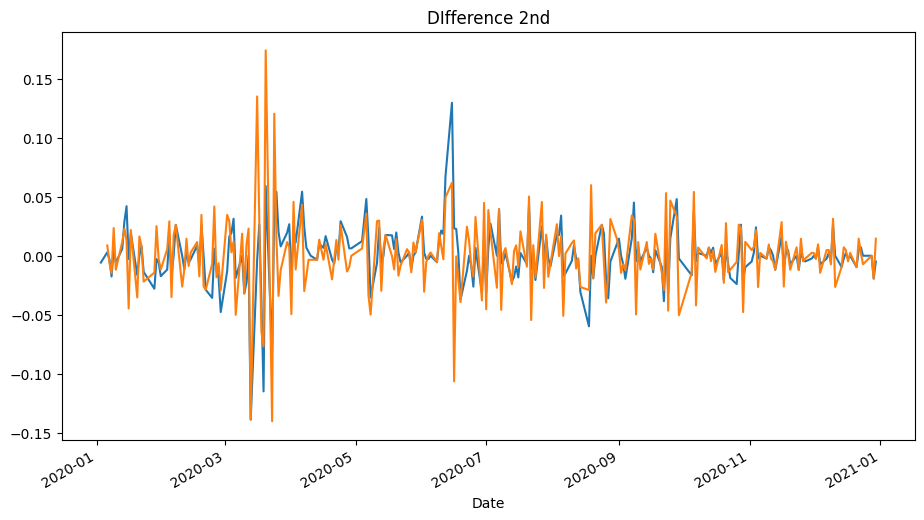

In [583]:
## 5> 적정 ARIMA 모수 찾기
arima_search(ts_log)

▼ ARIMA 모수 설정의 근거

  1. PACF, ACF 순서 출력（ARIMA ─ PACF:p, ACF:q） 
  
  2. 차분안정성 확인 d 를 위한 ADF Test 과정 출력

  3. 위의 내용에 더해, ARIMA 모델의 개념 단락에서, 좀 더 깊게 조사해서 정리한 결론.

부분에 따라, 아래와 같이 ARIMA 모수 적용을 했다.

- PACF  ： 마땅한 값을 정하기 어렵지만 일단은 p = 2 로 시작해 볼까 한다.
  + 시차가 뒤로 갈 수록 0 에 가까워 지고 있지 않다.
  + PACF 에서도 AR 특성을 찾아볼 수 있다고 말하기 어렵다.
<br>&nbsp;<br>

- ACF   ： q = 20 설정.
    + 일반적으로 p + q < 2, p * q = 0 인 값을 사용한다지만<br>
    여기서는 ARIMA 모델에 맡겨볼 수 밖에 없을 것 같다.
<br>&nbsp;<br>

- ADF   ： d = 1 이 적합.
  + 최초  p-value = 0.603252
  + １차  p-value = 3.087776e-26
  + 1차 차분 결과로 충분. 1 로 두겠다.
<br>&nbsp;<br>

order = (p, d, q) 이므로.

모수로는 (2, 1, 20) 을 사용하도록 하겠다.

In [584]:
## 6> ARIMA 모델 적용
fitted_model = arima_apply(train_data, test_data, (2,1,20))

────────────────────────────────────────────────────────────────
 → Build and Train ARIMA Model
────────────────────────────────────────────────────────────────
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  223
Model:                ARIMA(2, 1, 20)   Log Likelihood                 522.632
Date:                Fri, 30 Sep 2022   AIC                           -999.265
Time:                        09:11:30   BIC                           -921.003
Sample:                             0   HQIC                          -967.668
                                - 223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0089      0.466      0.019      

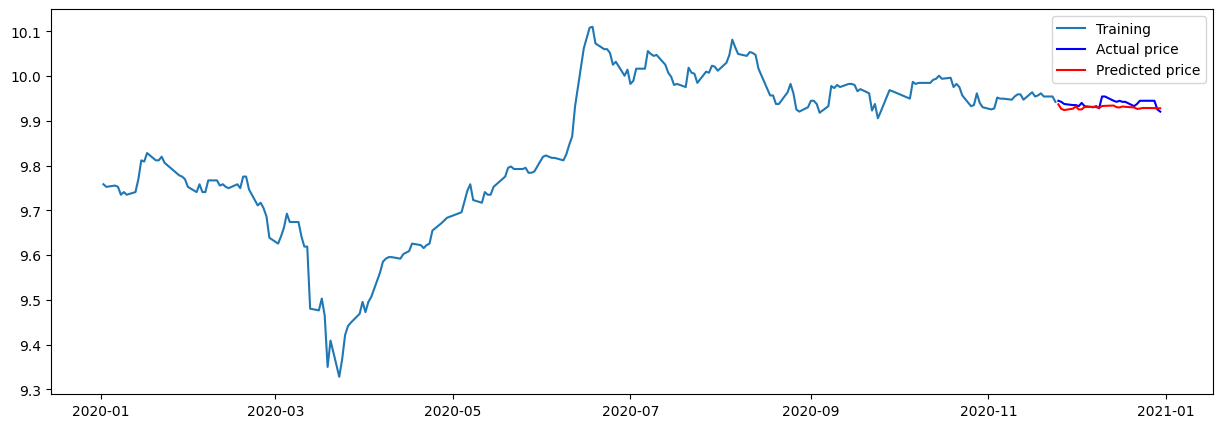

MSE:  59636.93759138055
MAE:  208.27265682145705
RMSE:  244.2067517317663
MAPE: 1.00%


In [585]:
## 7> ARIMA 모델 결과 확인
arima_result(train_data, test_data, fitted_model)

걱정 했던것과 다르게 예측결과가 그럭저럭 비슷해 보이는 것 같기도 하다.

생각보다 ARIMA 에 맡기는 것도 나쁘지 않은 것 같다.

무엇보다 그래프의 정상성이 사람이 한눈에 보기에도 좀 괜찮은가 싶다.

그와중에 끝부분이 비슷하게 갔던 탓일까, 예측은 그럭저럭 괜찮은 것 같다.

<hr>

#### 3) Netflix

미국의 멀티미디어 엔터테인먼트 OTT 기업.

'넷플릭스'라는 이름의 유래는 인터넷(net)+영화(flicks)이며,

본사는 미국 캘리포니아 실리콘밸리 남쪽의

로스가토스(Los Gatos)와 로스엔젤레스 헐리우드에 위치해있다.

현재 전망이 상당히 암울한 편이다.

구독자 수 성장이 점차 둔화되는 상황이라 러시아 서비스 중단이 아니더라도

과거처럼 드라마틱한 성장은 없을 것이란 전망이다.

넷플릭스 자체가 구독자 수의 폭풍성장을 바탕으로 투자금 확대로 성장했으나

아마존과 마찬가지로 결국 확장의 한계에 맞닥뜨렸다. 

────────────────────────────────────────────────────────────────
./stock_prediction/data/NFLX.csv 불러오기.
────────────────────────────────────────────────────────────────
 → CSV 파일 → 데이터프레임
<class 'pandas.core.frame.DataFrame'>
────────────────────────────────────────────────────────────────
 데이터프레임 → 시계열생성
<class 'pandas.core.series.Series'>
────────────────────────────────────────────────────────────────


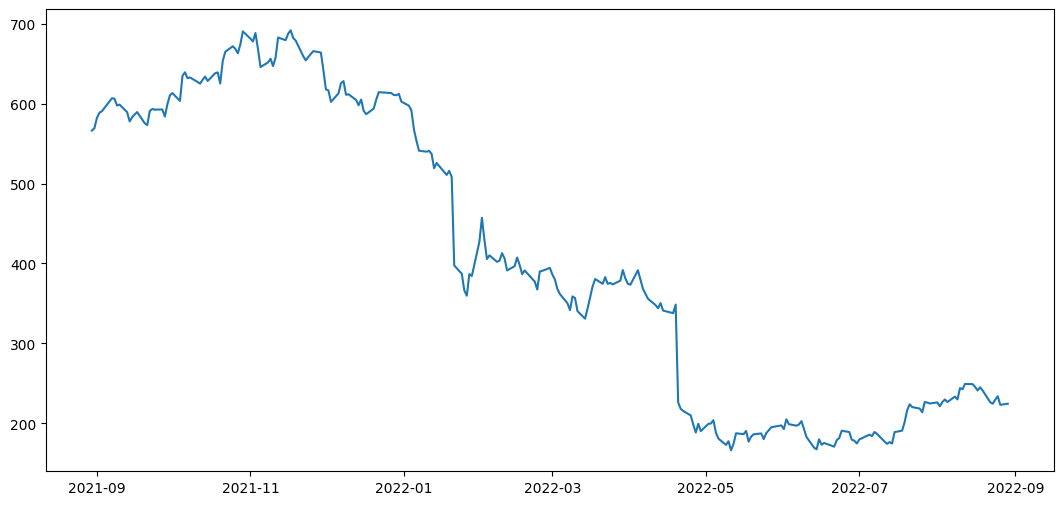

────────────────────────────────────────────────────────────────
 → 결측치 확인：
     Series([], Name: Close, dtype: float64)
────────────────────────────────────────────────────────────────
 → 결측치 보간 - interpolate(method="time") 
────────────────────────────────────────────────────────────────
 → 결측치 확인：
     Series([], Name: Close, dtype: float64)
────────────────────────────────────────────────────────────────
 → 로그 변환：


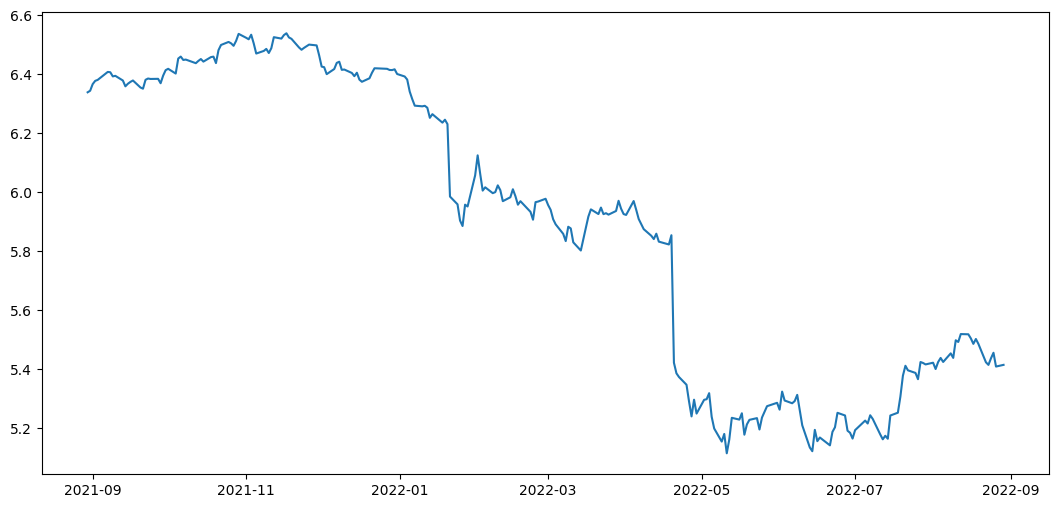

────────────────────────────────────────────────────────────────


In [596]:

## ▶ 데이터 경로 설정
dataset_filepath = "./stock_prediction/data/NFLX.csv"

## ---------------------------------------------------------

## 1> 주식 종목 데이터를 불러와서 시계열 데이터 준비
ts_log = load_stock_data(dataset_filepath)

────────────────────────────────────────────────────────────────
 → 정성적 그래프 분석：


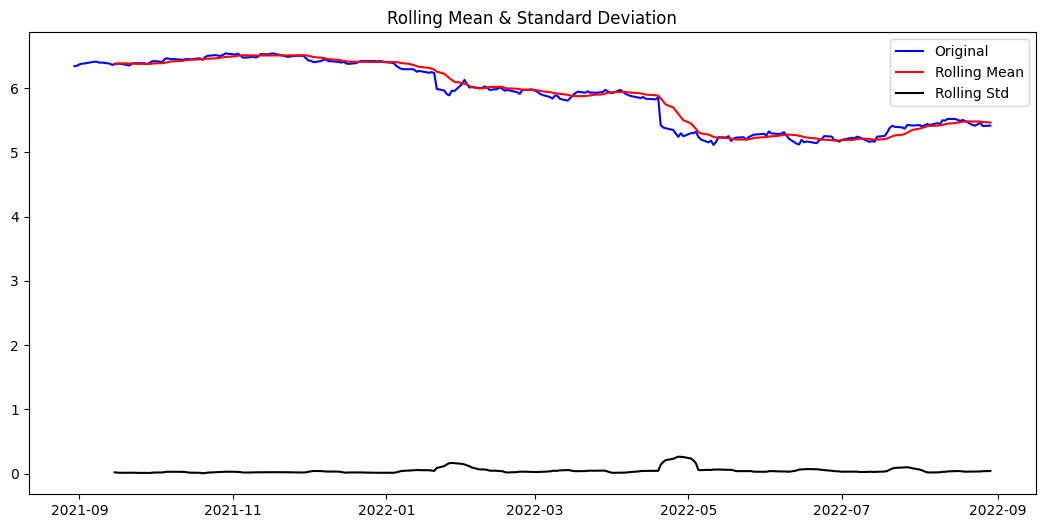

────────────────────────────────────────────────────────────────
 → 정량적 Augmented Dicky-Fuller Test：
Results of Dickey-Fuller Test:
Test Statistic                  -0.631370
p-value                          0.863735
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
────────────────────────────────────────────────────────────────


In [597]:
## 2> 시계열 안정성 분석 - 시각화 확인
time_series_analysis (ts_log)

────────────────────────────────────────────────────────────────
 → Time Series Decomposition：


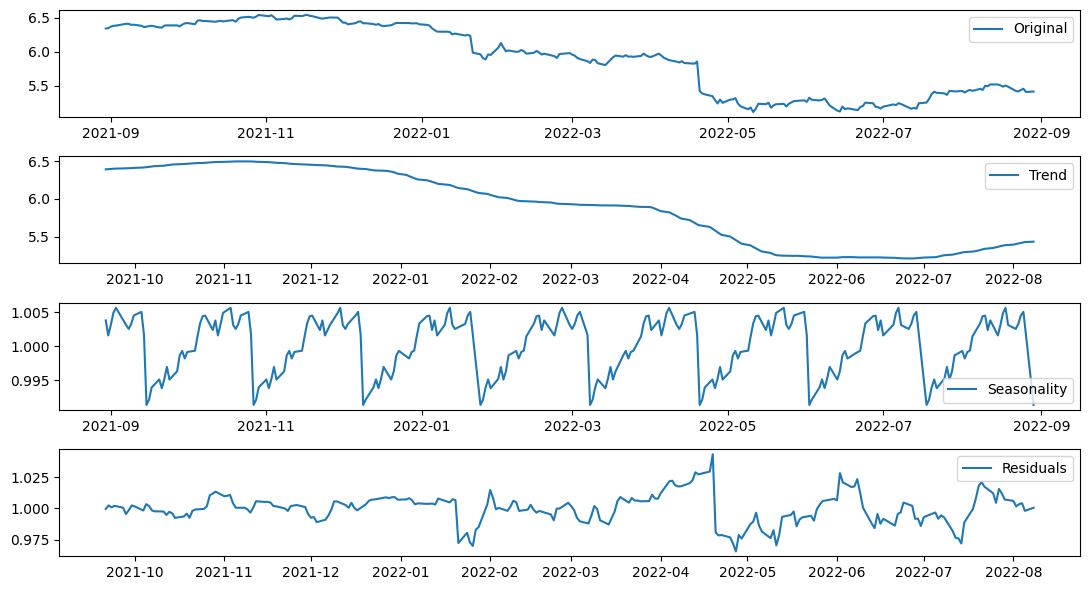

────────────────────────────────────────────────────────────────
 ↓ Residual


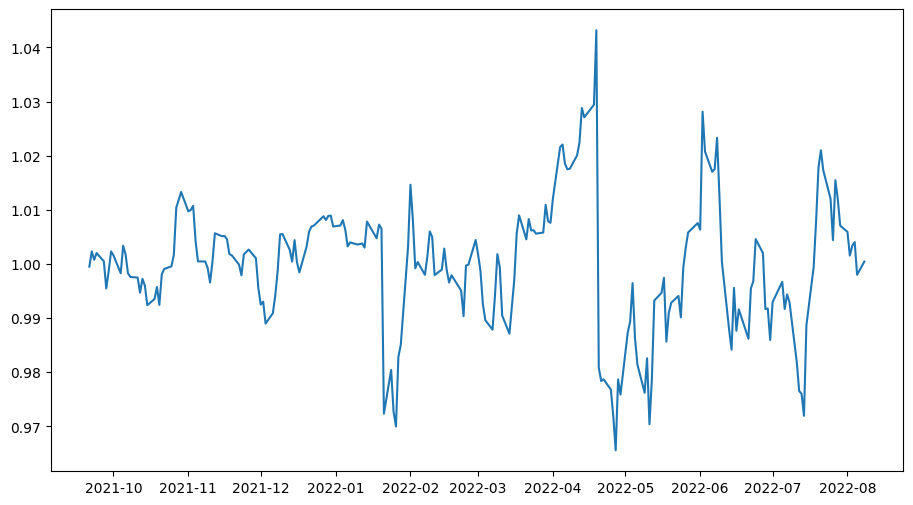

────────────────────────────────────────────────────────────────
 → Residual Nan 값 제거 
────────────────────────────────────────────────────────────────
 ↓ Residual


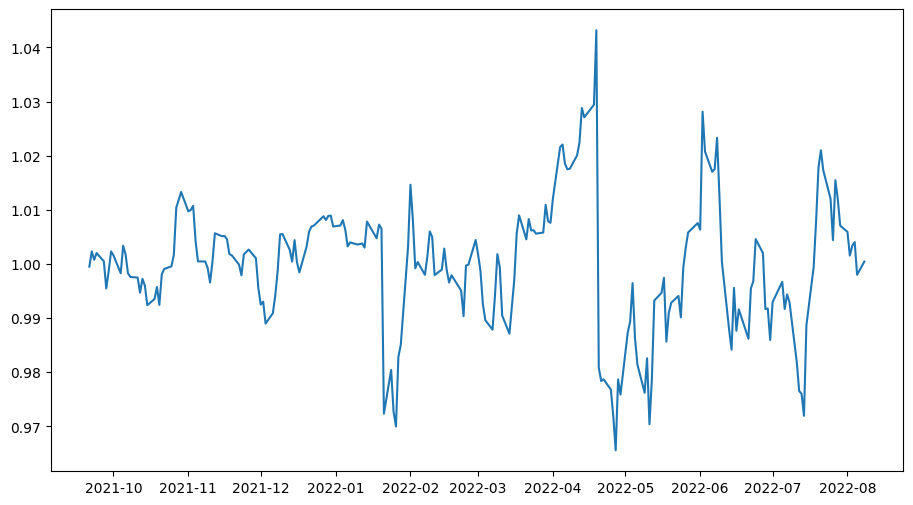

────────────────────────────────────────────────────────────────
 → ADF Test 통해 Residual Stationary 확인：
Results of Dickey-Fuller Test:
Test Statistic                  -4.762202
p-value                          0.000064
#Lags Used                       0.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64
────────────────────────────────────────────────────────────────
 → return residual：


In [598]:
## 3> 시계열 분해 / Residual 안정성 확인
ts_residual = decompose_time_series(ts_log)

────────────────────────────────────────────────────────────────
 → train, test 데이터셋 분리
────────────────────────────────────────────────────────────────
 → train, test 데이터셋 분리 확인：


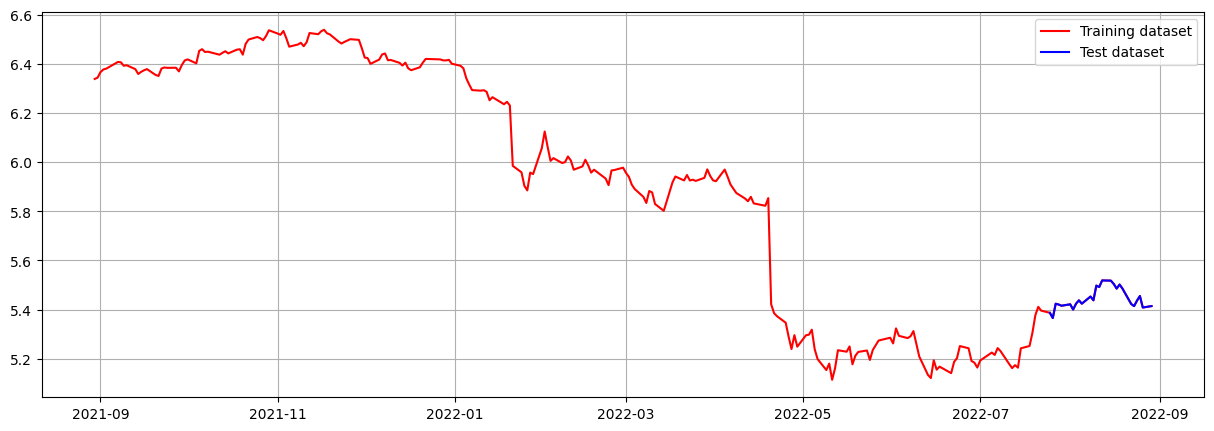

────────────────────────────────────────────────────────────────
 → return train_data, test_data


In [599]:
## 4> 학습, 테스트 데이터셋 생성
train_data, test_data = \
    ts_train_test_split(ts_log)

────────────────────────────────────────────────────────────────
 → ACF, PACF 출력（ARIMA ─ PACF:p, ACF:q）


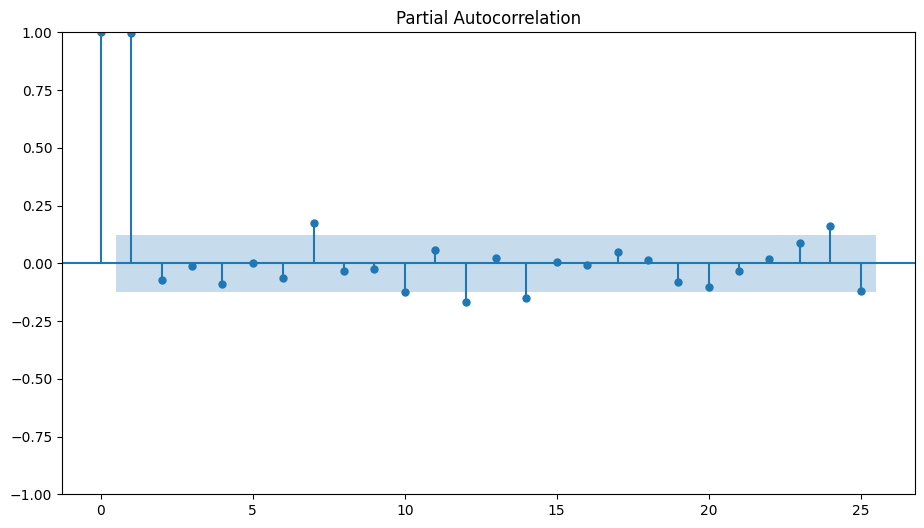

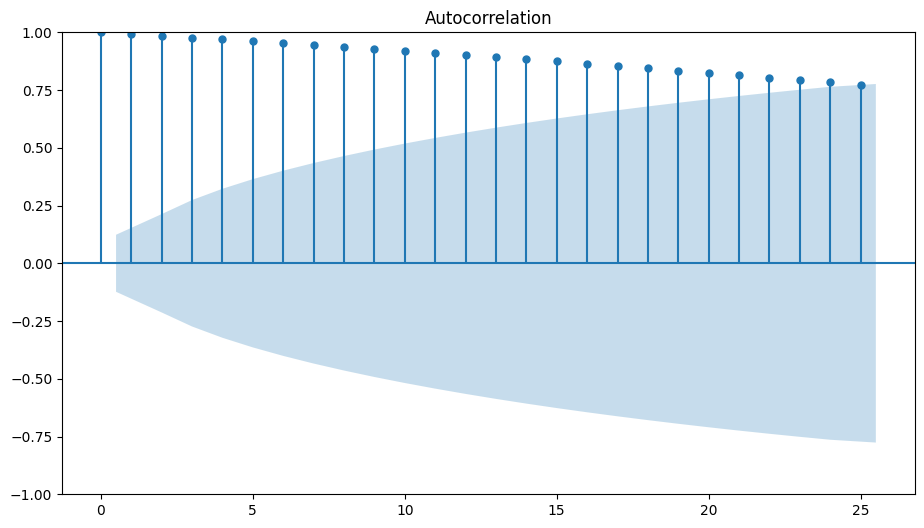

────────────────────────────────────────────────────────────────
 → 차분 안정성 확인（ARIMA ─ d）
────────────────────────────────────────────────────────────────
◆ Original：
Results of Dickey-Fuller Test:
Test Statistic                  -0.631370
p-value                          0.863735
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
────────────────────────────────────────────────────────────────
◆ １차：
Results of Dickey-Fuller Test:
Test Statistic                -1.515060e+01
p-value                        6.805882e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64
────────────────────────────────────────────────────────────────
◆ ２차

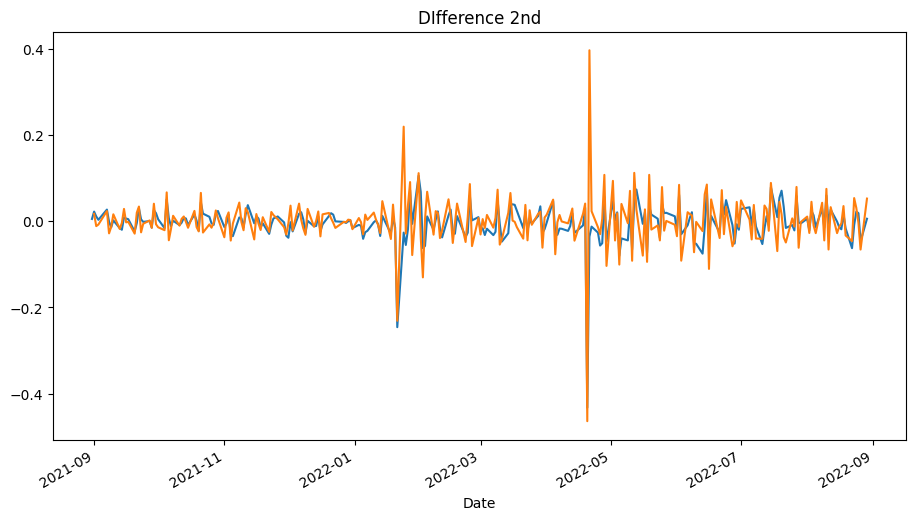

In [600]:
## 5> 적정 ARIMA 모수 찾기
arima_search(ts_log)

▼ ARIMA 모수 설정의 근거

  1. PACF, ACF 순서 출력（ARIMA ─ PACF:p, ACF:q） 
  
  2. 차분안정성 확인 d 를 위한 ADF Test 과정 출력

  3. 위의 내용에 더해, ARIMA 모델의 개념 단락에서, 좀 더 깊게 조사해서 정리한 결론.

부분에 따라, 아래와 같이 ARIMA 모수 적용을 했다.

- PACF  ： p = 1 이 적합
  + p 가 2 이상인 구간부터 PACF 값이 0 에 가까워짐.
  + PACF 만 놓고보면 전형적인 AR(p)의 자기회귀 모형의 특성을 보인다.
<br>&nbsp;<br>

- ACF   ： q = 24 를 설정.
  + 이전의 사례들로 미루어 보았을때, MA 를 고려하지 않을 만한 데이터가 아니다.
  + SARIMAX 결과를 봤을때에도 q 값을 설정 하는것이 좋아보이니 그렇게 하겠다.
<br>&nbsp;<br>

- ADF   ： d = 1 이 적합.
  + 최초  p-value = 0.863735
  + １차  p-value = 6.805882e-28
  + 1차 차분 결과로 충분. 1 로 두겠다.
<br>&nbsp;<br>

order = (p, d, q) 이므로.

모수로는 (1, 1, 24) 를 사용하도록 하겠다.

In [611]:
## 6> ARIMA 모델 적용 (1,1,24)
fitted_model = arima_apply(train_data, test_data, (1,1,24))

## 문규님 적용
## fitted_model = arima_apply(train_data, test_data, (24,0,24))

────────────────────────────────────────────────────────────────
 → Build and Train ARIMA Model
────────────────────────────────────────────────────────────────
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                ARIMA(1, 1, 24)   Log Likelihood                 396.657
Date:                Fri, 30 Sep 2022   AIC                           -741.314
Time:                        09:50:14   BIC                           -652.495
Sample:                             0   HQIC                          -705.466
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0242      1.190     -0.020      

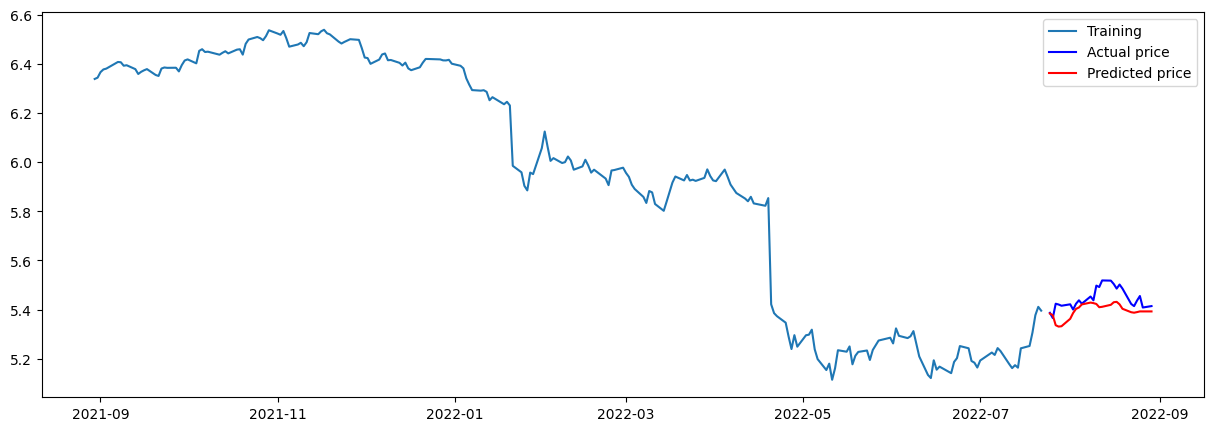

MSE:  186.43476363952368
MAE:  11.385023248317443
RMSE:  13.654111601987282
MAPE: 4.82%


In [612]:
## 7> ARIMA 모델 결과 확인
arima_result(train_data, test_data, fitted_model)

많은 자료들은 ARIMA 모수를 지정할 때에, 

p 와 q 에 대해서 일반적으로 p + q < 2, p * q = 0 인 값을 사용한다고 한다. 

이는 p 나 q 중 하나는 0이라는 뜻이기도 하다.

이렇게 하는 이유는, 많은 시계열 데이터가 AR이나 MA 중

하나의 경향만 가지기 때문이라고 설명하고 있다.

하지만 그러한 자료에서 제시한 데이터들과는 달리,

여기에서 직접 사용한 종목데이터들에서는 대부분

뚜렷하게 AR, MA 특징을 찾아보기 힘들었다.

ARIMA 모델의 결과 확인 과정에서도

ar, ma 스텝 수가 늘어나면 모델 수행시간도 늘어났고

그래프상에서 이전보다 어느정도 결과와 비슷한 선을 보여주었다.

<hr>

### ■ 프로젝트에 대한 회고


#### 1) 이번 프로젝트에서 '어려웠던 점'

파이썬에서, 순서와 상관없는 데이터를 주로 다루었었는데,

이번에 판다스의 시계열을 다루는 과정에서,

여러가지 개념들이 함께 쏟아져 나와서, 

그러한 생소한 개념들에 대해서 공부하느라 다소 힘든 점이 있었다.

다만, 시계열을 이용한 예측을 사용 할 수 있다는 점은

예측의 정확도를 높이는 방법을 한가지 더 알 수 있는 기회라고 생각해서

어려웠지만 동시에, 매우 유익했던 프로젝트 노드였다고 생각한다.

#### 2) 프로젝트를 진행하면서 본인이 '학습한 내용'

LMS 상의 레퍼런스 자료만으로는 이해가 어려운 부분이 많았다.

특히 ARIMA 모수에 관한 부분은,

아직도 교육생들 사이에서 오르내리는 흥미로운 이슈이기도 하다.

이번 프로젝트를 진행하면서 제일 시간을 많이 쏟은 부분이기도 하다.

기본적으로는 statsmodel 공식 문서에서의 ARIMA 모델 부터 시작해서

ADF, ACF, PACF, MAPE, 시계열의 특성들… 상당히 넓은 범위의 내용이지만

LMS 자체에서도 흥미유발과 기승전결을 깔끔하게 풀어놓아서

프로젝트 진행 프로세스의 흐름에 따라 순차적으로 각 요소들을 학습할 수 있었다.

다만 해커톤 시기에 버거운 일들이 많다보니 힘들었다.

#### 3) 프로젝트를 진행하면서 '알아낸 점' 혹은 '아직 모호한 점'

이번 프로젝트는 전반적으로 학습하는 과정에서 부족한 부분들을

채워가면서 알게 된 것들이 많다. LMS 만으로는 부족한 점들을 보완하기 위한

여러 참고 자료로 삼았던 것들을 전체 내용의 끝부분에 모아놓았다.

특히 『Forecasting: principles and practice, 2nd edition』 도서의 경우

상당히 설명을 명확하게 풀어나가는 내용이어서, 여유가 있다면,

다른 파트의 내용도 한번 다루는 것도 나쁘지 않겠다는 생각이 들었다.

모호한점은 ARIMA 모델의 수학적／통계적 이론과의 차이가 있는 것 같다는 점 일것 같다.

물론 ARIMA  가 알아서 해 주는 부분이 상당히 있다는 것은 알았다.

그렇지만 결국 스텝을 늘리지 않는 방향인 일반적인 모수의 값을 맞춘다는 것은,

변화무쌍한 주식 종목 예측에는 조금 버겁지 않은가 하는 생각이 들었다.

#### 4) 루브릭 평가 지표를 맞추기 위해 '시도한 것들'

LMS 의 내용과 학습 흐름을 따라가다보니, 

루브릭 평가 지표는 대부분 맞춰지는 상황이었다.

다만, 예측 그래프를 좀 더 데코레이션 하고자 하는 작업이 조금 있었다.

하지만, 90％의 학습 데이터가 아닌, 남은 10％의 예측 결과는…

ARIMA 모델에게는 예측해야 하는 미래이지만, 우리들은 이미 알고 있는 기정사실이다.

이미 알고 있는 미래의 결과에, ARIMA의 예측 결과를 억지로 맞추려는 느낌이 들어서,

더이상 모델의 그래프와 실제 주식 종목의 그래프를 일치시키려는 일은 중단했다.

그 대신에, ARIMA 모델 외의 AR, MA, SARIMA 등 계절성을 반영한다거나

다른 파라메터의 사용법이나, interpolate, rolling 등의 개념에 대해서

이것저것 공부하고 정리도 해 보면서 여기에 기록을 해 두었다.

#### 5) 만약에 '루브릭 평가 지표를 달성하지 못했을 때, 이유에 관한 추정'

시계열의 안정성을 맞춰 가기 위한 여러 방법들이,

대부분 상당히 강하게 작동을 하다보니 p-value 값도 그렇고…

어지간해서는 MAPE 15％를 넘기는 경우는 나오지 않았고,

다른 교육생들도 대부분 달성하는데 어려움이 없는걸로 알고 있다.

만약이라도, 이유를 생각해 본 다면, 기능 구현한 로직에 문제가 있으면

MAPE 값이 넘어가버릴 수 있을 것이다.

안정성을 맞추고 진행하는 과정을 따라간다면, 일반적으로는 MAPE 안에 들어온다고 생각한다.

#### 6) 자기 다짐

이번에는 특히 많은 시도들을 통해서 학습 성과도 있었다고 생각한다.

종목 선택부터 ARIMA 모수 설정, 차분 적용… 

그와 동시에 계속되는 시각화 결과를 확인하고, 또 값을 바꾸어 보고 실험하고

하이퍼파라미터인가？ 하는 생각도 들었다.

실험을 많이 하면서 이것저것 탐색하고 학습하는 과정을 반복하면서

개념 정리도 하고, 다른 교육생들과 이 노드로 이런저런 의견도 나눴다.

그런 과정에서 재미도 느끼고, 의미 있는 노드였다고 생각한다.

예측 결과가 만족스럽지 않고 힘들지만서도, 

이러한 과정을 경험하는 것은 나쁘지 않은 것 같다.

다른 교육생들과 의견을 나누면서 배우는 점도 많고…

여러 이슈들을 좀 더, 다른 교육생들과 나누고, 배우고 싶다고 생각했다.

<hr>

##### ◎ Reference

 - AIFFEL - LMS Exploration Node 04

 - (Stationary) Website：[[시계열(Time-Series) 데이터] 정상성/이동평균/이동표준편차/자기공분산/자기상관계수](https://velog.io/@pkb0126/%EC%8B%9C%EA%B3%84%EC%97%B4Time-Series%EC%A0%95%EC%83%81%EC%84%B1)

 - (Stationarity)<br>
 Hyndman, R.J., & Athanasopoulos, G. (2018) <br>
 Forecasting: principles and practice, 2nd edition,<br>
 OTexts: Melbourne, Australia.<br>
 https://otexts.com/fpp2/stationarity.html Accessed on<br>
chapter 8 ARIMA models - 8.1 Stationarity and differencing

 - (Stationarity) [ADF(Augmented Dickey-Fuller Test)를 이용한 정상성 확인](https://aliencoder.tistory.com/10)

 - Pandas API Reference：[API reference — pandas 1.5.0 documentation](https://pandas.pydata.org/docs/reference/index.html)

 - (interpolate) Website：[Pandas를 활용한 결측치 보간(interpolation) 하기](https://teddylee777.github.io/pandas/pandas-interpolation)

 - (rolling) Website：[이동평균 계산 (pandas.Series.rolling)](https://ordo.tistory.com/67)

 - (seasonal_decompose) statsmodels User Guide：[statsmodels.tsa.seasonal.seasonal_decompose](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)

 - (ARIMA) statsmodels User Guide：[statsmodels.tsa.arima.model.ARIMA](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html)

 - (ARIMA) Website：[Identifying the numbers of AR or MA terms in an ARIMA model](https://people.duke.edu/~rnau/411arim3.htm)

 - (NAVER) [네이버 - 나무위키](https://namu.wiki/w/%EB%84%A4%EC%9D%B4%EB%B2%84)

 - (HITEJINRO) [하이트진로 - 나무위키](https://namu.wiki/w/%ED%95%98%EC%9D%B4%ED%8A%B8%EC%A7%84%EB%A1%9C)

 - (NETFLIX) [넷플릭스 - 나무위키](https://namu.wiki/w/%EB%84%B7%ED%94%8C%EB%A6%AD%EC%8A%A4)

<hr>